In [1]:
import tweepy
import json
import os

import re

import nltk
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

In [2]:
# authorisations
consumer_key = "diHRexfHroy6wgC8rDvD5jSP2"
consumer_secret = "pg5C91MS0stxt2Mbfj7BUYBHeLw5JXggXAs20Jct440hsTJC6h"
access_key ="1044245139328126976-Jjav0AH06dYVRR1ROLPbJblN6IKlze"
access_secret = "ampI7gu9R8774k5pFUfL706od7HMOFz6DZOH6x7PokG3g"

# set up authorisations
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)

# set up API call
# api = tweepy.API(auth, parser = tweepy.parsers.JSONParser())
api = tweepy.API(auth, wait_on_rate_limit=True)

In [3]:
# special thanks to Griffin for this code
# https://medium.com/@leowgriffin/scraping-tweets-with-tweepy-python-59413046e788

import time

def scraptweets(search_words, numTweets, numRuns, datetill):
    
    # Define a for-loop to generate tweets at regular intervals
    # We cannot make large API call in one go. Hence, let's try T times
    
    # Define a pandas dataframe to store the date:
    
    db_tweets = pd.DataFrame(columns = ['username', 'acctdesc', 'location', 'following',
                                        'followers', 'totaltweets', 'usercreatedts', 'tweetcreatedts',
                                        'retweetcount', 'text', 'hashtags']
                                )
    program_start = time.time()
    for i in range(0, numRuns):
        # We will time how long it takes to scrape tweets for each run:
        start_run = time.time()
        
        # Collect tweets using the Cursor object
        # .Cursor() returns an object that you can iterate or loop over to access the data collected.
        # Each item in the iterator has various attributes that you can access to get information about each tweet
        tweets = tweepy.Cursor(api.search, q=search_words, lang="en", tweet_mode='extended', result_type="recent",
                              until=datetill).items(numTweets)
# Store these tweets into a python list
        tweet_list = [tweet for tweet in tweets]
# Obtain the following info (methods to call them out):
        # user.screen_name - twitter handle
        # user.description - description of account
        # user.location - where is he tweeting from
        # user.friends_count - no. of other users that user is following (following)
        # user.followers_count - no. of other users who are following this user (followers)
        # user.statuses_count - total tweets by user
        # user.created_at - when the user account was created
        # created_at - when the tweet was created
        # retweet_count - no. of retweets
        # (deprecated) user.favourites_count - probably total no. of tweets that is favourited by user
        # retweeted_status.full_text - full text of the tweet
        # tweet.entities['hashtags'] - hashtags in the tweet
# Begin scraping the tweets individually:
        noTweets = 0
    
        for tweet in tweet_list:
            username = tweet.user.screen_name
            acctdesc = tweet.user.description
            location = tweet.user.location
            following = tweet.user.friends_count
            followers = tweet.user.followers_count
            totaltweets = tweet.user.statuses_count
            usercreatedts = tweet.user.created_at
            tweetcreatedts = tweet.created_at
            retweetcount = tweet.retweet_count
            hashtags = tweet.entities['hashtags']

            try:
                text = tweet.retweeted_status.full_text

            except AttributeError:  # Not a Retweet
                text = tweet.full_text
                
            # Add the 11 variables to the empty list - ith_tweet:
            ith_tweet = [username, acctdesc, location, following, followers, totaltweets,
                         usercreatedts, tweetcreatedts, retweetcount, text, hashtags]
# Append to dataframe - db_tweets
            db_tweets.loc[len(db_tweets)] = ith_tweet
# increase counter - noTweets  
            noTweets += 1
    # keep track of number of tweets downloaded
            print("...%s tweets downloaded so far" % (noTweets))
        
        # Run ended:
        end_run = time.time()
        duration_run = round((end_run-start_run)/60, 2)
        
        print('no. of tweets scraped for run {} is {}'.format(i + 1, noTweets))
        print('time take for {} run to complete is {} mins'.format(i+1, duration_run))
        
        time.sleep(920) #15 minute sleep time
        
        
# Once all runs have completed, save them to a single csv file:
    from datetime import datetime
    
    # Obtain timestamp in a readable format
    to_csv_timestamp = datetime.today().strftime('%Y%m%d_%H%M%S')
# Define working path and filename
    path = os.getcwd()
    filename = path + to_csv_timestamp + 'ge_tweets.csv'
# Store dataframe in csv with creation date timestamp
    db_tweets.to_csv(filename, index = False)
    
    program_end = time.time()
    print('Scraping has completed!')
    print('Total time taken to scrap is {} minutes.'.format(round(program_end - program_start)/60, 2))

In [4]:
# 20 rounds to yield 50000 tweets
# includes retweets
search_words = 'PAP #GE2020'
numTweets = 2500
numRuns = 20
datetill = "2020-07-09"

scraptweets(search_words, numTweets, numRuns, datetill)

...1 tweets downloaded so far
...2 tweets downloaded so far
...3 tweets downloaded so far
...4 tweets downloaded so far
...5 tweets downloaded so far
...6 tweets downloaded so far
...7 tweets downloaded so far
...8 tweets downloaded so far
...9 tweets downloaded so far
...10 tweets downloaded so far
...11 tweets downloaded so far
...12 tweets downloaded so far
...13 tweets downloaded so far
...14 tweets downloaded so far
...15 tweets downloaded so far
...16 tweets downloaded so far
...17 tweets downloaded so far
...18 tweets downloaded so far
...19 tweets downloaded so far
...20 tweets downloaded so far
...21 tweets downloaded so far
...22 tweets downloaded so far
...23 tweets downloaded so far
...24 tweets downloaded so far
...25 tweets downloaded so far
...26 tweets downloaded so far
...27 tweets downloaded so far
...28 tweets downloaded so far
...29 tweets downloaded so far
...30 tweets downloaded so far
...31 tweets downloaded so far
...32 tweets downloaded so far
...33 tweets down

...268 tweets downloaded so far
...269 tweets downloaded so far
...270 tweets downloaded so far
...271 tweets downloaded so far
...272 tweets downloaded so far
...273 tweets downloaded so far
...274 tweets downloaded so far
...275 tweets downloaded so far
...276 tweets downloaded so far
...277 tweets downloaded so far
...278 tweets downloaded so far
...279 tweets downloaded so far
...280 tweets downloaded so far
...281 tweets downloaded so far
...282 tweets downloaded so far
...283 tweets downloaded so far
...284 tweets downloaded so far
...285 tweets downloaded so far
...286 tweets downloaded so far
...287 tweets downloaded so far
...288 tweets downloaded so far
...289 tweets downloaded so far
...290 tweets downloaded so far
...291 tweets downloaded so far
...292 tweets downloaded so far
...293 tweets downloaded so far
...294 tweets downloaded so far
...295 tweets downloaded so far
...296 tweets downloaded so far
...297 tweets downloaded so far
...298 tweets downloaded so far
...299 t

...531 tweets downloaded so far
...532 tweets downloaded so far
...533 tweets downloaded so far
...534 tweets downloaded so far
...535 tweets downloaded so far
...536 tweets downloaded so far
...537 tweets downloaded so far
...538 tweets downloaded so far
...539 tweets downloaded so far
...540 tweets downloaded so far
...541 tweets downloaded so far
...542 tweets downloaded so far
...543 tweets downloaded so far
...544 tweets downloaded so far
...545 tweets downloaded so far
...546 tweets downloaded so far
...547 tweets downloaded so far
...548 tweets downloaded so far
...549 tweets downloaded so far
...550 tweets downloaded so far
...551 tweets downloaded so far
...552 tweets downloaded so far
...553 tweets downloaded so far
...554 tweets downloaded so far
...555 tweets downloaded so far
...556 tweets downloaded so far
...557 tweets downloaded so far
...558 tweets downloaded so far
...559 tweets downloaded so far
...560 tweets downloaded so far
...561 tweets downloaded so far
...562 t

...794 tweets downloaded so far
...795 tweets downloaded so far
...796 tweets downloaded so far
...797 tweets downloaded so far
...798 tweets downloaded so far
...799 tweets downloaded so far
...800 tweets downloaded so far
...801 tweets downloaded so far
...802 tweets downloaded so far
...803 tweets downloaded so far
...804 tweets downloaded so far
...805 tweets downloaded so far
...806 tweets downloaded so far
...807 tweets downloaded so far
...808 tweets downloaded so far
...809 tweets downloaded so far
...810 tweets downloaded so far
...811 tweets downloaded so far
...812 tweets downloaded so far
...813 tweets downloaded so far
...814 tweets downloaded so far
...815 tweets downloaded so far
...816 tweets downloaded so far
...817 tweets downloaded so far
...818 tweets downloaded so far
...819 tweets downloaded so far
...820 tweets downloaded so far
...821 tweets downloaded so far
...822 tweets downloaded so far
...823 tweets downloaded so far
...824 tweets downloaded so far
...825 t

...1077 tweets downloaded so far
...1078 tweets downloaded so far
...1079 tweets downloaded so far
...1080 tweets downloaded so far
...1081 tweets downloaded so far
...1082 tweets downloaded so far
...1083 tweets downloaded so far
...1084 tweets downloaded so far
...1085 tweets downloaded so far
...1086 tweets downloaded so far
...1087 tweets downloaded so far
...1088 tweets downloaded so far
...1089 tweets downloaded so far
...1090 tweets downloaded so far
...1091 tweets downloaded so far
...1092 tweets downloaded so far
...1093 tweets downloaded so far
...1094 tweets downloaded so far
...1095 tweets downloaded so far
...1096 tweets downloaded so far
...1097 tweets downloaded so far
...1098 tweets downloaded so far
...1099 tweets downloaded so far
...1100 tweets downloaded so far
...1101 tweets downloaded so far
...1102 tweets downloaded so far
...1103 tweets downloaded so far
...1104 tweets downloaded so far
...1105 tweets downloaded so far
...1106 tweets downloaded so far
...1107 tw

...1347 tweets downloaded so far
...1348 tweets downloaded so far
...1349 tweets downloaded so far
...1350 tweets downloaded so far
...1351 tweets downloaded so far
...1352 tweets downloaded so far
...1353 tweets downloaded so far
...1354 tweets downloaded so far
...1355 tweets downloaded so far
...1356 tweets downloaded so far
...1357 tweets downloaded so far
...1358 tweets downloaded so far
...1359 tweets downloaded so far
...1360 tweets downloaded so far
...1361 tweets downloaded so far
...1362 tweets downloaded so far
...1363 tweets downloaded so far
...1364 tweets downloaded so far
...1365 tweets downloaded so far
...1366 tweets downloaded so far
...1367 tweets downloaded so far
...1368 tweets downloaded so far
...1369 tweets downloaded so far
...1370 tweets downloaded so far
...1371 tweets downloaded so far
...1372 tweets downloaded so far
...1373 tweets downloaded so far
...1374 tweets downloaded so far
...1375 tweets downloaded so far
...1376 tweets downloaded so far
...1377 tw

...1605 tweets downloaded so far
...1606 tweets downloaded so far
...1607 tweets downloaded so far
...1608 tweets downloaded so far
...1609 tweets downloaded so far
...1610 tweets downloaded so far
...1611 tweets downloaded so far
...1612 tweets downloaded so far
...1613 tweets downloaded so far
...1614 tweets downloaded so far
...1615 tweets downloaded so far
...1616 tweets downloaded so far
...1617 tweets downloaded so far
...1618 tweets downloaded so far
...1619 tweets downloaded so far
...1620 tweets downloaded so far
...1621 tweets downloaded so far
...1622 tweets downloaded so far
...1623 tweets downloaded so far
...1624 tweets downloaded so far
...1625 tweets downloaded so far
...1626 tweets downloaded so far
...1627 tweets downloaded so far
...1628 tweets downloaded so far
...1629 tweets downloaded so far
...1630 tweets downloaded so far
...1631 tweets downloaded so far
...1632 tweets downloaded so far
...1633 tweets downloaded so far
...1634 tweets downloaded so far
...1635 tw

...1881 tweets downloaded so far
...1882 tweets downloaded so far
...1883 tweets downloaded so far
...1884 tweets downloaded so far
...1885 tweets downloaded so far
...1886 tweets downloaded so far
...1887 tweets downloaded so far
...1888 tweets downloaded so far
...1889 tweets downloaded so far
...1890 tweets downloaded so far
...1891 tweets downloaded so far
...1892 tweets downloaded so far
...1893 tweets downloaded so far
...1894 tweets downloaded so far
...1895 tweets downloaded so far
...1896 tweets downloaded so far
...1897 tweets downloaded so far
...1898 tweets downloaded so far
...1899 tweets downloaded so far
...1900 tweets downloaded so far
...1901 tweets downloaded so far
...1902 tweets downloaded so far
...1903 tweets downloaded so far
...1904 tweets downloaded so far
...1905 tweets downloaded so far
...1906 tweets downloaded so far
...1907 tweets downloaded so far
...1908 tweets downloaded so far
...1909 tweets downloaded so far
...1910 tweets downloaded so far
...1911 tw

...2137 tweets downloaded so far
...2138 tweets downloaded so far
...2139 tweets downloaded so far
...2140 tweets downloaded so far
...2141 tweets downloaded so far
...2142 tweets downloaded so far
...2143 tweets downloaded so far
...2144 tweets downloaded so far
...2145 tweets downloaded so far
...2146 tweets downloaded so far
...2147 tweets downloaded so far
...2148 tweets downloaded so far
...2149 tweets downloaded so far
...2150 tweets downloaded so far
...2151 tweets downloaded so far
...2152 tweets downloaded so far
...2153 tweets downloaded so far
...2154 tweets downloaded so far
...2155 tweets downloaded so far
...2156 tweets downloaded so far
...2157 tweets downloaded so far
...2158 tweets downloaded so far
...2159 tweets downloaded so far
...2160 tweets downloaded so far
...2161 tweets downloaded so far
...2162 tweets downloaded so far
...2163 tweets downloaded so far
...2164 tweets downloaded so far
...2165 tweets downloaded so far
...2166 tweets downloaded so far
...2167 tw

...2406 tweets downloaded so far
...2407 tweets downloaded so far
...2408 tweets downloaded so far
...2409 tweets downloaded so far
...2410 tweets downloaded so far
...2411 tweets downloaded so far
...2412 tweets downloaded so far
...2413 tweets downloaded so far
...2414 tweets downloaded so far
...2415 tweets downloaded so far
...2416 tweets downloaded so far
...2417 tweets downloaded so far
...2418 tweets downloaded so far
...2419 tweets downloaded so far
...2420 tweets downloaded so far
...2421 tweets downloaded so far
...2422 tweets downloaded so far
...2423 tweets downloaded so far
...2424 tweets downloaded so far
...2425 tweets downloaded so far
...2426 tweets downloaded so far
...2427 tweets downloaded so far
...2428 tweets downloaded so far
...2429 tweets downloaded so far
...2430 tweets downloaded so far
...2431 tweets downloaded so far
...2432 tweets downloaded so far
...2433 tweets downloaded so far
...2434 tweets downloaded so far
...2435 tweets downloaded so far
...2436 tw

...166 tweets downloaded so far
...167 tweets downloaded so far
...168 tweets downloaded so far
...169 tweets downloaded so far
...170 tweets downloaded so far
...171 tweets downloaded so far
...172 tweets downloaded so far
...173 tweets downloaded so far
...174 tweets downloaded so far
...175 tweets downloaded so far
...176 tweets downloaded so far
...177 tweets downloaded so far
...178 tweets downloaded so far
...179 tweets downloaded so far
...180 tweets downloaded so far
...181 tweets downloaded so far
...182 tweets downloaded so far
...183 tweets downloaded so far
...184 tweets downloaded so far
...185 tweets downloaded so far
...186 tweets downloaded so far
...187 tweets downloaded so far
...188 tweets downloaded so far
...189 tweets downloaded so far
...190 tweets downloaded so far
...191 tweets downloaded so far
...192 tweets downloaded so far
...193 tweets downloaded so far
...194 tweets downloaded so far
...195 tweets downloaded so far
...196 tweets downloaded so far
...197 t

...438 tweets downloaded so far
...439 tweets downloaded so far
...440 tweets downloaded so far
...441 tweets downloaded so far
...442 tweets downloaded so far
...443 tweets downloaded so far
...444 tweets downloaded so far
...445 tweets downloaded so far
...446 tweets downloaded so far
...447 tweets downloaded so far
...448 tweets downloaded so far
...449 tweets downloaded so far
...450 tweets downloaded so far
...451 tweets downloaded so far
...452 tweets downloaded so far
...453 tweets downloaded so far
...454 tweets downloaded so far
...455 tweets downloaded so far
...456 tweets downloaded so far
...457 tweets downloaded so far
...458 tweets downloaded so far
...459 tweets downloaded so far
...460 tweets downloaded so far
...461 tweets downloaded so far
...462 tweets downloaded so far
...463 tweets downloaded so far
...464 tweets downloaded so far
...465 tweets downloaded so far
...466 tweets downloaded so far
...467 tweets downloaded so far
...468 tweets downloaded so far
...469 t

...707 tweets downloaded so far
...708 tweets downloaded so far
...709 tweets downloaded so far
...710 tweets downloaded so far
...711 tweets downloaded so far
...712 tweets downloaded so far
...713 tweets downloaded so far
...714 tweets downloaded so far
...715 tweets downloaded so far
...716 tweets downloaded so far
...717 tweets downloaded so far
...718 tweets downloaded so far
...719 tweets downloaded so far
...720 tweets downloaded so far
...721 tweets downloaded so far
...722 tweets downloaded so far
...723 tweets downloaded so far
...724 tweets downloaded so far
...725 tweets downloaded so far
...726 tweets downloaded so far
...727 tweets downloaded so far
...728 tweets downloaded so far
...729 tweets downloaded so far
...730 tweets downloaded so far
...731 tweets downloaded so far
...732 tweets downloaded so far
...733 tweets downloaded so far
...734 tweets downloaded so far
...735 tweets downloaded so far
...736 tweets downloaded so far
...737 tweets downloaded so far
...738 t

...974 tweets downloaded so far
...975 tweets downloaded so far
...976 tweets downloaded so far
...977 tweets downloaded so far
...978 tweets downloaded so far
...979 tweets downloaded so far
...980 tweets downloaded so far
...981 tweets downloaded so far
...982 tweets downloaded so far
...983 tweets downloaded so far
...984 tweets downloaded so far
...985 tweets downloaded so far
...986 tweets downloaded so far
...987 tweets downloaded so far
...988 tweets downloaded so far
...989 tweets downloaded so far
...990 tweets downloaded so far
...991 tweets downloaded so far
...992 tweets downloaded so far
...993 tweets downloaded so far
...994 tweets downloaded so far
...995 tweets downloaded so far
...996 tweets downloaded so far
...997 tweets downloaded so far
...998 tweets downloaded so far
...999 tweets downloaded so far
...1000 tweets downloaded so far
...1001 tweets downloaded so far
...1002 tweets downloaded so far
...1003 tweets downloaded so far
...1004 tweets downloaded so far
...

...1235 tweets downloaded so far
...1236 tweets downloaded so far
...1237 tweets downloaded so far
...1238 tweets downloaded so far
...1239 tweets downloaded so far
...1240 tweets downloaded so far
...1241 tweets downloaded so far
...1242 tweets downloaded so far
...1243 tweets downloaded so far
...1244 tweets downloaded so far
...1245 tweets downloaded so far
...1246 tweets downloaded so far
...1247 tweets downloaded so far
...1248 tweets downloaded so far
...1249 tweets downloaded so far
...1250 tweets downloaded so far
...1251 tweets downloaded so far
...1252 tweets downloaded so far
...1253 tweets downloaded so far
...1254 tweets downloaded so far
...1255 tweets downloaded so far
...1256 tweets downloaded so far
...1257 tweets downloaded so far
...1258 tweets downloaded so far
...1259 tweets downloaded so far
...1260 tweets downloaded so far
...1261 tweets downloaded so far
...1262 tweets downloaded so far
...1263 tweets downloaded so far
...1264 tweets downloaded so far
...1265 tw

...1488 tweets downloaded so far
...1489 tweets downloaded so far
...1490 tweets downloaded so far
...1491 tweets downloaded so far
...1492 tweets downloaded so far
...1493 tweets downloaded so far
...1494 tweets downloaded so far
...1495 tweets downloaded so far
...1496 tweets downloaded so far
...1497 tweets downloaded so far
...1498 tweets downloaded so far
...1499 tweets downloaded so far
...1500 tweets downloaded so far
...1501 tweets downloaded so far
...1502 tweets downloaded so far
...1503 tweets downloaded so far
...1504 tweets downloaded so far
...1505 tweets downloaded so far
...1506 tweets downloaded so far
...1507 tweets downloaded so far
...1508 tweets downloaded so far
...1509 tweets downloaded so far
...1510 tweets downloaded so far
...1511 tweets downloaded so far
...1512 tweets downloaded so far
...1513 tweets downloaded so far
...1514 tweets downloaded so far
...1515 tweets downloaded so far
...1516 tweets downloaded so far
...1517 tweets downloaded so far
...1518 tw

...1748 tweets downloaded so far
...1749 tweets downloaded so far
...1750 tweets downloaded so far
...1751 tweets downloaded so far
...1752 tweets downloaded so far
...1753 tweets downloaded so far
...1754 tweets downloaded so far
...1755 tweets downloaded so far
...1756 tweets downloaded so far
...1757 tweets downloaded so far
...1758 tweets downloaded so far
...1759 tweets downloaded so far
...1760 tweets downloaded so far
...1761 tweets downloaded so far
...1762 tweets downloaded so far
...1763 tweets downloaded so far
...1764 tweets downloaded so far
...1765 tweets downloaded so far
...1766 tweets downloaded so far
...1767 tweets downloaded so far
...1768 tweets downloaded so far
...1769 tweets downloaded so far
...1770 tweets downloaded so far
...1771 tweets downloaded so far
...1772 tweets downloaded so far
...1773 tweets downloaded so far
...1774 tweets downloaded so far
...1775 tweets downloaded so far
...1776 tweets downloaded so far
...1777 tweets downloaded so far
...1778 tw

...2011 tweets downloaded so far
...2012 tweets downloaded so far
...2013 tweets downloaded so far
...2014 tweets downloaded so far
...2015 tweets downloaded so far
...2016 tweets downloaded so far
...2017 tweets downloaded so far
...2018 tweets downloaded so far
...2019 tweets downloaded so far
...2020 tweets downloaded so far
...2021 tweets downloaded so far
...2022 tweets downloaded so far
...2023 tweets downloaded so far
...2024 tweets downloaded so far
...2025 tweets downloaded so far
...2026 tweets downloaded so far
...2027 tweets downloaded so far
...2028 tweets downloaded so far
...2029 tweets downloaded so far
...2030 tweets downloaded so far
...2031 tweets downloaded so far
...2032 tweets downloaded so far
...2033 tweets downloaded so far
...2034 tweets downloaded so far
...2035 tweets downloaded so far
...2036 tweets downloaded so far
...2037 tweets downloaded so far
...2038 tweets downloaded so far
...2039 tweets downloaded so far
...2040 tweets downloaded so far
...2041 tw

...2267 tweets downloaded so far
...2268 tweets downloaded so far
...2269 tweets downloaded so far
...2270 tweets downloaded so far
...2271 tweets downloaded so far
...2272 tweets downloaded so far
...2273 tweets downloaded so far
...2274 tweets downloaded so far
...2275 tweets downloaded so far
...2276 tweets downloaded so far
...2277 tweets downloaded so far
...2278 tweets downloaded so far
...2279 tweets downloaded so far
...2280 tweets downloaded so far
...2281 tweets downloaded so far
...2282 tweets downloaded so far
...2283 tweets downloaded so far
...2284 tweets downloaded so far
...2285 tweets downloaded so far
...2286 tweets downloaded so far
...2287 tweets downloaded so far
...2288 tweets downloaded so far
...2289 tweets downloaded so far
...2290 tweets downloaded so far
...2291 tweets downloaded so far
...2292 tweets downloaded so far
...2293 tweets downloaded so far
...2294 tweets downloaded so far
...2295 tweets downloaded so far
...2296 tweets downloaded so far
...2297 tw

...17 tweets downloaded so far
...18 tweets downloaded so far
...19 tweets downloaded so far
...20 tweets downloaded so far
...21 tweets downloaded so far
...22 tweets downloaded so far
...23 tweets downloaded so far
...24 tweets downloaded so far
...25 tweets downloaded so far
...26 tweets downloaded so far
...27 tweets downloaded so far
...28 tweets downloaded so far
...29 tweets downloaded so far
...30 tweets downloaded so far
...31 tweets downloaded so far
...32 tweets downloaded so far
...33 tweets downloaded so far
...34 tweets downloaded so far
...35 tweets downloaded so far
...36 tweets downloaded so far
...37 tweets downloaded so far
...38 tweets downloaded so far
...39 tweets downloaded so far
...40 tweets downloaded so far
...41 tweets downloaded so far
...42 tweets downloaded so far
...43 tweets downloaded so far
...44 tweets downloaded so far
...45 tweets downloaded so far
...46 tweets downloaded so far
...47 tweets downloaded so far
...48 tweets downloaded so far
...49 tw

...282 tweets downloaded so far
...283 tweets downloaded so far
...284 tweets downloaded so far
...285 tweets downloaded so far
...286 tweets downloaded so far
...287 tweets downloaded so far
...288 tweets downloaded so far
...289 tweets downloaded so far
...290 tweets downloaded so far
...291 tweets downloaded so far
...292 tweets downloaded so far
...293 tweets downloaded so far
...294 tweets downloaded so far
...295 tweets downloaded so far
...296 tweets downloaded so far
...297 tweets downloaded so far
...298 tweets downloaded so far
...299 tweets downloaded so far
...300 tweets downloaded so far
...301 tweets downloaded so far
...302 tweets downloaded so far
...303 tweets downloaded so far
...304 tweets downloaded so far
...305 tweets downloaded so far
...306 tweets downloaded so far
...307 tweets downloaded so far
...308 tweets downloaded so far
...309 tweets downloaded so far
...310 tweets downloaded so far
...311 tweets downloaded so far
...312 tweets downloaded so far
...313 t

...550 tweets downloaded so far
...551 tweets downloaded so far
...552 tweets downloaded so far
...553 tweets downloaded so far
...554 tweets downloaded so far
...555 tweets downloaded so far
...556 tweets downloaded so far
...557 tweets downloaded so far
...558 tweets downloaded so far
...559 tweets downloaded so far
...560 tweets downloaded so far
...561 tweets downloaded so far
...562 tweets downloaded so far
...563 tweets downloaded so far
...564 tweets downloaded so far
...565 tweets downloaded so far
...566 tweets downloaded so far
...567 tweets downloaded so far
...568 tweets downloaded so far
...569 tweets downloaded so far
...570 tweets downloaded so far
...571 tweets downloaded so far
...572 tweets downloaded so far
...573 tweets downloaded so far
...574 tweets downloaded so far
...575 tweets downloaded so far
...576 tweets downloaded so far
...577 tweets downloaded so far
...578 tweets downloaded so far
...579 tweets downloaded so far
...580 tweets downloaded so far
...581 t

...817 tweets downloaded so far
...818 tweets downloaded so far
...819 tweets downloaded so far
...820 tweets downloaded so far
...821 tweets downloaded so far
...822 tweets downloaded so far
...823 tweets downloaded so far
...824 tweets downloaded so far
...825 tweets downloaded so far
...826 tweets downloaded so far
...827 tweets downloaded so far
...828 tweets downloaded so far
...829 tweets downloaded so far
...830 tweets downloaded so far
...831 tweets downloaded so far
...832 tweets downloaded so far
...833 tweets downloaded so far
...834 tweets downloaded so far
...835 tweets downloaded so far
...836 tweets downloaded so far
...837 tweets downloaded so far
...838 tweets downloaded so far
...839 tweets downloaded so far
...840 tweets downloaded so far
...841 tweets downloaded so far
...842 tweets downloaded so far
...843 tweets downloaded so far
...844 tweets downloaded so far
...845 tweets downloaded so far
...846 tweets downloaded so far
...847 tweets downloaded so far
...848 t

...1071 tweets downloaded so far
...1072 tweets downloaded so far
...1073 tweets downloaded so far
...1074 tweets downloaded so far
...1075 tweets downloaded so far
...1076 tweets downloaded so far
...1077 tweets downloaded so far
...1078 tweets downloaded so far
...1079 tweets downloaded so far
...1080 tweets downloaded so far
...1081 tweets downloaded so far
...1082 tweets downloaded so far
...1083 tweets downloaded so far
...1084 tweets downloaded so far
...1085 tweets downloaded so far
...1086 tweets downloaded so far
...1087 tweets downloaded so far
...1088 tweets downloaded so far
...1089 tweets downloaded so far
...1090 tweets downloaded so far
...1091 tweets downloaded so far
...1092 tweets downloaded so far
...1093 tweets downloaded so far
...1094 tweets downloaded so far
...1095 tweets downloaded so far
...1096 tweets downloaded so far
...1097 tweets downloaded so far
...1098 tweets downloaded so far
...1099 tweets downloaded so far
...1100 tweets downloaded so far
...1101 tw

...1327 tweets downloaded so far
...1328 tweets downloaded so far
...1329 tweets downloaded so far
...1330 tweets downloaded so far
...1331 tweets downloaded so far
...1332 tweets downloaded so far
...1333 tweets downloaded so far
...1334 tweets downloaded so far
...1335 tweets downloaded so far
...1336 tweets downloaded so far
...1337 tweets downloaded so far
...1338 tweets downloaded so far
...1339 tweets downloaded so far
...1340 tweets downloaded so far
...1341 tweets downloaded so far
...1342 tweets downloaded so far
...1343 tweets downloaded so far
...1344 tweets downloaded so far
...1345 tweets downloaded so far
...1346 tweets downloaded so far
...1347 tweets downloaded so far
...1348 tweets downloaded so far
...1349 tweets downloaded so far
...1350 tweets downloaded so far
...1351 tweets downloaded so far
...1352 tweets downloaded so far
...1353 tweets downloaded so far
...1354 tweets downloaded so far
...1355 tweets downloaded so far
...1356 tweets downloaded so far
...1357 tw

...1583 tweets downloaded so far
...1584 tweets downloaded so far
...1585 tweets downloaded so far
...1586 tweets downloaded so far
...1587 tweets downloaded so far
...1588 tweets downloaded so far
...1589 tweets downloaded so far
...1590 tweets downloaded so far
...1591 tweets downloaded so far
...1592 tweets downloaded so far
...1593 tweets downloaded so far
...1594 tweets downloaded so far
...1595 tweets downloaded so far
...1596 tweets downloaded so far
...1597 tweets downloaded so far
...1598 tweets downloaded so far
...1599 tweets downloaded so far
...1600 tweets downloaded so far
...1601 tweets downloaded so far
...1602 tweets downloaded so far
...1603 tweets downloaded so far
...1604 tweets downloaded so far
...1605 tweets downloaded so far
...1606 tweets downloaded so far
...1607 tweets downloaded so far
...1608 tweets downloaded so far
...1609 tweets downloaded so far
...1610 tweets downloaded so far
...1611 tweets downloaded so far
...1612 tweets downloaded so far
...1613 tw

...1832 tweets downloaded so far
...1833 tweets downloaded so far
...1834 tweets downloaded so far
...1835 tweets downloaded so far
...1836 tweets downloaded so far
...1837 tweets downloaded so far
...1838 tweets downloaded so far
...1839 tweets downloaded so far
...1840 tweets downloaded so far
...1841 tweets downloaded so far
...1842 tweets downloaded so far
...1843 tweets downloaded so far
...1844 tweets downloaded so far
...1845 tweets downloaded so far
...1846 tweets downloaded so far
...1847 tweets downloaded so far
...1848 tweets downloaded so far
...1849 tweets downloaded so far
...1850 tweets downloaded so far
...1851 tweets downloaded so far
...1852 tweets downloaded so far
...1853 tweets downloaded so far
...1854 tweets downloaded so far
...1855 tweets downloaded so far
...1856 tweets downloaded so far
...1857 tweets downloaded so far
...1858 tweets downloaded so far
...1859 tweets downloaded so far
...1860 tweets downloaded so far
...1861 tweets downloaded so far
...1862 tw

...2087 tweets downloaded so far
...2088 tweets downloaded so far
...2089 tweets downloaded so far
...2090 tweets downloaded so far
...2091 tweets downloaded so far
...2092 tweets downloaded so far
...2093 tweets downloaded so far
...2094 tweets downloaded so far
...2095 tweets downloaded so far
...2096 tweets downloaded so far
...2097 tweets downloaded so far
...2098 tweets downloaded so far
...2099 tweets downloaded so far
...2100 tweets downloaded so far
...2101 tweets downloaded so far
...2102 tweets downloaded so far
...2103 tweets downloaded so far
...2104 tweets downloaded so far
...2105 tweets downloaded so far
...2106 tweets downloaded so far
...2107 tweets downloaded so far
...2108 tweets downloaded so far
...2109 tweets downloaded so far
...2110 tweets downloaded so far
...2111 tweets downloaded so far
...2112 tweets downloaded so far
...2113 tweets downloaded so far
...2114 tweets downloaded so far
...2115 tweets downloaded so far
...2116 tweets downloaded so far
...2117 tw

...2336 tweets downloaded so far
...2337 tweets downloaded so far
...2338 tweets downloaded so far
...2339 tweets downloaded so far
...2340 tweets downloaded so far
...2341 tweets downloaded so far
...2342 tweets downloaded so far
...2343 tweets downloaded so far
...2344 tweets downloaded so far
...2345 tweets downloaded so far
...2346 tweets downloaded so far
...2347 tweets downloaded so far
...2348 tweets downloaded so far
...2349 tweets downloaded so far
...2350 tweets downloaded so far
...2351 tweets downloaded so far
...2352 tweets downloaded so far
...2353 tweets downloaded so far
...2354 tweets downloaded so far
...2355 tweets downloaded so far
...2356 tweets downloaded so far
...2357 tweets downloaded so far
...2358 tweets downloaded so far
...2359 tweets downloaded so far
...2360 tweets downloaded so far
...2361 tweets downloaded so far
...2362 tweets downloaded so far
...2363 tweets downloaded so far
...2364 tweets downloaded so far
...2365 tweets downloaded so far
...2366 tw

...92 tweets downloaded so far
...93 tweets downloaded so far
...94 tweets downloaded so far
...95 tweets downloaded so far
...96 tweets downloaded so far
...97 tweets downloaded so far
...98 tweets downloaded so far
...99 tweets downloaded so far
...100 tweets downloaded so far
...101 tweets downloaded so far
...102 tweets downloaded so far
...103 tweets downloaded so far
...104 tweets downloaded so far
...105 tweets downloaded so far
...106 tweets downloaded so far
...107 tweets downloaded so far
...108 tweets downloaded so far
...109 tweets downloaded so far
...110 tweets downloaded so far
...111 tweets downloaded so far
...112 tweets downloaded so far
...113 tweets downloaded so far
...114 tweets downloaded so far
...115 tweets downloaded so far
...116 tweets downloaded so far
...117 tweets downloaded so far
...118 tweets downloaded so far
...119 tweets downloaded so far
...120 tweets downloaded so far
...121 tweets downloaded so far
...122 tweets downloaded so far
...123 tweets do

...356 tweets downloaded so far
...357 tweets downloaded so far
...358 tweets downloaded so far
...359 tweets downloaded so far
...360 tweets downloaded so far
...361 tweets downloaded so far
...362 tweets downloaded so far
...363 tweets downloaded so far
...364 tweets downloaded so far
...365 tweets downloaded so far
...366 tweets downloaded so far
...367 tweets downloaded so far
...368 tweets downloaded so far
...369 tweets downloaded so far
...370 tweets downloaded so far
...371 tweets downloaded so far
...372 tweets downloaded so far
...373 tweets downloaded so far
...374 tweets downloaded so far
...375 tweets downloaded so far
...376 tweets downloaded so far
...377 tweets downloaded so far
...378 tweets downloaded so far
...379 tweets downloaded so far
...380 tweets downloaded so far
...381 tweets downloaded so far
...382 tweets downloaded so far
...383 tweets downloaded so far
...384 tweets downloaded so far
...385 tweets downloaded so far
...386 tweets downloaded so far
...387 t

...613 tweets downloaded so far
...614 tweets downloaded so far
...615 tweets downloaded so far
...616 tweets downloaded so far
...617 tweets downloaded so far
...618 tweets downloaded so far
...619 tweets downloaded so far
...620 tweets downloaded so far
...621 tweets downloaded so far
...622 tweets downloaded so far
...623 tweets downloaded so far
...624 tweets downloaded so far
...625 tweets downloaded so far
...626 tweets downloaded so far
...627 tweets downloaded so far
...628 tweets downloaded so far
...629 tweets downloaded so far
...630 tweets downloaded so far
...631 tweets downloaded so far
...632 tweets downloaded so far
...633 tweets downloaded so far
...634 tweets downloaded so far
...635 tweets downloaded so far
...636 tweets downloaded so far
...637 tweets downloaded so far
...638 tweets downloaded so far
...639 tweets downloaded so far
...640 tweets downloaded so far
...641 tweets downloaded so far
...642 tweets downloaded so far
...643 tweets downloaded so far
...644 t

...878 tweets downloaded so far
...879 tweets downloaded so far
...880 tweets downloaded so far
...881 tweets downloaded so far
...882 tweets downloaded so far
...883 tweets downloaded so far
...884 tweets downloaded so far
...885 tweets downloaded so far
...886 tweets downloaded so far
...887 tweets downloaded so far
...888 tweets downloaded so far
...889 tweets downloaded so far
...890 tweets downloaded so far
...891 tweets downloaded so far
...892 tweets downloaded so far
...893 tweets downloaded so far
...894 tweets downloaded so far
...895 tweets downloaded so far
...896 tweets downloaded so far
...897 tweets downloaded so far
...898 tweets downloaded so far
...899 tweets downloaded so far
...900 tweets downloaded so far
...901 tweets downloaded so far
...902 tweets downloaded so far
...903 tweets downloaded so far
...904 tweets downloaded so far
...905 tweets downloaded so far
...906 tweets downloaded so far
...907 tweets downloaded so far
...908 tweets downloaded so far
...909 t

...1131 tweets downloaded so far
...1132 tweets downloaded so far
...1133 tweets downloaded so far
...1134 tweets downloaded so far
...1135 tweets downloaded so far
...1136 tweets downloaded so far
...1137 tweets downloaded so far
...1138 tweets downloaded so far
...1139 tweets downloaded so far
...1140 tweets downloaded so far
...1141 tweets downloaded so far
...1142 tweets downloaded so far
...1143 tweets downloaded so far
...1144 tweets downloaded so far
...1145 tweets downloaded so far
...1146 tweets downloaded so far
...1147 tweets downloaded so far
...1148 tweets downloaded so far
...1149 tweets downloaded so far
...1150 tweets downloaded so far
...1151 tweets downloaded so far
...1152 tweets downloaded so far
...1153 tweets downloaded so far
...1154 tweets downloaded so far
...1155 tweets downloaded so far
...1156 tweets downloaded so far
...1157 tweets downloaded so far
...1158 tweets downloaded so far
...1159 tweets downloaded so far
...1160 tweets downloaded so far
...1161 tw

...1384 tweets downloaded so far
...1385 tweets downloaded so far
...1386 tweets downloaded so far
...1387 tweets downloaded so far
...1388 tweets downloaded so far
...1389 tweets downloaded so far
...1390 tweets downloaded so far
...1391 tweets downloaded so far
...1392 tweets downloaded so far
...1393 tweets downloaded so far
...1394 tweets downloaded so far
...1395 tweets downloaded so far
...1396 tweets downloaded so far
...1397 tweets downloaded so far
...1398 tweets downloaded so far
...1399 tweets downloaded so far
...1400 tweets downloaded so far
...1401 tweets downloaded so far
...1402 tweets downloaded so far
...1403 tweets downloaded so far
...1404 tweets downloaded so far
...1405 tweets downloaded so far
...1406 tweets downloaded so far
...1407 tweets downloaded so far
...1408 tweets downloaded so far
...1409 tweets downloaded so far
...1410 tweets downloaded so far
...1411 tweets downloaded so far
...1412 tweets downloaded so far
...1413 tweets downloaded so far
...1414 tw

...1638 tweets downloaded so far
...1639 tweets downloaded so far
...1640 tweets downloaded so far
...1641 tweets downloaded so far
...1642 tweets downloaded so far
...1643 tweets downloaded so far
...1644 tweets downloaded so far
...1645 tweets downloaded so far
...1646 tweets downloaded so far
...1647 tweets downloaded so far
...1648 tweets downloaded so far
...1649 tweets downloaded so far
...1650 tweets downloaded so far
...1651 tweets downloaded so far
...1652 tweets downloaded so far
...1653 tweets downloaded so far
...1654 tweets downloaded so far
...1655 tweets downloaded so far
...1656 tweets downloaded so far
...1657 tweets downloaded so far
...1658 tweets downloaded so far
...1659 tweets downloaded so far
...1660 tweets downloaded so far
...1661 tweets downloaded so far
...1662 tweets downloaded so far
...1663 tweets downloaded so far
...1664 tweets downloaded so far
...1665 tweets downloaded so far
...1666 tweets downloaded so far
...1667 tweets downloaded so far
...1668 tw

...1894 tweets downloaded so far
...1895 tweets downloaded so far
...1896 tweets downloaded so far
...1897 tweets downloaded so far
...1898 tweets downloaded so far
...1899 tweets downloaded so far
...1900 tweets downloaded so far
...1901 tweets downloaded so far
...1902 tweets downloaded so far
...1903 tweets downloaded so far
...1904 tweets downloaded so far
...1905 tweets downloaded so far
...1906 tweets downloaded so far
...1907 tweets downloaded so far
...1908 tweets downloaded so far
...1909 tweets downloaded so far
...1910 tweets downloaded so far
...1911 tweets downloaded so far
...1912 tweets downloaded so far
...1913 tweets downloaded so far
...1914 tweets downloaded so far
...1915 tweets downloaded so far
...1916 tweets downloaded so far
...1917 tweets downloaded so far
...1918 tweets downloaded so far
...1919 tweets downloaded so far
...1920 tweets downloaded so far
...1921 tweets downloaded so far
...1922 tweets downloaded so far
...1923 tweets downloaded so far
...1924 tw

...2150 tweets downloaded so far
...2151 tweets downloaded so far
...2152 tweets downloaded so far
...2153 tweets downloaded so far
...2154 tweets downloaded so far
...2155 tweets downloaded so far
...2156 tweets downloaded so far
...2157 tweets downloaded so far
...2158 tweets downloaded so far
...2159 tweets downloaded so far
...2160 tweets downloaded so far
...2161 tweets downloaded so far
...2162 tweets downloaded so far
...2163 tweets downloaded so far
...2164 tweets downloaded so far
...2165 tweets downloaded so far
...2166 tweets downloaded so far
...2167 tweets downloaded so far
...2168 tweets downloaded so far
...2169 tweets downloaded so far
...2170 tweets downloaded so far
...2171 tweets downloaded so far
...2172 tweets downloaded so far
...2173 tweets downloaded so far
...2174 tweets downloaded so far
...2175 tweets downloaded so far
...2176 tweets downloaded so far
...2177 tweets downloaded so far
...2178 tweets downloaded so far
...2179 tweets downloaded so far
...2180 tw

...2407 tweets downloaded so far
...2408 tweets downloaded so far
...2409 tweets downloaded so far
...2410 tweets downloaded so far
...2411 tweets downloaded so far
...2412 tweets downloaded so far
...2413 tweets downloaded so far
...2414 tweets downloaded so far
...2415 tweets downloaded so far
...2416 tweets downloaded so far
...2417 tweets downloaded so far
...2418 tweets downloaded so far
...2419 tweets downloaded so far
...2420 tweets downloaded so far
...2421 tweets downloaded so far
...2422 tweets downloaded so far
...2423 tweets downloaded so far
...2424 tweets downloaded so far
...2425 tweets downloaded so far
...2426 tweets downloaded so far
...2427 tweets downloaded so far
...2428 tweets downloaded so far
...2429 tweets downloaded so far
...2430 tweets downloaded so far
...2431 tweets downloaded so far
...2432 tweets downloaded so far
...2433 tweets downloaded so far
...2434 tweets downloaded so far
...2435 tweets downloaded so far
...2436 tweets downloaded so far
...2437 tw

...163 tweets downloaded so far
...164 tweets downloaded so far
...165 tweets downloaded so far
...166 tweets downloaded so far
...167 tweets downloaded so far
...168 tweets downloaded so far
...169 tweets downloaded so far
...170 tweets downloaded so far
...171 tweets downloaded so far
...172 tweets downloaded so far
...173 tweets downloaded so far
...174 tweets downloaded so far
...175 tweets downloaded so far
...176 tweets downloaded so far
...177 tweets downloaded so far
...178 tweets downloaded so far
...179 tweets downloaded so far
...180 tweets downloaded so far
...181 tweets downloaded so far
...182 tweets downloaded so far
...183 tweets downloaded so far
...184 tweets downloaded so far
...185 tweets downloaded so far
...186 tweets downloaded so far
...187 tweets downloaded so far
...188 tweets downloaded so far
...189 tweets downloaded so far
...190 tweets downloaded so far
...191 tweets downloaded so far
...192 tweets downloaded so far
...193 tweets downloaded so far
...194 t

...420 tweets downloaded so far
...421 tweets downloaded so far
...422 tweets downloaded so far
...423 tweets downloaded so far
...424 tweets downloaded so far
...425 tweets downloaded so far
...426 tweets downloaded so far
...427 tweets downloaded so far
...428 tweets downloaded so far
...429 tweets downloaded so far
...430 tweets downloaded so far
...431 tweets downloaded so far
...432 tweets downloaded so far
...433 tweets downloaded so far
...434 tweets downloaded so far
...435 tweets downloaded so far
...436 tweets downloaded so far
...437 tweets downloaded so far
...438 tweets downloaded so far
...439 tweets downloaded so far
...440 tweets downloaded so far
...441 tweets downloaded so far
...442 tweets downloaded so far
...443 tweets downloaded so far
...444 tweets downloaded so far
...445 tweets downloaded so far
...446 tweets downloaded so far
...447 tweets downloaded so far
...448 tweets downloaded so far
...449 tweets downloaded so far
...450 tweets downloaded so far
...451 t

...681 tweets downloaded so far
...682 tweets downloaded so far
...683 tweets downloaded so far
...684 tweets downloaded so far
...685 tweets downloaded so far
...686 tweets downloaded so far
...687 tweets downloaded so far
...688 tweets downloaded so far
...689 tweets downloaded so far
...690 tweets downloaded so far
...691 tweets downloaded so far
...692 tweets downloaded so far
...693 tweets downloaded so far
...694 tweets downloaded so far
...695 tweets downloaded so far
...696 tweets downloaded so far
...697 tweets downloaded so far
...698 tweets downloaded so far
...699 tweets downloaded so far
...700 tweets downloaded so far
...701 tweets downloaded so far
...702 tweets downloaded so far
...703 tweets downloaded so far
...704 tweets downloaded so far
...705 tweets downloaded so far
...706 tweets downloaded so far
...707 tweets downloaded so far
...708 tweets downloaded so far
...709 tweets downloaded so far
...710 tweets downloaded so far
...711 tweets downloaded so far
...712 t

...945 tweets downloaded so far
...946 tweets downloaded so far
...947 tweets downloaded so far
...948 tweets downloaded so far
...949 tweets downloaded so far
...950 tweets downloaded so far
...951 tweets downloaded so far
...952 tweets downloaded so far
...953 tweets downloaded so far
...954 tweets downloaded so far
...955 tweets downloaded so far
...956 tweets downloaded so far
...957 tweets downloaded so far
...958 tweets downloaded so far
...959 tweets downloaded so far
...960 tweets downloaded so far
...961 tweets downloaded so far
...962 tweets downloaded so far
...963 tweets downloaded so far
...964 tweets downloaded so far
...965 tweets downloaded so far
...966 tweets downloaded so far
...967 tweets downloaded so far
...968 tweets downloaded so far
...969 tweets downloaded so far
...970 tweets downloaded so far
...971 tweets downloaded so far
...972 tweets downloaded so far
...973 tweets downloaded so far
...974 tweets downloaded so far
...975 tweets downloaded so far
...976 t

...1195 tweets downloaded so far
...1196 tweets downloaded so far
...1197 tweets downloaded so far
...1198 tweets downloaded so far
...1199 tweets downloaded so far
...1200 tweets downloaded so far
...1201 tweets downloaded so far
...1202 tweets downloaded so far
...1203 tweets downloaded so far
...1204 tweets downloaded so far
...1205 tweets downloaded so far
...1206 tweets downloaded so far
...1207 tweets downloaded so far
...1208 tweets downloaded so far
...1209 tweets downloaded so far
...1210 tweets downloaded so far
...1211 tweets downloaded so far
...1212 tweets downloaded so far
...1213 tweets downloaded so far
...1214 tweets downloaded so far
...1215 tweets downloaded so far
...1216 tweets downloaded so far
...1217 tweets downloaded so far
...1218 tweets downloaded so far
...1219 tweets downloaded so far
...1220 tweets downloaded so far
...1221 tweets downloaded so far
...1222 tweets downloaded so far
...1223 tweets downloaded so far
...1224 tweets downloaded so far
...1225 tw

...1444 tweets downloaded so far
...1445 tweets downloaded so far
...1446 tweets downloaded so far
...1447 tweets downloaded so far
...1448 tweets downloaded so far
...1449 tweets downloaded so far
...1450 tweets downloaded so far
...1451 tweets downloaded so far
...1452 tweets downloaded so far
...1453 tweets downloaded so far
...1454 tweets downloaded so far
...1455 tweets downloaded so far
...1456 tweets downloaded so far
...1457 tweets downloaded so far
...1458 tweets downloaded so far
...1459 tweets downloaded so far
...1460 tweets downloaded so far
...1461 tweets downloaded so far
...1462 tweets downloaded so far
...1463 tweets downloaded so far
...1464 tweets downloaded so far
...1465 tweets downloaded so far
...1466 tweets downloaded so far
...1467 tweets downloaded so far
...1468 tweets downloaded so far
...1469 tweets downloaded so far
...1470 tweets downloaded so far
...1471 tweets downloaded so far
...1472 tweets downloaded so far
...1473 tweets downloaded so far
...1474 tw

...1698 tweets downloaded so far
...1699 tweets downloaded so far
...1700 tweets downloaded so far
...1701 tweets downloaded so far
...1702 tweets downloaded so far
...1703 tweets downloaded so far
...1704 tweets downloaded so far
...1705 tweets downloaded so far
...1706 tweets downloaded so far
...1707 tweets downloaded so far
...1708 tweets downloaded so far
...1709 tweets downloaded so far
...1710 tweets downloaded so far
...1711 tweets downloaded so far
...1712 tweets downloaded so far
...1713 tweets downloaded so far
...1714 tweets downloaded so far
...1715 tweets downloaded so far
...1716 tweets downloaded so far
...1717 tweets downloaded so far
...1718 tweets downloaded so far
...1719 tweets downloaded so far
...1720 tweets downloaded so far
...1721 tweets downloaded so far
...1722 tweets downloaded so far
...1723 tweets downloaded so far
...1724 tweets downloaded so far
...1725 tweets downloaded so far
...1726 tweets downloaded so far
...1727 tweets downloaded so far
...1728 tw

...1951 tweets downloaded so far
...1952 tweets downloaded so far
...1953 tweets downloaded so far
...1954 tweets downloaded so far
...1955 tweets downloaded so far
...1956 tweets downloaded so far
...1957 tweets downloaded so far
...1958 tweets downloaded so far
...1959 tweets downloaded so far
...1960 tweets downloaded so far
...1961 tweets downloaded so far
...1962 tweets downloaded so far
...1963 tweets downloaded so far
...1964 tweets downloaded so far
...1965 tweets downloaded so far
...1966 tweets downloaded so far
...1967 tweets downloaded so far
...1968 tweets downloaded so far
...1969 tweets downloaded so far
...1970 tweets downloaded so far
...1971 tweets downloaded so far
...1972 tweets downloaded so far
...1973 tweets downloaded so far
...1974 tweets downloaded so far
...1975 tweets downloaded so far
...1976 tweets downloaded so far
...1977 tweets downloaded so far
...1978 tweets downloaded so far
...1979 tweets downloaded so far
...1980 tweets downloaded so far
...1981 tw

...2202 tweets downloaded so far
...2203 tweets downloaded so far
...2204 tweets downloaded so far
...2205 tweets downloaded so far
...2206 tweets downloaded so far
...2207 tweets downloaded so far
...2208 tweets downloaded so far
...2209 tweets downloaded so far
...2210 tweets downloaded so far
...2211 tweets downloaded so far
...2212 tweets downloaded so far
...2213 tweets downloaded so far
...2214 tweets downloaded so far
...2215 tweets downloaded so far
...2216 tweets downloaded so far
...2217 tweets downloaded so far
...2218 tweets downloaded so far
...2219 tweets downloaded so far
...2220 tweets downloaded so far
...2221 tweets downloaded so far
...2222 tweets downloaded so far
...2223 tweets downloaded so far
...2224 tweets downloaded so far
...2225 tweets downloaded so far
...2226 tweets downloaded so far
...2227 tweets downloaded so far
...2228 tweets downloaded so far
...2229 tweets downloaded so far
...2230 tweets downloaded so far
...2231 tweets downloaded so far
...2232 tw

...2457 tweets downloaded so far
...2458 tweets downloaded so far
...2459 tweets downloaded so far
...2460 tweets downloaded so far
...2461 tweets downloaded so far
...2462 tweets downloaded so far
...2463 tweets downloaded so far
...2464 tweets downloaded so far
...2465 tweets downloaded so far
...2466 tweets downloaded so far
...2467 tweets downloaded so far
...2468 tweets downloaded so far
...2469 tweets downloaded so far
...2470 tweets downloaded so far
...2471 tweets downloaded so far
...2472 tweets downloaded so far
...2473 tweets downloaded so far
...2474 tweets downloaded so far
...2475 tweets downloaded so far
...2476 tweets downloaded so far
...2477 tweets downloaded so far
...2478 tweets downloaded so far
...2479 tweets downloaded so far
...2480 tweets downloaded so far
...2481 tweets downloaded so far
...2482 tweets downloaded so far
...2483 tweets downloaded so far
...2484 tweets downloaded so far
...2485 tweets downloaded so far
...2486 tweets downloaded so far
...2487 tw

...214 tweets downloaded so far
...215 tweets downloaded so far
...216 tweets downloaded so far
...217 tweets downloaded so far
...218 tweets downloaded so far
...219 tweets downloaded so far
...220 tweets downloaded so far
...221 tweets downloaded so far
...222 tweets downloaded so far
...223 tweets downloaded so far
...224 tweets downloaded so far
...225 tweets downloaded so far
...226 tweets downloaded so far
...227 tweets downloaded so far
...228 tweets downloaded so far
...229 tweets downloaded so far
...230 tweets downloaded so far
...231 tweets downloaded so far
...232 tweets downloaded so far
...233 tweets downloaded so far
...234 tweets downloaded so far
...235 tweets downloaded so far
...236 tweets downloaded so far
...237 tweets downloaded so far
...238 tweets downloaded so far
...239 tweets downloaded so far
...240 tweets downloaded so far
...241 tweets downloaded so far
...242 tweets downloaded so far
...243 tweets downloaded so far
...244 tweets downloaded so far
...245 t

...475 tweets downloaded so far
...476 tweets downloaded so far
...477 tweets downloaded so far
...478 tweets downloaded so far
...479 tweets downloaded so far
...480 tweets downloaded so far
...481 tweets downloaded so far
...482 tweets downloaded so far
...483 tweets downloaded so far
...484 tweets downloaded so far
...485 tweets downloaded so far
...486 tweets downloaded so far
...487 tweets downloaded so far
...488 tweets downloaded so far
...489 tweets downloaded so far
...490 tweets downloaded so far
...491 tweets downloaded so far
...492 tweets downloaded so far
...493 tweets downloaded so far
...494 tweets downloaded so far
...495 tweets downloaded so far
...496 tweets downloaded so far
...497 tweets downloaded so far
...498 tweets downloaded so far
...499 tweets downloaded so far
...500 tweets downloaded so far
...501 tweets downloaded so far
...502 tweets downloaded so far
...503 tweets downloaded so far
...504 tweets downloaded so far
...505 tweets downloaded so far
...506 t

...735 tweets downloaded so far
...736 tweets downloaded so far
...737 tweets downloaded so far
...738 tweets downloaded so far
...739 tweets downloaded so far
...740 tweets downloaded so far
...741 tweets downloaded so far
...742 tweets downloaded so far
...743 tweets downloaded so far
...744 tweets downloaded so far
...745 tweets downloaded so far
...746 tweets downloaded so far
...747 tweets downloaded so far
...748 tweets downloaded so far
...749 tweets downloaded so far
...750 tweets downloaded so far
...751 tweets downloaded so far
...752 tweets downloaded so far
...753 tweets downloaded so far
...754 tweets downloaded so far
...755 tweets downloaded so far
...756 tweets downloaded so far
...757 tweets downloaded so far
...758 tweets downloaded so far
...759 tweets downloaded so far
...760 tweets downloaded so far
...761 tweets downloaded so far
...762 tweets downloaded so far
...763 tweets downloaded so far
...764 tweets downloaded so far
...765 tweets downloaded so far
...766 t

...993 tweets downloaded so far
...994 tweets downloaded so far
...995 tweets downloaded so far
...996 tweets downloaded so far
...997 tweets downloaded so far
...998 tweets downloaded so far
...999 tweets downloaded so far
...1000 tweets downloaded so far
...1001 tweets downloaded so far
...1002 tweets downloaded so far
...1003 tweets downloaded so far
...1004 tweets downloaded so far
...1005 tweets downloaded so far
...1006 tweets downloaded so far
...1007 tweets downloaded so far
...1008 tweets downloaded so far
...1009 tweets downloaded so far
...1010 tweets downloaded so far
...1011 tweets downloaded so far
...1012 tweets downloaded so far
...1013 tweets downloaded so far
...1014 tweets downloaded so far
...1015 tweets downloaded so far
...1016 tweets downloaded so far
...1017 tweets downloaded so far
...1018 tweets downloaded so far
...1019 tweets downloaded so far
...1020 tweets downloaded so far
...1021 tweets downloaded so far
...1022 tweets downloaded so far
...1023 tweets do

...1246 tweets downloaded so far
...1247 tweets downloaded so far
...1248 tweets downloaded so far
...1249 tweets downloaded so far
...1250 tweets downloaded so far
...1251 tweets downloaded so far
...1252 tweets downloaded so far
...1253 tweets downloaded so far
...1254 tweets downloaded so far
...1255 tweets downloaded so far
...1256 tweets downloaded so far
...1257 tweets downloaded so far
...1258 tweets downloaded so far
...1259 tweets downloaded so far
...1260 tweets downloaded so far
...1261 tweets downloaded so far
...1262 tweets downloaded so far
...1263 tweets downloaded so far
...1264 tweets downloaded so far
...1265 tweets downloaded so far
...1266 tweets downloaded so far
...1267 tweets downloaded so far
...1268 tweets downloaded so far
...1269 tweets downloaded so far
...1270 tweets downloaded so far
...1271 tweets downloaded so far
...1272 tweets downloaded so far
...1273 tweets downloaded so far
...1274 tweets downloaded so far
...1275 tweets downloaded so far
...1276 tw

...1497 tweets downloaded so far
...1498 tweets downloaded so far
...1499 tweets downloaded so far
...1500 tweets downloaded so far
...1501 tweets downloaded so far
...1502 tweets downloaded so far
...1503 tweets downloaded so far
...1504 tweets downloaded so far
...1505 tweets downloaded so far
...1506 tweets downloaded so far
...1507 tweets downloaded so far
...1508 tweets downloaded so far
...1509 tweets downloaded so far
...1510 tweets downloaded so far
...1511 tweets downloaded so far
...1512 tweets downloaded so far
...1513 tweets downloaded so far
...1514 tweets downloaded so far
...1515 tweets downloaded so far
...1516 tweets downloaded so far
...1517 tweets downloaded so far
...1518 tweets downloaded so far
...1519 tweets downloaded so far
...1520 tweets downloaded so far
...1521 tweets downloaded so far
...1522 tweets downloaded so far
...1523 tweets downloaded so far
...1524 tweets downloaded so far
...1525 tweets downloaded so far
...1526 tweets downloaded so far
...1527 tw

...1749 tweets downloaded so far
...1750 tweets downloaded so far
...1751 tweets downloaded so far
...1752 tweets downloaded so far
...1753 tweets downloaded so far
...1754 tweets downloaded so far
...1755 tweets downloaded so far
...1756 tweets downloaded so far
...1757 tweets downloaded so far
...1758 tweets downloaded so far
...1759 tweets downloaded so far
...1760 tweets downloaded so far
...1761 tweets downloaded so far
...1762 tweets downloaded so far
...1763 tweets downloaded so far
...1764 tweets downloaded so far
...1765 tweets downloaded so far
...1766 tweets downloaded so far
...1767 tweets downloaded so far
...1768 tweets downloaded so far
...1769 tweets downloaded so far
...1770 tweets downloaded so far
...1771 tweets downloaded so far
...1772 tweets downloaded so far
...1773 tweets downloaded so far
...1774 tweets downloaded so far
...1775 tweets downloaded so far
...1776 tweets downloaded so far
...1777 tweets downloaded so far
...1778 tweets downloaded so far
...1779 tw

...2000 tweets downloaded so far
...2001 tweets downloaded so far
...2002 tweets downloaded so far
...2003 tweets downloaded so far
...2004 tweets downloaded so far
...2005 tweets downloaded so far
...2006 tweets downloaded so far
...2007 tweets downloaded so far
...2008 tweets downloaded so far
...2009 tweets downloaded so far
...2010 tweets downloaded so far
...2011 tweets downloaded so far
...2012 tweets downloaded so far
...2013 tweets downloaded so far
...2014 tweets downloaded so far
...2015 tweets downloaded so far
...2016 tweets downloaded so far
...2017 tweets downloaded so far
...2018 tweets downloaded so far
...2019 tweets downloaded so far
...2020 tweets downloaded so far
...2021 tweets downloaded so far
...2022 tweets downloaded so far
...2023 tweets downloaded so far
...2024 tweets downloaded so far
...2025 tweets downloaded so far
...2026 tweets downloaded so far
...2027 tweets downloaded so far
...2028 tweets downloaded so far
...2029 tweets downloaded so far
...2030 tw

...2249 tweets downloaded so far
...2250 tweets downloaded so far
...2251 tweets downloaded so far
...2252 tweets downloaded so far
...2253 tweets downloaded so far
...2254 tweets downloaded so far
...2255 tweets downloaded so far
...2256 tweets downloaded so far
...2257 tweets downloaded so far
...2258 tweets downloaded so far
...2259 tweets downloaded so far
...2260 tweets downloaded so far
...2261 tweets downloaded so far
...2262 tweets downloaded so far
...2263 tweets downloaded so far
...2264 tweets downloaded so far
...2265 tweets downloaded so far
...2266 tweets downloaded so far
...2267 tweets downloaded so far
...2268 tweets downloaded so far
...2269 tweets downloaded so far
...2270 tweets downloaded so far
...2271 tweets downloaded so far
...2272 tweets downloaded so far
...2273 tweets downloaded so far
...2274 tweets downloaded so far
...2275 tweets downloaded so far
...2276 tweets downloaded so far
...2277 tweets downloaded so far
...2278 tweets downloaded so far
...2279 tw

...1 tweets downloaded so far
...2 tweets downloaded so far
...3 tweets downloaded so far
...4 tweets downloaded so far
...5 tweets downloaded so far
...6 tweets downloaded so far
...7 tweets downloaded so far
...8 tweets downloaded so far
...9 tweets downloaded so far
...10 tweets downloaded so far
...11 tweets downloaded so far
...12 tweets downloaded so far
...13 tweets downloaded so far
...14 tweets downloaded so far
...15 tweets downloaded so far
...16 tweets downloaded so far
...17 tweets downloaded so far
...18 tweets downloaded so far
...19 tweets downloaded so far
...20 tweets downloaded so far
...21 tweets downloaded so far
...22 tweets downloaded so far
...23 tweets downloaded so far
...24 tweets downloaded so far
...25 tweets downloaded so far
...26 tweets downloaded so far
...27 tweets downloaded so far
...28 tweets downloaded so far
...29 tweets downloaded so far
...30 tweets downloaded so far
...31 tweets downloaded so far
...32 tweets downloaded so far
...33 tweets down

...266 tweets downloaded so far
...267 tweets downloaded so far
...268 tweets downloaded so far
...269 tweets downloaded so far
...270 tweets downloaded so far
...271 tweets downloaded so far
...272 tweets downloaded so far
...273 tweets downloaded so far
...274 tweets downloaded so far
...275 tweets downloaded so far
...276 tweets downloaded so far
...277 tweets downloaded so far
...278 tweets downloaded so far
...279 tweets downloaded so far
...280 tweets downloaded so far
...281 tweets downloaded so far
...282 tweets downloaded so far
...283 tweets downloaded so far
...284 tweets downloaded so far
...285 tweets downloaded so far
...286 tweets downloaded so far
...287 tweets downloaded so far
...288 tweets downloaded so far
...289 tweets downloaded so far
...290 tweets downloaded so far
...291 tweets downloaded so far
...292 tweets downloaded so far
...293 tweets downloaded so far
...294 tweets downloaded so far
...295 tweets downloaded so far
...296 tweets downloaded so far
...297 t

...524 tweets downloaded so far
...525 tweets downloaded so far
...526 tweets downloaded so far
...527 tweets downloaded so far
...528 tweets downloaded so far
...529 tweets downloaded so far
...530 tweets downloaded so far
...531 tweets downloaded so far
...532 tweets downloaded so far
...533 tweets downloaded so far
...534 tweets downloaded so far
...535 tweets downloaded so far
...536 tweets downloaded so far
...537 tweets downloaded so far
...538 tweets downloaded so far
...539 tweets downloaded so far
...540 tweets downloaded so far
...541 tweets downloaded so far
...542 tweets downloaded so far
...543 tweets downloaded so far
...544 tweets downloaded so far
...545 tweets downloaded so far
...546 tweets downloaded so far
...547 tweets downloaded so far
...548 tweets downloaded so far
...549 tweets downloaded so far
...550 tweets downloaded so far
...551 tweets downloaded so far
...552 tweets downloaded so far
...553 tweets downloaded so far
...554 tweets downloaded so far
...555 t

...785 tweets downloaded so far
...786 tweets downloaded so far
...787 tweets downloaded so far
...788 tweets downloaded so far
...789 tweets downloaded so far
...790 tweets downloaded so far
...791 tweets downloaded so far
...792 tweets downloaded so far
...793 tweets downloaded so far
...794 tweets downloaded so far
...795 tweets downloaded so far
...796 tweets downloaded so far
...797 tweets downloaded so far
...798 tweets downloaded so far
...799 tweets downloaded so far
...800 tweets downloaded so far
...801 tweets downloaded so far
...802 tweets downloaded so far
...803 tweets downloaded so far
...804 tweets downloaded so far
...805 tweets downloaded so far
...806 tweets downloaded so far
...807 tweets downloaded so far
...808 tweets downloaded so far
...809 tweets downloaded so far
...810 tweets downloaded so far
...811 tweets downloaded so far
...812 tweets downloaded so far
...813 tweets downloaded so far
...814 tweets downloaded so far
...815 tweets downloaded so far
...816 t

...1044 tweets downloaded so far
...1045 tweets downloaded so far
...1046 tweets downloaded so far
...1047 tweets downloaded so far
...1048 tweets downloaded so far
...1049 tweets downloaded so far
...1050 tweets downloaded so far
...1051 tweets downloaded so far
...1052 tweets downloaded so far
...1053 tweets downloaded so far
...1054 tweets downloaded so far
...1055 tweets downloaded so far
...1056 tweets downloaded so far
...1057 tweets downloaded so far
...1058 tweets downloaded so far
...1059 tweets downloaded so far
...1060 tweets downloaded so far
...1061 tweets downloaded so far
...1062 tweets downloaded so far
...1063 tweets downloaded so far
...1064 tweets downloaded so far
...1065 tweets downloaded so far
...1066 tweets downloaded so far
...1067 tweets downloaded so far
...1068 tweets downloaded so far
...1069 tweets downloaded so far
...1070 tweets downloaded so far
...1071 tweets downloaded so far
...1072 tweets downloaded so far
...1073 tweets downloaded so far
...1074 tw

...1297 tweets downloaded so far
...1298 tweets downloaded so far
...1299 tweets downloaded so far
...1300 tweets downloaded so far
...1301 tweets downloaded so far
...1302 tweets downloaded so far
...1303 tweets downloaded so far
...1304 tweets downloaded so far
...1305 tweets downloaded so far
...1306 tweets downloaded so far
...1307 tweets downloaded so far
...1308 tweets downloaded so far
...1309 tweets downloaded so far
...1310 tweets downloaded so far
...1311 tweets downloaded so far
...1312 tweets downloaded so far
...1313 tweets downloaded so far
...1314 tweets downloaded so far
...1315 tweets downloaded so far
...1316 tweets downloaded so far
...1317 tweets downloaded so far
...1318 tweets downloaded so far
...1319 tweets downloaded so far
...1320 tweets downloaded so far
...1321 tweets downloaded so far
...1322 tweets downloaded so far
...1323 tweets downloaded so far
...1324 tweets downloaded so far
...1325 tweets downloaded so far
...1326 tweets downloaded so far
...1327 tw

...1550 tweets downloaded so far
...1551 tweets downloaded so far
...1552 tweets downloaded so far
...1553 tweets downloaded so far
...1554 tweets downloaded so far
...1555 tweets downloaded so far
...1556 tweets downloaded so far
...1557 tweets downloaded so far
...1558 tweets downloaded so far
...1559 tweets downloaded so far
...1560 tweets downloaded so far
...1561 tweets downloaded so far
...1562 tweets downloaded so far
...1563 tweets downloaded so far
...1564 tweets downloaded so far
...1565 tweets downloaded so far
...1566 tweets downloaded so far
...1567 tweets downloaded so far
...1568 tweets downloaded so far
...1569 tweets downloaded so far
...1570 tweets downloaded so far
...1571 tweets downloaded so far
...1572 tweets downloaded so far
...1573 tweets downloaded so far
...1574 tweets downloaded so far
...1575 tweets downloaded so far
...1576 tweets downloaded so far
...1577 tweets downloaded so far
...1578 tweets downloaded so far
...1579 tweets downloaded so far
...1580 tw

...1799 tweets downloaded so far
...1800 tweets downloaded so far
...1801 tweets downloaded so far
...1802 tweets downloaded so far
...1803 tweets downloaded so far
...1804 tweets downloaded so far
...1805 tweets downloaded so far
...1806 tweets downloaded so far
...1807 tweets downloaded so far
...1808 tweets downloaded so far
...1809 tweets downloaded so far
...1810 tweets downloaded so far
...1811 tweets downloaded so far
...1812 tweets downloaded so far
...1813 tweets downloaded so far
...1814 tweets downloaded so far
...1815 tweets downloaded so far
...1816 tweets downloaded so far
...1817 tweets downloaded so far
...1818 tweets downloaded so far
...1819 tweets downloaded so far
...1820 tweets downloaded so far
...1821 tweets downloaded so far
...1822 tweets downloaded so far
...1823 tweets downloaded so far
...1824 tweets downloaded so far
...1825 tweets downloaded so far
...1826 tweets downloaded so far
...1827 tweets downloaded so far
...1828 tweets downloaded so far
...1829 tw

...2048 tweets downloaded so far
...2049 tweets downloaded so far
...2050 tweets downloaded so far
...2051 tweets downloaded so far
...2052 tweets downloaded so far
...2053 tweets downloaded so far
...2054 tweets downloaded so far
...2055 tweets downloaded so far
...2056 tweets downloaded so far
...2057 tweets downloaded so far
...2058 tweets downloaded so far
...2059 tweets downloaded so far
...2060 tweets downloaded so far
...2061 tweets downloaded so far
...2062 tweets downloaded so far
...2063 tweets downloaded so far
...2064 tweets downloaded so far
...2065 tweets downloaded so far
...2066 tweets downloaded so far
...2067 tweets downloaded so far
...2068 tweets downloaded so far
...2069 tweets downloaded so far
...2070 tweets downloaded so far
...2071 tweets downloaded so far
...2072 tweets downloaded so far
...2073 tweets downloaded so far
...2074 tweets downloaded so far
...2075 tweets downloaded so far
...2076 tweets downloaded so far
...2077 tweets downloaded so far
...2078 tw

...2301 tweets downloaded so far
...2302 tweets downloaded so far
...2303 tweets downloaded so far
...2304 tweets downloaded so far
...2305 tweets downloaded so far
...2306 tweets downloaded so far
...2307 tweets downloaded so far
...2308 tweets downloaded so far
...2309 tweets downloaded so far
...2310 tweets downloaded so far
...2311 tweets downloaded so far
...2312 tweets downloaded so far
...2313 tweets downloaded so far
...2314 tweets downloaded so far
...2315 tweets downloaded so far
...2316 tweets downloaded so far
...2317 tweets downloaded so far
...2318 tweets downloaded so far
...2319 tweets downloaded so far
...2320 tweets downloaded so far
...2321 tweets downloaded so far
...2322 tweets downloaded so far
...2323 tweets downloaded so far
...2324 tweets downloaded so far
...2325 tweets downloaded so far
...2326 tweets downloaded so far
...2327 tweets downloaded so far
...2328 tweets downloaded so far
...2329 tweets downloaded so far
...2330 tweets downloaded so far
...2331 tw

...55 tweets downloaded so far
...56 tweets downloaded so far
...57 tweets downloaded so far
...58 tweets downloaded so far
...59 tweets downloaded so far
...60 tweets downloaded so far
...61 tweets downloaded so far
...62 tweets downloaded so far
...63 tweets downloaded so far
...64 tweets downloaded so far
...65 tweets downloaded so far
...66 tweets downloaded so far
...67 tweets downloaded so far
...68 tweets downloaded so far
...69 tweets downloaded so far
...70 tweets downloaded so far
...71 tweets downloaded so far
...72 tweets downloaded so far
...73 tweets downloaded so far
...74 tweets downloaded so far
...75 tweets downloaded so far
...76 tweets downloaded so far
...77 tweets downloaded so far
...78 tweets downloaded so far
...79 tweets downloaded so far
...80 tweets downloaded so far
...81 tweets downloaded so far
...82 tweets downloaded so far
...83 tweets downloaded so far
...84 tweets downloaded so far
...85 tweets downloaded so far
...86 tweets downloaded so far
...87 tw

...315 tweets downloaded so far
...316 tweets downloaded so far
...317 tweets downloaded so far
...318 tweets downloaded so far
...319 tweets downloaded so far
...320 tweets downloaded so far
...321 tweets downloaded so far
...322 tweets downloaded so far
...323 tweets downloaded so far
...324 tweets downloaded so far
...325 tweets downloaded so far
...326 tweets downloaded so far
...327 tweets downloaded so far
...328 tweets downloaded so far
...329 tweets downloaded so far
...330 tweets downloaded so far
...331 tweets downloaded so far
...332 tweets downloaded so far
...333 tweets downloaded so far
...334 tweets downloaded so far
...335 tweets downloaded so far
...336 tweets downloaded so far
...337 tweets downloaded so far
...338 tweets downloaded so far
...339 tweets downloaded so far
...340 tweets downloaded so far
...341 tweets downloaded so far
...342 tweets downloaded so far
...343 tweets downloaded so far
...344 tweets downloaded so far
...345 tweets downloaded so far
...346 t

...573 tweets downloaded so far
...574 tweets downloaded so far
...575 tweets downloaded so far
...576 tweets downloaded so far
...577 tweets downloaded so far
...578 tweets downloaded so far
...579 tweets downloaded so far
...580 tweets downloaded so far
...581 tweets downloaded so far
...582 tweets downloaded so far
...583 tweets downloaded so far
...584 tweets downloaded so far
...585 tweets downloaded so far
...586 tweets downloaded so far
...587 tweets downloaded so far
...588 tweets downloaded so far
...589 tweets downloaded so far
...590 tweets downloaded so far
...591 tweets downloaded so far
...592 tweets downloaded so far
...593 tweets downloaded so far
...594 tweets downloaded so far
...595 tweets downloaded so far
...596 tweets downloaded so far
...597 tweets downloaded so far
...598 tweets downloaded so far
...599 tweets downloaded so far
...600 tweets downloaded so far
...601 tweets downloaded so far
...602 tweets downloaded so far
...603 tweets downloaded so far
...604 t

...831 tweets downloaded so far
...832 tweets downloaded so far
...833 tweets downloaded so far
...834 tweets downloaded so far
...835 tweets downloaded so far
...836 tweets downloaded so far
...837 tweets downloaded so far
...838 tweets downloaded so far
...839 tweets downloaded so far
...840 tweets downloaded so far
...841 tweets downloaded so far
...842 tweets downloaded so far
...843 tweets downloaded so far
...844 tweets downloaded so far
...845 tweets downloaded so far
...846 tweets downloaded so far
...847 tweets downloaded so far
...848 tweets downloaded so far
...849 tweets downloaded so far
...850 tweets downloaded so far
...851 tweets downloaded so far
...852 tweets downloaded so far
...853 tweets downloaded so far
...854 tweets downloaded so far
...855 tweets downloaded so far
...856 tweets downloaded so far
...857 tweets downloaded so far
...858 tweets downloaded so far
...859 tweets downloaded so far
...860 tweets downloaded so far
...861 tweets downloaded so far
...862 t

...1085 tweets downloaded so far
...1086 tweets downloaded so far
...1087 tweets downloaded so far
...1088 tweets downloaded so far
...1089 tweets downloaded so far
...1090 tweets downloaded so far
...1091 tweets downloaded so far
...1092 tweets downloaded so far
...1093 tweets downloaded so far
...1094 tweets downloaded so far
...1095 tweets downloaded so far
...1096 tweets downloaded so far
...1097 tweets downloaded so far
...1098 tweets downloaded so far
...1099 tweets downloaded so far
...1100 tweets downloaded so far
...1101 tweets downloaded so far
...1102 tweets downloaded so far
...1103 tweets downloaded so far
...1104 tweets downloaded so far
...1105 tweets downloaded so far
...1106 tweets downloaded so far
...1107 tweets downloaded so far
...1108 tweets downloaded so far
...1109 tweets downloaded so far
...1110 tweets downloaded so far
...1111 tweets downloaded so far
...1112 tweets downloaded so far
...1113 tweets downloaded so far
...1114 tweets downloaded so far
...1115 tw

...1334 tweets downloaded so far
...1335 tweets downloaded so far
...1336 tweets downloaded so far
...1337 tweets downloaded so far
...1338 tweets downloaded so far
...1339 tweets downloaded so far
...1340 tweets downloaded so far
...1341 tweets downloaded so far
...1342 tweets downloaded so far
...1343 tweets downloaded so far
...1344 tweets downloaded so far
...1345 tweets downloaded so far
...1346 tweets downloaded so far
...1347 tweets downloaded so far
...1348 tweets downloaded so far
...1349 tweets downloaded so far
...1350 tweets downloaded so far
...1351 tweets downloaded so far
...1352 tweets downloaded so far
...1353 tweets downloaded so far
...1354 tweets downloaded so far
...1355 tweets downloaded so far
...1356 tweets downloaded so far
...1357 tweets downloaded so far
...1358 tweets downloaded so far
...1359 tweets downloaded so far
...1360 tweets downloaded so far
...1361 tweets downloaded so far
...1362 tweets downloaded so far
...1363 tweets downloaded so far
...1364 tw

...1585 tweets downloaded so far
...1586 tweets downloaded so far
...1587 tweets downloaded so far
...1588 tweets downloaded so far
...1589 tweets downloaded so far
...1590 tweets downloaded so far
...1591 tweets downloaded so far
...1592 tweets downloaded so far
...1593 tweets downloaded so far
...1594 tweets downloaded so far
...1595 tweets downloaded so far
...1596 tweets downloaded so far
...1597 tweets downloaded so far
...1598 tweets downloaded so far
...1599 tweets downloaded so far
...1600 tweets downloaded so far
...1601 tweets downloaded so far
...1602 tweets downloaded so far
...1603 tweets downloaded so far
...1604 tweets downloaded so far
...1605 tweets downloaded so far
...1606 tweets downloaded so far
...1607 tweets downloaded so far
...1608 tweets downloaded so far
...1609 tweets downloaded so far
...1610 tweets downloaded so far
...1611 tweets downloaded so far
...1612 tweets downloaded so far
...1613 tweets downloaded so far
...1614 tweets downloaded so far
...1615 tw

...1836 tweets downloaded so far
...1837 tweets downloaded so far
...1838 tweets downloaded so far
...1839 tweets downloaded so far
...1840 tweets downloaded so far
...1841 tweets downloaded so far
...1842 tweets downloaded so far
...1843 tweets downloaded so far
...1844 tweets downloaded so far
...1845 tweets downloaded so far
...1846 tweets downloaded so far
...1847 tweets downloaded so far
...1848 tweets downloaded so far
...1849 tweets downloaded so far
...1850 tweets downloaded so far
...1851 tweets downloaded so far
...1852 tweets downloaded so far
...1853 tweets downloaded so far
...1854 tweets downloaded so far
...1855 tweets downloaded so far
...1856 tweets downloaded so far
...1857 tweets downloaded so far
...1858 tweets downloaded so far
...1859 tweets downloaded so far
...1860 tweets downloaded so far
...1861 tweets downloaded so far
...1862 tweets downloaded so far
...1863 tweets downloaded so far
...1864 tweets downloaded so far
...1865 tweets downloaded so far
...1866 tw

...2088 tweets downloaded so far
...2089 tweets downloaded so far
...2090 tweets downloaded so far
...2091 tweets downloaded so far
...2092 tweets downloaded so far
...2093 tweets downloaded so far
...2094 tweets downloaded so far
...2095 tweets downloaded so far
...2096 tweets downloaded so far
...2097 tweets downloaded so far
...2098 tweets downloaded so far
...2099 tweets downloaded so far
...2100 tweets downloaded so far
...2101 tweets downloaded so far
...2102 tweets downloaded so far
...2103 tweets downloaded so far
...2104 tweets downloaded so far
...2105 tweets downloaded so far
...2106 tweets downloaded so far
...2107 tweets downloaded so far
...2108 tweets downloaded so far
...2109 tweets downloaded so far
...2110 tweets downloaded so far
...2111 tweets downloaded so far
...2112 tweets downloaded so far
...2113 tweets downloaded so far
...2114 tweets downloaded so far
...2115 tweets downloaded so far
...2116 tweets downloaded so far
...2117 tweets downloaded so far
...2118 tw

...2340 tweets downloaded so far
...2341 tweets downloaded so far
...2342 tweets downloaded so far
...2343 tweets downloaded so far
...2344 tweets downloaded so far
...2345 tweets downloaded so far
...2346 tweets downloaded so far
...2347 tweets downloaded so far
...2348 tweets downloaded so far
...2349 tweets downloaded so far
...2350 tweets downloaded so far
...2351 tweets downloaded so far
...2352 tweets downloaded so far
...2353 tweets downloaded so far
...2354 tweets downloaded so far
...2355 tweets downloaded so far
...2356 tweets downloaded so far
...2357 tweets downloaded so far
...2358 tweets downloaded so far
...2359 tweets downloaded so far
...2360 tweets downloaded so far
...2361 tweets downloaded so far
...2362 tweets downloaded so far
...2363 tweets downloaded so far
...2364 tweets downloaded so far
...2365 tweets downloaded so far
...2366 tweets downloaded so far
...2367 tweets downloaded so far
...2368 tweets downloaded so far
...2369 tweets downloaded so far
...2370 tw

...93 tweets downloaded so far
...94 tweets downloaded so far
...95 tweets downloaded so far
...96 tweets downloaded so far
...97 tweets downloaded so far
...98 tweets downloaded so far
...99 tweets downloaded so far
...100 tweets downloaded so far
...101 tweets downloaded so far
...102 tweets downloaded so far
...103 tweets downloaded so far
...104 tweets downloaded so far
...105 tweets downloaded so far
...106 tweets downloaded so far
...107 tweets downloaded so far
...108 tweets downloaded so far
...109 tweets downloaded so far
...110 tweets downloaded so far
...111 tweets downloaded so far
...112 tweets downloaded so far
...113 tweets downloaded so far
...114 tweets downloaded so far
...115 tweets downloaded so far
...116 tweets downloaded so far
...117 tweets downloaded so far
...118 tweets downloaded so far
...119 tweets downloaded so far
...120 tweets downloaded so far
...121 tweets downloaded so far
...122 tweets downloaded so far
...123 tweets downloaded so far
...124 tweets d

...353 tweets downloaded so far
...354 tweets downloaded so far
...355 tweets downloaded so far
...356 tweets downloaded so far
...357 tweets downloaded so far
...358 tweets downloaded so far
...359 tweets downloaded so far
...360 tweets downloaded so far
...361 tweets downloaded so far
...362 tweets downloaded so far
...363 tweets downloaded so far
...364 tweets downloaded so far
...365 tweets downloaded so far
...366 tweets downloaded so far
...367 tweets downloaded so far
...368 tweets downloaded so far
...369 tweets downloaded so far
...370 tweets downloaded so far
...371 tweets downloaded so far
...372 tweets downloaded so far
...373 tweets downloaded so far
...374 tweets downloaded so far
...375 tweets downloaded so far
...376 tweets downloaded so far
...377 tweets downloaded so far
...378 tweets downloaded so far
...379 tweets downloaded so far
...380 tweets downloaded so far
...381 tweets downloaded so far
...382 tweets downloaded so far
...383 tweets downloaded so far
...384 t

...613 tweets downloaded so far
...614 tweets downloaded so far
...615 tweets downloaded so far
...616 tweets downloaded so far
...617 tweets downloaded so far
...618 tweets downloaded so far
...619 tweets downloaded so far
...620 tweets downloaded so far
...621 tweets downloaded so far
...622 tweets downloaded so far
...623 tweets downloaded so far
...624 tweets downloaded so far
...625 tweets downloaded so far
...626 tweets downloaded so far
...627 tweets downloaded so far
...628 tweets downloaded so far
...629 tweets downloaded so far
...630 tweets downloaded so far
...631 tweets downloaded so far
...632 tweets downloaded so far
...633 tweets downloaded so far
...634 tweets downloaded so far
...635 tweets downloaded so far
...636 tweets downloaded so far
...637 tweets downloaded so far
...638 tweets downloaded so far
...639 tweets downloaded so far
...640 tweets downloaded so far
...641 tweets downloaded so far
...642 tweets downloaded so far
...643 tweets downloaded so far
...644 t

...873 tweets downloaded so far
...874 tweets downloaded so far
...875 tweets downloaded so far
...876 tweets downloaded so far
...877 tweets downloaded so far
...878 tweets downloaded so far
...879 tweets downloaded so far
...880 tweets downloaded so far
...881 tweets downloaded so far
...882 tweets downloaded so far
...883 tweets downloaded so far
...884 tweets downloaded so far
...885 tweets downloaded so far
...886 tweets downloaded so far
...887 tweets downloaded so far
...888 tweets downloaded so far
...889 tweets downloaded so far
...890 tweets downloaded so far
...891 tweets downloaded so far
...892 tweets downloaded so far
...893 tweets downloaded so far
...894 tweets downloaded so far
...895 tweets downloaded so far
...896 tweets downloaded so far
...897 tweets downloaded so far
...898 tweets downloaded so far
...899 tweets downloaded so far
...900 tweets downloaded so far
...901 tweets downloaded so far
...902 tweets downloaded so far
...903 tweets downloaded so far
...904 t

...1129 tweets downloaded so far
...1130 tweets downloaded so far
...1131 tweets downloaded so far
...1132 tweets downloaded so far
...1133 tweets downloaded so far
...1134 tweets downloaded so far
...1135 tweets downloaded so far
...1136 tweets downloaded so far
...1137 tweets downloaded so far
...1138 tweets downloaded so far
...1139 tweets downloaded so far
...1140 tweets downloaded so far
...1141 tweets downloaded so far
...1142 tweets downloaded so far
...1143 tweets downloaded so far
...1144 tweets downloaded so far
...1145 tweets downloaded so far
...1146 tweets downloaded so far
...1147 tweets downloaded so far
...1148 tweets downloaded so far
...1149 tweets downloaded so far
...1150 tweets downloaded so far
...1151 tweets downloaded so far
...1152 tweets downloaded so far
...1153 tweets downloaded so far
...1154 tweets downloaded so far
...1155 tweets downloaded so far
...1156 tweets downloaded so far
...1157 tweets downloaded so far
...1158 tweets downloaded so far
...1159 tw

...1378 tweets downloaded so far
...1379 tweets downloaded so far
...1380 tweets downloaded so far
...1381 tweets downloaded so far
...1382 tweets downloaded so far
...1383 tweets downloaded so far
...1384 tweets downloaded so far
...1385 tweets downloaded so far
...1386 tweets downloaded so far
...1387 tweets downloaded so far
...1388 tweets downloaded so far
...1389 tweets downloaded so far
...1390 tweets downloaded so far
...1391 tweets downloaded so far
...1392 tweets downloaded so far
...1393 tweets downloaded so far
...1394 tweets downloaded so far
...1395 tweets downloaded so far
...1396 tweets downloaded so far
...1397 tweets downloaded so far
...1398 tweets downloaded so far
...1399 tweets downloaded so far
...1400 tweets downloaded so far
...1401 tweets downloaded so far
...1402 tweets downloaded so far
...1403 tweets downloaded so far
...1404 tweets downloaded so far
...1405 tweets downloaded so far
...1406 tweets downloaded so far
...1407 tweets downloaded so far
...1408 tw

...1630 tweets downloaded so far
...1631 tweets downloaded so far
...1632 tweets downloaded so far
...1633 tweets downloaded so far
...1634 tweets downloaded so far
...1635 tweets downloaded so far
...1636 tweets downloaded so far
...1637 tweets downloaded so far
...1638 tweets downloaded so far
...1639 tweets downloaded so far
...1640 tweets downloaded so far
...1641 tweets downloaded so far
...1642 tweets downloaded so far
...1643 tweets downloaded so far
...1644 tweets downloaded so far
...1645 tweets downloaded so far
...1646 tweets downloaded so far
...1647 tweets downloaded so far
...1648 tweets downloaded so far
...1649 tweets downloaded so far
...1650 tweets downloaded so far
...1651 tweets downloaded so far
...1652 tweets downloaded so far
...1653 tweets downloaded so far
...1654 tweets downloaded so far
...1655 tweets downloaded so far
...1656 tweets downloaded so far
...1657 tweets downloaded so far
...1658 tweets downloaded so far
...1659 tweets downloaded so far
...1660 tw

...1882 tweets downloaded so far
...1883 tweets downloaded so far
...1884 tweets downloaded so far
...1885 tweets downloaded so far
...1886 tweets downloaded so far
...1887 tweets downloaded so far
...1888 tweets downloaded so far
...1889 tweets downloaded so far
...1890 tweets downloaded so far
...1891 tweets downloaded so far
...1892 tweets downloaded so far
...1893 tweets downloaded so far
...1894 tweets downloaded so far
...1895 tweets downloaded so far
...1896 tweets downloaded so far
...1897 tweets downloaded so far
...1898 tweets downloaded so far
...1899 tweets downloaded so far
...1900 tweets downloaded so far
...1901 tweets downloaded so far
...1902 tweets downloaded so far
...1903 tweets downloaded so far
...1904 tweets downloaded so far
...1905 tweets downloaded so far
...1906 tweets downloaded so far
...1907 tweets downloaded so far
...1908 tweets downloaded so far
...1909 tweets downloaded so far
...1910 tweets downloaded so far
...1911 tweets downloaded so far
...1912 tw

...2134 tweets downloaded so far
...2135 tweets downloaded so far
...2136 tweets downloaded so far
...2137 tweets downloaded so far
...2138 tweets downloaded so far
...2139 tweets downloaded so far
...2140 tweets downloaded so far
...2141 tweets downloaded so far
...2142 tweets downloaded so far
...2143 tweets downloaded so far
...2144 tweets downloaded so far
...2145 tweets downloaded so far
...2146 tweets downloaded so far
...2147 tweets downloaded so far
...2148 tweets downloaded so far
...2149 tweets downloaded so far
...2150 tweets downloaded so far
...2151 tweets downloaded so far
...2152 tweets downloaded so far
...2153 tweets downloaded so far
...2154 tweets downloaded so far
...2155 tweets downloaded so far
...2156 tweets downloaded so far
...2157 tweets downloaded so far
...2158 tweets downloaded so far
...2159 tweets downloaded so far
...2160 tweets downloaded so far
...2161 tweets downloaded so far
...2162 tweets downloaded so far
...2163 tweets downloaded so far
...2164 tw

...2386 tweets downloaded so far
...2387 tweets downloaded so far
...2388 tweets downloaded so far
...2389 tweets downloaded so far
...2390 tweets downloaded so far
...2391 tweets downloaded so far
...2392 tweets downloaded so far
...2393 tweets downloaded so far
...2394 tweets downloaded so far
...2395 tweets downloaded so far
...2396 tweets downloaded so far
...2397 tweets downloaded so far
...2398 tweets downloaded so far
...2399 tweets downloaded so far
...2400 tweets downloaded so far
...2401 tweets downloaded so far
...2402 tweets downloaded so far
...2403 tweets downloaded so far
...2404 tweets downloaded so far
...2405 tweets downloaded so far
...2406 tweets downloaded so far
...2407 tweets downloaded so far
...2408 tweets downloaded so far
...2409 tweets downloaded so far
...2410 tweets downloaded so far
...2411 tweets downloaded so far
...2412 tweets downloaded so far
...2413 tweets downloaded so far
...2414 tweets downloaded so far
...2415 tweets downloaded so far
...2416 tw

...140 tweets downloaded so far
...141 tweets downloaded so far
...142 tweets downloaded so far
...143 tweets downloaded so far
...144 tweets downloaded so far
...145 tweets downloaded so far
...146 tweets downloaded so far
...147 tweets downloaded so far
...148 tweets downloaded so far
...149 tweets downloaded so far
...150 tweets downloaded so far
...151 tweets downloaded so far
...152 tweets downloaded so far
...153 tweets downloaded so far
...154 tweets downloaded so far
...155 tweets downloaded so far
...156 tweets downloaded so far
...157 tweets downloaded so far
...158 tweets downloaded so far
...159 tweets downloaded so far
...160 tweets downloaded so far
...161 tweets downloaded so far
...162 tweets downloaded so far
...163 tweets downloaded so far
...164 tweets downloaded so far
...165 tweets downloaded so far
...166 tweets downloaded so far
...167 tweets downloaded so far
...168 tweets downloaded so far
...169 tweets downloaded so far
...170 tweets downloaded so far
...171 t

...400 tweets downloaded so far
...401 tweets downloaded so far
...402 tweets downloaded so far
...403 tweets downloaded so far
...404 tweets downloaded so far
...405 tweets downloaded so far
...406 tweets downloaded so far
...407 tweets downloaded so far
...408 tweets downloaded so far
...409 tweets downloaded so far
...410 tweets downloaded so far
...411 tweets downloaded so far
...412 tweets downloaded so far
...413 tweets downloaded so far
...414 tweets downloaded so far
...415 tweets downloaded so far
...416 tweets downloaded so far
...417 tweets downloaded so far
...418 tweets downloaded so far
...419 tweets downloaded so far
...420 tweets downloaded so far
...421 tweets downloaded so far
...422 tweets downloaded so far
...423 tweets downloaded so far
...424 tweets downloaded so far
...425 tweets downloaded so far
...426 tweets downloaded so far
...427 tweets downloaded so far
...428 tweets downloaded so far
...429 tweets downloaded so far
...430 tweets downloaded so far
...431 t

...657 tweets downloaded so far
...658 tweets downloaded so far
...659 tweets downloaded so far
...660 tweets downloaded so far
...661 tweets downloaded so far
...662 tweets downloaded so far
...663 tweets downloaded so far
...664 tweets downloaded so far
...665 tweets downloaded so far
...666 tweets downloaded so far
...667 tweets downloaded so far
...668 tweets downloaded so far
...669 tweets downloaded so far
...670 tweets downloaded so far
...671 tweets downloaded so far
...672 tweets downloaded so far
...673 tweets downloaded so far
...674 tweets downloaded so far
...675 tweets downloaded so far
...676 tweets downloaded so far
...677 tweets downloaded so far
...678 tweets downloaded so far
...679 tweets downloaded so far
...680 tweets downloaded so far
...681 tweets downloaded so far
...682 tweets downloaded so far
...683 tweets downloaded so far
...684 tweets downloaded so far
...685 tweets downloaded so far
...686 tweets downloaded so far
...687 tweets downloaded so far
...688 t

...914 tweets downloaded so far
...915 tweets downloaded so far
...916 tweets downloaded so far
...917 tweets downloaded so far
...918 tweets downloaded so far
...919 tweets downloaded so far
...920 tweets downloaded so far
...921 tweets downloaded so far
...922 tweets downloaded so far
...923 tweets downloaded so far
...924 tweets downloaded so far
...925 tweets downloaded so far
...926 tweets downloaded so far
...927 tweets downloaded so far
...928 tweets downloaded so far
...929 tweets downloaded so far
...930 tweets downloaded so far
...931 tweets downloaded so far
...932 tweets downloaded so far
...933 tweets downloaded so far
...934 tweets downloaded so far
...935 tweets downloaded so far
...936 tweets downloaded so far
...937 tweets downloaded so far
...938 tweets downloaded so far
...939 tweets downloaded so far
...940 tweets downloaded so far
...941 tweets downloaded so far
...942 tweets downloaded so far
...943 tweets downloaded so far
...944 tweets downloaded so far
...945 t

...1166 tweets downloaded so far
...1167 tweets downloaded so far
...1168 tweets downloaded so far
...1169 tweets downloaded so far
...1170 tweets downloaded so far
...1171 tweets downloaded so far
...1172 tweets downloaded so far
...1173 tweets downloaded so far
...1174 tweets downloaded so far
...1175 tweets downloaded so far
...1176 tweets downloaded so far
...1177 tweets downloaded so far
...1178 tweets downloaded so far
...1179 tweets downloaded so far
...1180 tweets downloaded so far
...1181 tweets downloaded so far
...1182 tweets downloaded so far
...1183 tweets downloaded so far
...1184 tweets downloaded so far
...1185 tweets downloaded so far
...1186 tweets downloaded so far
...1187 tweets downloaded so far
...1188 tweets downloaded so far
...1189 tweets downloaded so far
...1190 tweets downloaded so far
...1191 tweets downloaded so far
...1192 tweets downloaded so far
...1193 tweets downloaded so far
...1194 tweets downloaded so far
...1195 tweets downloaded so far
...1196 tw

...1417 tweets downloaded so far
...1418 tweets downloaded so far
...1419 tweets downloaded so far
...1420 tweets downloaded so far
...1421 tweets downloaded so far
...1422 tweets downloaded so far
...1423 tweets downloaded so far
...1424 tweets downloaded so far
...1425 tweets downloaded so far
...1426 tweets downloaded so far
...1427 tweets downloaded so far
...1428 tweets downloaded so far
...1429 tweets downloaded so far
...1430 tweets downloaded so far
...1431 tweets downloaded so far
...1432 tweets downloaded so far
...1433 tweets downloaded so far
...1434 tweets downloaded so far
...1435 tweets downloaded so far
...1436 tweets downloaded so far
...1437 tweets downloaded so far
...1438 tweets downloaded so far
...1439 tweets downloaded so far
...1440 tweets downloaded so far
...1441 tweets downloaded so far
...1442 tweets downloaded so far
...1443 tweets downloaded so far
...1444 tweets downloaded so far
...1445 tweets downloaded so far
...1446 tweets downloaded so far
...1447 tw

...1669 tweets downloaded so far
...1670 tweets downloaded so far
...1671 tweets downloaded so far
...1672 tweets downloaded so far
...1673 tweets downloaded so far
...1674 tweets downloaded so far
...1675 tweets downloaded so far
...1676 tweets downloaded so far
...1677 tweets downloaded so far
...1678 tweets downloaded so far
...1679 tweets downloaded so far
...1680 tweets downloaded so far
...1681 tweets downloaded so far
...1682 tweets downloaded so far
...1683 tweets downloaded so far
...1684 tweets downloaded so far
...1685 tweets downloaded so far
...1686 tweets downloaded so far
...1687 tweets downloaded so far
...1688 tweets downloaded so far
...1689 tweets downloaded so far
...1690 tweets downloaded so far
...1691 tweets downloaded so far
...1692 tweets downloaded so far
...1693 tweets downloaded so far
...1694 tweets downloaded so far
...1695 tweets downloaded so far
...1696 tweets downloaded so far
...1697 tweets downloaded so far
...1698 tweets downloaded so far
...1699 tw

...1919 tweets downloaded so far
...1920 tweets downloaded so far
...1921 tweets downloaded so far
...1922 tweets downloaded so far
...1923 tweets downloaded so far
...1924 tweets downloaded so far
...1925 tweets downloaded so far
...1926 tweets downloaded so far
...1927 tweets downloaded so far
...1928 tweets downloaded so far
...1929 tweets downloaded so far
...1930 tweets downloaded so far
...1931 tweets downloaded so far
...1932 tweets downloaded so far
...1933 tweets downloaded so far
...1934 tweets downloaded so far
...1935 tweets downloaded so far
...1936 tweets downloaded so far
...1937 tweets downloaded so far
...1938 tweets downloaded so far
...1939 tweets downloaded so far
...1940 tweets downloaded so far
...1941 tweets downloaded so far
...1942 tweets downloaded so far
...1943 tweets downloaded so far
...1944 tweets downloaded so far
...1945 tweets downloaded so far
...1946 tweets downloaded so far
...1947 tweets downloaded so far
...1948 tweets downloaded so far
...1949 tw

...2171 tweets downloaded so far
...2172 tweets downloaded so far
...2173 tweets downloaded so far
...2174 tweets downloaded so far
...2175 tweets downloaded so far
...2176 tweets downloaded so far
...2177 tweets downloaded so far
...2178 tweets downloaded so far
...2179 tweets downloaded so far
...2180 tweets downloaded so far
...2181 tweets downloaded so far
...2182 tweets downloaded so far
...2183 tweets downloaded so far
...2184 tweets downloaded so far
...2185 tweets downloaded so far
...2186 tweets downloaded so far
...2187 tweets downloaded so far
...2188 tweets downloaded so far
...2189 tweets downloaded so far
...2190 tweets downloaded so far
...2191 tweets downloaded so far
...2192 tweets downloaded so far
...2193 tweets downloaded so far
...2194 tweets downloaded so far
...2195 tweets downloaded so far
...2196 tweets downloaded so far
...2197 tweets downloaded so far
...2198 tweets downloaded so far
...2199 tweets downloaded so far
...2200 tweets downloaded so far
...2201 tw

...2421 tweets downloaded so far
...2422 tweets downloaded so far
...2423 tweets downloaded so far
...2424 tweets downloaded so far
...2425 tweets downloaded so far
...2426 tweets downloaded so far
...2427 tweets downloaded so far
...2428 tweets downloaded so far
...2429 tweets downloaded so far
...2430 tweets downloaded so far
...2431 tweets downloaded so far
...2432 tweets downloaded so far
...2433 tweets downloaded so far
...2434 tweets downloaded so far
...2435 tweets downloaded so far
...2436 tweets downloaded so far
...2437 tweets downloaded so far
...2438 tweets downloaded so far
...2439 tweets downloaded so far
...2440 tweets downloaded so far
...2441 tweets downloaded so far
...2442 tweets downloaded so far
...2443 tweets downloaded so far
...2444 tweets downloaded so far
...2445 tweets downloaded so far
...2446 tweets downloaded so far
...2447 tweets downloaded so far
...2448 tweets downloaded so far
...2449 tweets downloaded so far
...2450 tweets downloaded so far
...2451 tw

...177 tweets downloaded so far
...178 tweets downloaded so far
...179 tweets downloaded so far
...180 tweets downloaded so far
...181 tweets downloaded so far
...182 tweets downloaded so far
...183 tweets downloaded so far
...184 tweets downloaded so far
...185 tweets downloaded so far
...186 tweets downloaded so far
...187 tweets downloaded so far
...188 tweets downloaded so far
...189 tweets downloaded so far
...190 tweets downloaded so far
...191 tweets downloaded so far
...192 tweets downloaded so far
...193 tweets downloaded so far
...194 tweets downloaded so far
...195 tweets downloaded so far
...196 tweets downloaded so far
...197 tweets downloaded so far
...198 tweets downloaded so far
...199 tweets downloaded so far
...200 tweets downloaded so far
...201 tweets downloaded so far
...202 tweets downloaded so far
...203 tweets downloaded so far
...204 tweets downloaded so far
...205 tweets downloaded so far
...206 tweets downloaded so far
...207 tweets downloaded so far
...208 t

...434 tweets downloaded so far
...435 tweets downloaded so far
...436 tweets downloaded so far
...437 tweets downloaded so far
...438 tweets downloaded so far
...439 tweets downloaded so far
...440 tweets downloaded so far
...441 tweets downloaded so far
...442 tweets downloaded so far
...443 tweets downloaded so far
...444 tweets downloaded so far
...445 tweets downloaded so far
...446 tweets downloaded so far
...447 tweets downloaded so far
...448 tweets downloaded so far
...449 tweets downloaded so far
...450 tweets downloaded so far
...451 tweets downloaded so far
...452 tweets downloaded so far
...453 tweets downloaded so far
...454 tweets downloaded so far
...455 tweets downloaded so far
...456 tweets downloaded so far
...457 tweets downloaded so far
...458 tweets downloaded so far
...459 tweets downloaded so far
...460 tweets downloaded so far
...461 tweets downloaded so far
...462 tweets downloaded so far
...463 tweets downloaded so far
...464 tweets downloaded so far
...465 t

...693 tweets downloaded so far
...694 tweets downloaded so far
...695 tweets downloaded so far
...696 tweets downloaded so far
...697 tweets downloaded so far
...698 tweets downloaded so far
...699 tweets downloaded so far
...700 tweets downloaded so far
...701 tweets downloaded so far
...702 tweets downloaded so far
...703 tweets downloaded so far
...704 tweets downloaded so far
...705 tweets downloaded so far
...706 tweets downloaded so far
...707 tweets downloaded so far
...708 tweets downloaded so far
...709 tweets downloaded so far
...710 tweets downloaded so far
...711 tweets downloaded so far
...712 tweets downloaded so far
...713 tweets downloaded so far
...714 tweets downloaded so far
...715 tweets downloaded so far
...716 tweets downloaded so far
...717 tweets downloaded so far
...718 tweets downloaded so far
...719 tweets downloaded so far
...720 tweets downloaded so far
...721 tweets downloaded so far
...722 tweets downloaded so far
...723 tweets downloaded so far
...724 t

...950 tweets downloaded so far
...951 tweets downloaded so far
...952 tweets downloaded so far
...953 tweets downloaded so far
...954 tweets downloaded so far
...955 tweets downloaded so far
...956 tweets downloaded so far
...957 tweets downloaded so far
...958 tweets downloaded so far
...959 tweets downloaded so far
...960 tweets downloaded so far
...961 tweets downloaded so far
...962 tweets downloaded so far
...963 tweets downloaded so far
...964 tweets downloaded so far
...965 tweets downloaded so far
...966 tweets downloaded so far
...967 tweets downloaded so far
...968 tweets downloaded so far
...969 tweets downloaded so far
...970 tweets downloaded so far
...971 tweets downloaded so far
...972 tweets downloaded so far
...973 tweets downloaded so far
...974 tweets downloaded so far
...975 tweets downloaded so far
...976 tweets downloaded so far
...977 tweets downloaded so far
...978 tweets downloaded so far
...979 tweets downloaded so far
...980 tweets downloaded so far
...981 t

...1200 tweets downloaded so far
...1201 tweets downloaded so far
...1202 tweets downloaded so far
...1203 tweets downloaded so far
...1204 tweets downloaded so far
...1205 tweets downloaded so far
...1206 tweets downloaded so far
...1207 tweets downloaded so far
...1208 tweets downloaded so far
...1209 tweets downloaded so far
...1210 tweets downloaded so far
...1211 tweets downloaded so far
...1212 tweets downloaded so far
...1213 tweets downloaded so far
...1214 tweets downloaded so far
...1215 tweets downloaded so far
...1216 tweets downloaded so far
...1217 tweets downloaded so far
...1218 tweets downloaded so far
...1219 tweets downloaded so far
...1220 tweets downloaded so far
...1221 tweets downloaded so far
...1222 tweets downloaded so far
...1223 tweets downloaded so far
...1224 tweets downloaded so far
...1225 tweets downloaded so far
...1226 tweets downloaded so far
...1227 tweets downloaded so far
...1228 tweets downloaded so far
...1229 tweets downloaded so far
...1230 tw

...1451 tweets downloaded so far
...1452 tweets downloaded so far
...1453 tweets downloaded so far
...1454 tweets downloaded so far
...1455 tweets downloaded so far
...1456 tweets downloaded so far
...1457 tweets downloaded so far
...1458 tweets downloaded so far
...1459 tweets downloaded so far
...1460 tweets downloaded so far
...1461 tweets downloaded so far
...1462 tweets downloaded so far
...1463 tweets downloaded so far
...1464 tweets downloaded so far
...1465 tweets downloaded so far
...1466 tweets downloaded so far
...1467 tweets downloaded so far
...1468 tweets downloaded so far
...1469 tweets downloaded so far
...1470 tweets downloaded so far
...1471 tweets downloaded so far
...1472 tweets downloaded so far
...1473 tweets downloaded so far
...1474 tweets downloaded so far
...1475 tweets downloaded so far
...1476 tweets downloaded so far
...1477 tweets downloaded so far
...1478 tweets downloaded so far
...1479 tweets downloaded so far
...1480 tweets downloaded so far
...1481 tw

...1701 tweets downloaded so far
...1702 tweets downloaded so far
...1703 tweets downloaded so far
...1704 tweets downloaded so far
...1705 tweets downloaded so far
...1706 tweets downloaded so far
...1707 tweets downloaded so far
...1708 tweets downloaded so far
...1709 tweets downloaded so far
...1710 tweets downloaded so far
...1711 tweets downloaded so far
...1712 tweets downloaded so far
...1713 tweets downloaded so far
...1714 tweets downloaded so far
...1715 tweets downloaded so far
...1716 tweets downloaded so far
...1717 tweets downloaded so far
...1718 tweets downloaded so far
...1719 tweets downloaded so far
...1720 tweets downloaded so far
...1721 tweets downloaded so far
...1722 tweets downloaded so far
...1723 tweets downloaded so far
...1724 tweets downloaded so far
...1725 tweets downloaded so far
...1726 tweets downloaded so far
...1727 tweets downloaded so far
...1728 tweets downloaded so far
...1729 tweets downloaded so far
...1730 tweets downloaded so far
...1731 tw

...1953 tweets downloaded so far
...1954 tweets downloaded so far
...1955 tweets downloaded so far
...1956 tweets downloaded so far
...1957 tweets downloaded so far
...1958 tweets downloaded so far
...1959 tweets downloaded so far
...1960 tweets downloaded so far
...1961 tweets downloaded so far
...1962 tweets downloaded so far
...1963 tweets downloaded so far
...1964 tweets downloaded so far
...1965 tweets downloaded so far
...1966 tweets downloaded so far
...1967 tweets downloaded so far
...1968 tweets downloaded so far
...1969 tweets downloaded so far
...1970 tweets downloaded so far
...1971 tweets downloaded so far
...1972 tweets downloaded so far
...1973 tweets downloaded so far
...1974 tweets downloaded so far
...1975 tweets downloaded so far
...1976 tweets downloaded so far
...1977 tweets downloaded so far
...1978 tweets downloaded so far
...1979 tweets downloaded so far
...1980 tweets downloaded so far
...1981 tweets downloaded so far
...1982 tweets downloaded so far
...1983 tw

...2204 tweets downloaded so far
...2205 tweets downloaded so far
...2206 tweets downloaded so far
...2207 tweets downloaded so far
...2208 tweets downloaded so far
...2209 tweets downloaded so far
...2210 tweets downloaded so far
...2211 tweets downloaded so far
...2212 tweets downloaded so far
...2213 tweets downloaded so far
...2214 tweets downloaded so far
...2215 tweets downloaded so far
...2216 tweets downloaded so far
...2217 tweets downloaded so far
...2218 tweets downloaded so far
...2219 tweets downloaded so far
...2220 tweets downloaded so far
...2221 tweets downloaded so far
...2222 tweets downloaded so far
...2223 tweets downloaded so far
...2224 tweets downloaded so far
...2225 tweets downloaded so far
...2226 tweets downloaded so far
...2227 tweets downloaded so far
...2228 tweets downloaded so far
...2229 tweets downloaded so far
...2230 tweets downloaded so far
...2231 tweets downloaded so far
...2232 tweets downloaded so far
...2233 tweets downloaded so far
...2234 tw

...2456 tweets downloaded so far
...2457 tweets downloaded so far
...2458 tweets downloaded so far
...2459 tweets downloaded so far
...2460 tweets downloaded so far
...2461 tweets downloaded so far
...2462 tweets downloaded so far
...2463 tweets downloaded so far
...2464 tweets downloaded so far
...2465 tweets downloaded so far
...2466 tweets downloaded so far
...2467 tweets downloaded so far
...2468 tweets downloaded so far
...2469 tweets downloaded so far
...2470 tweets downloaded so far
...2471 tweets downloaded so far
...2472 tweets downloaded so far
...2473 tweets downloaded so far
...2474 tweets downloaded so far
...2475 tweets downloaded so far
...2476 tweets downloaded so far
...2477 tweets downloaded so far
...2478 tweets downloaded so far
...2479 tweets downloaded so far
...2480 tweets downloaded so far
...2481 tweets downloaded so far
...2482 tweets downloaded so far
...2483 tweets downloaded so far
...2484 tweets downloaded so far
...2485 tweets downloaded so far
...2486 tw

...212 tweets downloaded so far
...213 tweets downloaded so far
...214 tweets downloaded so far
...215 tweets downloaded so far
...216 tweets downloaded so far
...217 tweets downloaded so far
...218 tweets downloaded so far
...219 tweets downloaded so far
...220 tweets downloaded so far
...221 tweets downloaded so far
...222 tweets downloaded so far
...223 tweets downloaded so far
...224 tweets downloaded so far
...225 tweets downloaded so far
...226 tweets downloaded so far
...227 tweets downloaded so far
...228 tweets downloaded so far
...229 tweets downloaded so far
...230 tweets downloaded so far
...231 tweets downloaded so far
...232 tweets downloaded so far
...233 tweets downloaded so far
...234 tweets downloaded so far
...235 tweets downloaded so far
...236 tweets downloaded so far
...237 tweets downloaded so far
...238 tweets downloaded so far
...239 tweets downloaded so far
...240 tweets downloaded so far
...241 tweets downloaded so far
...242 tweets downloaded so far
...243 t

...471 tweets downloaded so far
...472 tweets downloaded so far
...473 tweets downloaded so far
...474 tweets downloaded so far
...475 tweets downloaded so far
...476 tweets downloaded so far
...477 tweets downloaded so far
...478 tweets downloaded so far
...479 tweets downloaded so far
...480 tweets downloaded so far
...481 tweets downloaded so far
...482 tweets downloaded so far
...483 tweets downloaded so far
...484 tweets downloaded so far
...485 tweets downloaded so far
...486 tweets downloaded so far
...487 tweets downloaded so far
...488 tweets downloaded so far
...489 tweets downloaded so far
...490 tweets downloaded so far
...491 tweets downloaded so far
...492 tweets downloaded so far
...493 tweets downloaded so far
...494 tweets downloaded so far
...495 tweets downloaded so far
...496 tweets downloaded so far
...497 tweets downloaded so far
...498 tweets downloaded so far
...499 tweets downloaded so far
...500 tweets downloaded so far
...501 tweets downloaded so far
...502 t

...730 tweets downloaded so far
...731 tweets downloaded so far
...732 tweets downloaded so far
...733 tweets downloaded so far
...734 tweets downloaded so far
...735 tweets downloaded so far
...736 tweets downloaded so far
...737 tweets downloaded so far
...738 tweets downloaded so far
...739 tweets downloaded so far
...740 tweets downloaded so far
...741 tweets downloaded so far
...742 tweets downloaded so far
...743 tweets downloaded so far
...744 tweets downloaded so far
...745 tweets downloaded so far
...746 tweets downloaded so far
...747 tweets downloaded so far
...748 tweets downloaded so far
...749 tweets downloaded so far
...750 tweets downloaded so far
...751 tweets downloaded so far
...752 tweets downloaded so far
...753 tweets downloaded so far
...754 tweets downloaded so far
...755 tweets downloaded so far
...756 tweets downloaded so far
...757 tweets downloaded so far
...758 tweets downloaded so far
...759 tweets downloaded so far
...760 tweets downloaded so far
...761 t

...987 tweets downloaded so far
...988 tweets downloaded so far
...989 tweets downloaded so far
...990 tweets downloaded so far
...991 tweets downloaded so far
...992 tweets downloaded so far
...993 tweets downloaded so far
...994 tweets downloaded so far
...995 tweets downloaded so far
...996 tweets downloaded so far
...997 tweets downloaded so far
...998 tweets downloaded so far
...999 tweets downloaded so far
...1000 tweets downloaded so far
...1001 tweets downloaded so far
...1002 tweets downloaded so far
...1003 tweets downloaded so far
...1004 tweets downloaded so far
...1005 tweets downloaded so far
...1006 tweets downloaded so far
...1007 tweets downloaded so far
...1008 tweets downloaded so far
...1009 tweets downloaded so far
...1010 tweets downloaded so far
...1011 tweets downloaded so far
...1012 tweets downloaded so far
...1013 tweets downloaded so far
...1014 tweets downloaded so far
...1015 tweets downloaded so far
...1016 tweets downloaded so far
...1017 tweets download

...1237 tweets downloaded so far
...1238 tweets downloaded so far
...1239 tweets downloaded so far
...1240 tweets downloaded so far
...1241 tweets downloaded so far
...1242 tweets downloaded so far
...1243 tweets downloaded so far
...1244 tweets downloaded so far
...1245 tweets downloaded so far
...1246 tweets downloaded so far
...1247 tweets downloaded so far
...1248 tweets downloaded so far
...1249 tweets downloaded so far
...1250 tweets downloaded so far
...1251 tweets downloaded so far
...1252 tweets downloaded so far
...1253 tweets downloaded so far
...1254 tweets downloaded so far
...1255 tweets downloaded so far
...1256 tweets downloaded so far
...1257 tweets downloaded so far
...1258 tweets downloaded so far
...1259 tweets downloaded so far
...1260 tweets downloaded so far
...1261 tweets downloaded so far
...1262 tweets downloaded so far
...1263 tweets downloaded so far
...1264 tweets downloaded so far
...1265 tweets downloaded so far
...1266 tweets downloaded so far
...1267 tw

...1486 tweets downloaded so far
...1487 tweets downloaded so far
...1488 tweets downloaded so far
...1489 tweets downloaded so far
...1490 tweets downloaded so far
...1491 tweets downloaded so far
...1492 tweets downloaded so far
...1493 tweets downloaded so far
...1494 tweets downloaded so far
...1495 tweets downloaded so far
...1496 tweets downloaded so far
...1497 tweets downloaded so far
...1498 tweets downloaded so far
...1499 tweets downloaded so far
...1500 tweets downloaded so far
...1501 tweets downloaded so far
...1502 tweets downloaded so far
...1503 tweets downloaded so far
...1504 tweets downloaded so far
...1505 tweets downloaded so far
...1506 tweets downloaded so far
...1507 tweets downloaded so far
...1508 tweets downloaded so far
...1509 tweets downloaded so far
...1510 tweets downloaded so far
...1511 tweets downloaded so far
...1512 tweets downloaded so far
...1513 tweets downloaded so far
...1514 tweets downloaded so far
...1515 tweets downloaded so far
...1516 tw

...1735 tweets downloaded so far
...1736 tweets downloaded so far
...1737 tweets downloaded so far
...1738 tweets downloaded so far
...1739 tweets downloaded so far
...1740 tweets downloaded so far
...1741 tweets downloaded so far
...1742 tweets downloaded so far
...1743 tweets downloaded so far
...1744 tweets downloaded so far
...1745 tweets downloaded so far
...1746 tweets downloaded so far
...1747 tweets downloaded so far
...1748 tweets downloaded so far
...1749 tweets downloaded so far
...1750 tweets downloaded so far
...1751 tweets downloaded so far
...1752 tweets downloaded so far
...1753 tweets downloaded so far
...1754 tweets downloaded so far
...1755 tweets downloaded so far
...1756 tweets downloaded so far
...1757 tweets downloaded so far
...1758 tweets downloaded so far
...1759 tweets downloaded so far
...1760 tweets downloaded so far
...1761 tweets downloaded so far
...1762 tweets downloaded so far
...1763 tweets downloaded so far
...1764 tweets downloaded so far
...1765 tw

...1984 tweets downloaded so far
...1985 tweets downloaded so far
...1986 tweets downloaded so far
...1987 tweets downloaded so far
...1988 tweets downloaded so far
...1989 tweets downloaded so far
...1990 tweets downloaded so far
...1991 tweets downloaded so far
...1992 tweets downloaded so far
...1993 tweets downloaded so far
...1994 tweets downloaded so far
...1995 tweets downloaded so far
...1996 tweets downloaded so far
...1997 tweets downloaded so far
...1998 tweets downloaded so far
...1999 tweets downloaded so far
...2000 tweets downloaded so far
...2001 tweets downloaded so far
...2002 tweets downloaded so far
...2003 tweets downloaded so far
...2004 tweets downloaded so far
...2005 tweets downloaded so far
...2006 tweets downloaded so far
...2007 tweets downloaded so far
...2008 tweets downloaded so far
...2009 tweets downloaded so far
...2010 tweets downloaded so far
...2011 tweets downloaded so far
...2012 tweets downloaded so far
...2013 tweets downloaded so far
...2014 tw

...2233 tweets downloaded so far
...2234 tweets downloaded so far
...2235 tweets downloaded so far
...2236 tweets downloaded so far
...2237 tweets downloaded so far
...2238 tweets downloaded so far
...2239 tweets downloaded so far
...2240 tweets downloaded so far
...2241 tweets downloaded so far
...2242 tweets downloaded so far
...2243 tweets downloaded so far
...2244 tweets downloaded so far
...2245 tweets downloaded so far
...2246 tweets downloaded so far
...2247 tweets downloaded so far
...2248 tweets downloaded so far
...2249 tweets downloaded so far
...2250 tweets downloaded so far
...2251 tweets downloaded so far
...2252 tweets downloaded so far
...2253 tweets downloaded so far
...2254 tweets downloaded so far
...2255 tweets downloaded so far
...2256 tweets downloaded so far
...2257 tweets downloaded so far
...2258 tweets downloaded so far
...2259 tweets downloaded so far
...2260 tweets downloaded so far
...2261 tweets downloaded so far
...2262 tweets downloaded so far
...2263 tw

...2482 tweets downloaded so far
...2483 tweets downloaded so far
...2484 tweets downloaded so far
...2485 tweets downloaded so far
...2486 tweets downloaded so far
...2487 tweets downloaded so far
...2488 tweets downloaded so far
...2489 tweets downloaded so far
...2490 tweets downloaded so far
...2491 tweets downloaded so far
...2492 tweets downloaded so far
...2493 tweets downloaded so far
...2494 tweets downloaded so far
...2495 tweets downloaded so far
...2496 tweets downloaded so far
...2497 tweets downloaded so far
...2498 tweets downloaded so far
...2499 tweets downloaded so far
...2500 tweets downloaded so far
no. of tweets scraped for run 12 is 2500
time take for 12 run to complete is 4.42 mins
...1 tweets downloaded so far
...2 tweets downloaded so far
...3 tweets downloaded so far
...4 tweets downloaded so far
...5 tweets downloaded so far
...6 tweets downloaded so far
...7 tweets downloaded so far
...8 tweets downloaded so far
...9 tweets downloaded so far
...10 tweets dow

...241 tweets downloaded so far
...242 tweets downloaded so far
...243 tweets downloaded so far
...244 tweets downloaded so far
...245 tweets downloaded so far
...246 tweets downloaded so far
...247 tweets downloaded so far
...248 tweets downloaded so far
...249 tweets downloaded so far
...250 tweets downloaded so far
...251 tweets downloaded so far
...252 tweets downloaded so far
...253 tweets downloaded so far
...254 tweets downloaded so far
...255 tweets downloaded so far
...256 tweets downloaded so far
...257 tweets downloaded so far
...258 tweets downloaded so far
...259 tweets downloaded so far
...260 tweets downloaded so far
...261 tweets downloaded so far
...262 tweets downloaded so far
...263 tweets downloaded so far
...264 tweets downloaded so far
...265 tweets downloaded so far
...266 tweets downloaded so far
...267 tweets downloaded so far
...268 tweets downloaded so far
...269 tweets downloaded so far
...270 tweets downloaded so far
...271 tweets downloaded so far
...272 t

...499 tweets downloaded so far
...500 tweets downloaded so far
...501 tweets downloaded so far
...502 tweets downloaded so far
...503 tweets downloaded so far
...504 tweets downloaded so far
...505 tweets downloaded so far
...506 tweets downloaded so far
...507 tweets downloaded so far
...508 tweets downloaded so far
...509 tweets downloaded so far
...510 tweets downloaded so far
...511 tweets downloaded so far
...512 tweets downloaded so far
...513 tweets downloaded so far
...514 tweets downloaded so far
...515 tweets downloaded so far
...516 tweets downloaded so far
...517 tweets downloaded so far
...518 tweets downloaded so far
...519 tweets downloaded so far
...520 tweets downloaded so far
...521 tweets downloaded so far
...522 tweets downloaded so far
...523 tweets downloaded so far
...524 tweets downloaded so far
...525 tweets downloaded so far
...526 tweets downloaded so far
...527 tweets downloaded so far
...528 tweets downloaded so far
...529 tweets downloaded so far
...530 t

...757 tweets downloaded so far
...758 tweets downloaded so far
...759 tweets downloaded so far
...760 tweets downloaded so far
...761 tweets downloaded so far
...762 tweets downloaded so far
...763 tweets downloaded so far
...764 tweets downloaded so far
...765 tweets downloaded so far
...766 tweets downloaded so far
...767 tweets downloaded so far
...768 tweets downloaded so far
...769 tweets downloaded so far
...770 tweets downloaded so far
...771 tweets downloaded so far
...772 tweets downloaded so far
...773 tweets downloaded so far
...774 tweets downloaded so far
...775 tweets downloaded so far
...776 tweets downloaded so far
...777 tweets downloaded so far
...778 tweets downloaded so far
...779 tweets downloaded so far
...780 tweets downloaded so far
...781 tweets downloaded so far
...782 tweets downloaded so far
...783 tweets downloaded so far
...784 tweets downloaded so far
...785 tweets downloaded so far
...786 tweets downloaded so far
...787 tweets downloaded so far
...788 t

...1015 tweets downloaded so far
...1016 tweets downloaded so far
...1017 tweets downloaded so far
...1018 tweets downloaded so far
...1019 tweets downloaded so far
...1020 tweets downloaded so far
...1021 tweets downloaded so far
...1022 tweets downloaded so far
...1023 tweets downloaded so far
...1024 tweets downloaded so far
...1025 tweets downloaded so far
...1026 tweets downloaded so far
...1027 tweets downloaded so far
...1028 tweets downloaded so far
...1029 tweets downloaded so far
...1030 tweets downloaded so far
...1031 tweets downloaded so far
...1032 tweets downloaded so far
...1033 tweets downloaded so far
...1034 tweets downloaded so far
...1035 tweets downloaded so far
...1036 tweets downloaded so far
...1037 tweets downloaded so far
...1038 tweets downloaded so far
...1039 tweets downloaded so far
...1040 tweets downloaded so far
...1041 tweets downloaded so far
...1042 tweets downloaded so far
...1043 tweets downloaded so far
...1044 tweets downloaded so far
...1045 tw

...1264 tweets downloaded so far
...1265 tweets downloaded so far
...1266 tweets downloaded so far
...1267 tweets downloaded so far
...1268 tweets downloaded so far
...1269 tweets downloaded so far
...1270 tweets downloaded so far
...1271 tweets downloaded so far
...1272 tweets downloaded so far
...1273 tweets downloaded so far
...1274 tweets downloaded so far
...1275 tweets downloaded so far
...1276 tweets downloaded so far
...1277 tweets downloaded so far
...1278 tweets downloaded so far
...1279 tweets downloaded so far
...1280 tweets downloaded so far
...1281 tweets downloaded so far
...1282 tweets downloaded so far
...1283 tweets downloaded so far
...1284 tweets downloaded so far
...1285 tweets downloaded so far
...1286 tweets downloaded so far
...1287 tweets downloaded so far
...1288 tweets downloaded so far
...1289 tweets downloaded so far
...1290 tweets downloaded so far
...1291 tweets downloaded so far
...1292 tweets downloaded so far
...1293 tweets downloaded so far
...1294 tw

...1515 tweets downloaded so far
...1516 tweets downloaded so far
...1517 tweets downloaded so far
...1518 tweets downloaded so far
...1519 tweets downloaded so far
...1520 tweets downloaded so far
...1521 tweets downloaded so far
...1522 tweets downloaded so far
...1523 tweets downloaded so far
...1524 tweets downloaded so far
...1525 tweets downloaded so far
...1526 tweets downloaded so far
...1527 tweets downloaded so far
...1528 tweets downloaded so far
...1529 tweets downloaded so far
...1530 tweets downloaded so far
...1531 tweets downloaded so far
...1532 tweets downloaded so far
...1533 tweets downloaded so far
...1534 tweets downloaded so far
...1535 tweets downloaded so far
...1536 tweets downloaded so far
...1537 tweets downloaded so far
...1538 tweets downloaded so far
...1539 tweets downloaded so far
...1540 tweets downloaded so far
...1541 tweets downloaded so far
...1542 tweets downloaded so far
...1543 tweets downloaded so far
...1544 tweets downloaded so far
...1545 tw

...1764 tweets downloaded so far
...1765 tweets downloaded so far
...1766 tweets downloaded so far
...1767 tweets downloaded so far
...1768 tweets downloaded so far
...1769 tweets downloaded so far
...1770 tweets downloaded so far
...1771 tweets downloaded so far
...1772 tweets downloaded so far
...1773 tweets downloaded so far
...1774 tweets downloaded so far
...1775 tweets downloaded so far
...1776 tweets downloaded so far
...1777 tweets downloaded so far
...1778 tweets downloaded so far
...1779 tweets downloaded so far
...1780 tweets downloaded so far
...1781 tweets downloaded so far
...1782 tweets downloaded so far
...1783 tweets downloaded so far
...1784 tweets downloaded so far
...1785 tweets downloaded so far
...1786 tweets downloaded so far
...1787 tweets downloaded so far
...1788 tweets downloaded so far
...1789 tweets downloaded so far
...1790 tweets downloaded so far
...1791 tweets downloaded so far
...1792 tweets downloaded so far
...1793 tweets downloaded so far
...1794 tw

...2013 tweets downloaded so far
...2014 tweets downloaded so far
...2015 tweets downloaded so far
...2016 tweets downloaded so far
...2017 tweets downloaded so far
...2018 tweets downloaded so far
...2019 tweets downloaded so far
...2020 tweets downloaded so far
...2021 tweets downloaded so far
...2022 tweets downloaded so far
...2023 tweets downloaded so far
...2024 tweets downloaded so far
...2025 tweets downloaded so far
...2026 tweets downloaded so far
...2027 tweets downloaded so far
...2028 tweets downloaded so far
...2029 tweets downloaded so far
...2030 tweets downloaded so far
...2031 tweets downloaded so far
...2032 tweets downloaded so far
...2033 tweets downloaded so far
...2034 tweets downloaded so far
...2035 tweets downloaded so far
...2036 tweets downloaded so far
...2037 tweets downloaded so far
...2038 tweets downloaded so far
...2039 tweets downloaded so far
...2040 tweets downloaded so far
...2041 tweets downloaded so far
...2042 tweets downloaded so far
...2043 tw

...2262 tweets downloaded so far
...2263 tweets downloaded so far
...2264 tweets downloaded so far
...2265 tweets downloaded so far
...2266 tweets downloaded so far
...2267 tweets downloaded so far
...2268 tweets downloaded so far
...2269 tweets downloaded so far
...2270 tweets downloaded so far
...2271 tweets downloaded so far
...2272 tweets downloaded so far
...2273 tweets downloaded so far
...2274 tweets downloaded so far
...2275 tweets downloaded so far
...2276 tweets downloaded so far
...2277 tweets downloaded so far
...2278 tweets downloaded so far
...2279 tweets downloaded so far
...2280 tweets downloaded so far
...2281 tweets downloaded so far
...2282 tweets downloaded so far
...2283 tweets downloaded so far
...2284 tweets downloaded so far
...2285 tweets downloaded so far
...2286 tweets downloaded so far
...2287 tweets downloaded so far
...2288 tweets downloaded so far
...2289 tweets downloaded so far
...2290 tweets downloaded so far
...2291 tweets downloaded so far
...2292 tw

...10 tweets downloaded so far
...11 tweets downloaded so far
...12 tweets downloaded so far
...13 tweets downloaded so far
...14 tweets downloaded so far
...15 tweets downloaded so far
...16 tweets downloaded so far
...17 tweets downloaded so far
...18 tweets downloaded so far
...19 tweets downloaded so far
...20 tweets downloaded so far
...21 tweets downloaded so far
...22 tweets downloaded so far
...23 tweets downloaded so far
...24 tweets downloaded so far
...25 tweets downloaded so far
...26 tweets downloaded so far
...27 tweets downloaded so far
...28 tweets downloaded so far
...29 tweets downloaded so far
...30 tweets downloaded so far
...31 tweets downloaded so far
...32 tweets downloaded so far
...33 tweets downloaded so far
...34 tweets downloaded so far
...35 tweets downloaded so far
...36 tweets downloaded so far
...37 tweets downloaded so far
...38 tweets downloaded so far
...39 tweets downloaded so far
...40 tweets downloaded so far
...41 tweets downloaded so far
...42 tw

...271 tweets downloaded so far
...272 tweets downloaded so far
...273 tweets downloaded so far
...274 tweets downloaded so far
...275 tweets downloaded so far
...276 tweets downloaded so far
...277 tweets downloaded so far
...278 tweets downloaded so far
...279 tweets downloaded so far
...280 tweets downloaded so far
...281 tweets downloaded so far
...282 tweets downloaded so far
...283 tweets downloaded so far
...284 tweets downloaded so far
...285 tweets downloaded so far
...286 tweets downloaded so far
...287 tweets downloaded so far
...288 tweets downloaded so far
...289 tweets downloaded so far
...290 tweets downloaded so far
...291 tweets downloaded so far
...292 tweets downloaded so far
...293 tweets downloaded so far
...294 tweets downloaded so far
...295 tweets downloaded so far
...296 tweets downloaded so far
...297 tweets downloaded so far
...298 tweets downloaded so far
...299 tweets downloaded so far
...300 tweets downloaded so far
...301 tweets downloaded so far
...302 t

...529 tweets downloaded so far
...530 tweets downloaded so far
...531 tweets downloaded so far
...532 tweets downloaded so far
...533 tweets downloaded so far
...534 tweets downloaded so far
...535 tweets downloaded so far
...536 tweets downloaded so far
...537 tweets downloaded so far
...538 tweets downloaded so far
...539 tweets downloaded so far
...540 tweets downloaded so far
...541 tweets downloaded so far
...542 tweets downloaded so far
...543 tweets downloaded so far
...544 tweets downloaded so far
...545 tweets downloaded so far
...546 tweets downloaded so far
...547 tweets downloaded so far
...548 tweets downloaded so far
...549 tweets downloaded so far
...550 tweets downloaded so far
...551 tweets downloaded so far
...552 tweets downloaded so far
...553 tweets downloaded so far
...554 tweets downloaded so far
...555 tweets downloaded so far
...556 tweets downloaded so far
...557 tweets downloaded so far
...558 tweets downloaded so far
...559 tweets downloaded so far
...560 t

...788 tweets downloaded so far
...789 tweets downloaded so far
...790 tweets downloaded so far
...791 tweets downloaded so far
...792 tweets downloaded so far
...793 tweets downloaded so far
...794 tweets downloaded so far
...795 tweets downloaded so far
...796 tweets downloaded so far
...797 tweets downloaded so far
...798 tweets downloaded so far
...799 tweets downloaded so far
...800 tweets downloaded so far
...801 tweets downloaded so far
...802 tweets downloaded so far
...803 tweets downloaded so far
...804 tweets downloaded so far
...805 tweets downloaded so far
...806 tweets downloaded so far
...807 tweets downloaded so far
...808 tweets downloaded so far
...809 tweets downloaded so far
...810 tweets downloaded so far
...811 tweets downloaded so far
...812 tweets downloaded so far
...813 tweets downloaded so far
...814 tweets downloaded so far
...815 tweets downloaded so far
...816 tweets downloaded so far
...817 tweets downloaded so far
...818 tweets downloaded so far
...819 t

...1043 tweets downloaded so far
...1044 tweets downloaded so far
...1045 tweets downloaded so far
...1046 tweets downloaded so far
...1047 tweets downloaded so far
...1048 tweets downloaded so far
...1049 tweets downloaded so far
...1050 tweets downloaded so far
...1051 tweets downloaded so far
...1052 tweets downloaded so far
...1053 tweets downloaded so far
...1054 tweets downloaded so far
...1055 tweets downloaded so far
...1056 tweets downloaded so far
...1057 tweets downloaded so far
...1058 tweets downloaded so far
...1059 tweets downloaded so far
...1060 tweets downloaded so far
...1061 tweets downloaded so far
...1062 tweets downloaded so far
...1063 tweets downloaded so far
...1064 tweets downloaded so far
...1065 tweets downloaded so far
...1066 tweets downloaded so far
...1067 tweets downloaded so far
...1068 tweets downloaded so far
...1069 tweets downloaded so far
...1070 tweets downloaded so far
...1071 tweets downloaded so far
...1072 tweets downloaded so far
...1073 tw

...1294 tweets downloaded so far
...1295 tweets downloaded so far
...1296 tweets downloaded so far
...1297 tweets downloaded so far
...1298 tweets downloaded so far
...1299 tweets downloaded so far
...1300 tweets downloaded so far
...1301 tweets downloaded so far
...1302 tweets downloaded so far
...1303 tweets downloaded so far
...1304 tweets downloaded so far
...1305 tweets downloaded so far
...1306 tweets downloaded so far
...1307 tweets downloaded so far
...1308 tweets downloaded so far
...1309 tweets downloaded so far
...1310 tweets downloaded so far
...1311 tweets downloaded so far
...1312 tweets downloaded so far
...1313 tweets downloaded so far
...1314 tweets downloaded so far
...1315 tweets downloaded so far
...1316 tweets downloaded so far
...1317 tweets downloaded so far
...1318 tweets downloaded so far
...1319 tweets downloaded so far
...1320 tweets downloaded so far
...1321 tweets downloaded so far
...1322 tweets downloaded so far
...1323 tweets downloaded so far
...1324 tw

...1543 tweets downloaded so far
...1544 tweets downloaded so far
...1545 tweets downloaded so far
...1546 tweets downloaded so far
...1547 tweets downloaded so far
...1548 tweets downloaded so far
...1549 tweets downloaded so far
...1550 tweets downloaded so far
...1551 tweets downloaded so far
...1552 tweets downloaded so far
...1553 tweets downloaded so far
...1554 tweets downloaded so far
...1555 tweets downloaded so far
...1556 tweets downloaded so far
...1557 tweets downloaded so far
...1558 tweets downloaded so far
...1559 tweets downloaded so far
...1560 tweets downloaded so far
...1561 tweets downloaded so far
...1562 tweets downloaded so far
...1563 tweets downloaded so far
...1564 tweets downloaded so far
...1565 tweets downloaded so far
...1566 tweets downloaded so far
...1567 tweets downloaded so far
...1568 tweets downloaded so far
...1569 tweets downloaded so far
...1570 tweets downloaded so far
...1571 tweets downloaded so far
...1572 tweets downloaded so far
...1573 tw

...1792 tweets downloaded so far
...1793 tweets downloaded so far
...1794 tweets downloaded so far
...1795 tweets downloaded so far
...1796 tweets downloaded so far
...1797 tweets downloaded so far
...1798 tweets downloaded so far
...1799 tweets downloaded so far
...1800 tweets downloaded so far
...1801 tweets downloaded so far
...1802 tweets downloaded so far
...1803 tweets downloaded so far
...1804 tweets downloaded so far
...1805 tweets downloaded so far
...1806 tweets downloaded so far
...1807 tweets downloaded so far
...1808 tweets downloaded so far
...1809 tweets downloaded so far
...1810 tweets downloaded so far
...1811 tweets downloaded so far
...1812 tweets downloaded so far
...1813 tweets downloaded so far
...1814 tweets downloaded so far
...1815 tweets downloaded so far
...1816 tweets downloaded so far
...1817 tweets downloaded so far
...1818 tweets downloaded so far
...1819 tweets downloaded so far
...1820 tweets downloaded so far
...1821 tweets downloaded so far
...1822 tw

...2041 tweets downloaded so far
...2042 tweets downloaded so far
...2043 tweets downloaded so far
...2044 tweets downloaded so far
...2045 tweets downloaded so far
...2046 tweets downloaded so far
...2047 tweets downloaded so far
...2048 tweets downloaded so far
...2049 tweets downloaded so far
...2050 tweets downloaded so far
...2051 tweets downloaded so far
...2052 tweets downloaded so far
...2053 tweets downloaded so far
...2054 tweets downloaded so far
...2055 tweets downloaded so far
...2056 tweets downloaded so far
...2057 tweets downloaded so far
...2058 tweets downloaded so far
...2059 tweets downloaded so far
...2060 tweets downloaded so far
...2061 tweets downloaded so far
...2062 tweets downloaded so far
...2063 tweets downloaded so far
...2064 tweets downloaded so far
...2065 tweets downloaded so far
...2066 tweets downloaded so far
...2067 tweets downloaded so far
...2068 tweets downloaded so far
...2069 tweets downloaded so far
...2070 tweets downloaded so far
...2071 tw

...2291 tweets downloaded so far
...2292 tweets downloaded so far
...2293 tweets downloaded so far
...2294 tweets downloaded so far
...2295 tweets downloaded so far
...2296 tweets downloaded so far
...2297 tweets downloaded so far
...2298 tweets downloaded so far
...2299 tweets downloaded so far
...2300 tweets downloaded so far
...2301 tweets downloaded so far
...2302 tweets downloaded so far
...2303 tweets downloaded so far
...2304 tweets downloaded so far
...2305 tweets downloaded so far
...2306 tweets downloaded so far
...2307 tweets downloaded so far
...2308 tweets downloaded so far
...2309 tweets downloaded so far
...2310 tweets downloaded so far
...2311 tweets downloaded so far
...2312 tweets downloaded so far
...2313 tweets downloaded so far
...2314 tweets downloaded so far
...2315 tweets downloaded so far
...2316 tweets downloaded so far
...2317 tweets downloaded so far
...2318 tweets downloaded so far
...2319 tweets downloaded so far
...2320 tweets downloaded so far
...2321 tw

...42 tweets downloaded so far
...43 tweets downloaded so far
...44 tweets downloaded so far
...45 tweets downloaded so far
...46 tweets downloaded so far
...47 tweets downloaded so far
...48 tweets downloaded so far
...49 tweets downloaded so far
...50 tweets downloaded so far
...51 tweets downloaded so far
...52 tweets downloaded so far
...53 tweets downloaded so far
...54 tweets downloaded so far
...55 tweets downloaded so far
...56 tweets downloaded so far
...57 tweets downloaded so far
...58 tweets downloaded so far
...59 tweets downloaded so far
...60 tweets downloaded so far
...61 tweets downloaded so far
...62 tweets downloaded so far
...63 tweets downloaded so far
...64 tweets downloaded so far
...65 tweets downloaded so far
...66 tweets downloaded so far
...67 tweets downloaded so far
...68 tweets downloaded so far
...69 tweets downloaded so far
...70 tweets downloaded so far
...71 tweets downloaded so far
...72 tweets downloaded so far
...73 tweets downloaded so far
...74 tw

...302 tweets downloaded so far
...303 tweets downloaded so far
...304 tweets downloaded so far
...305 tweets downloaded so far
...306 tweets downloaded so far
...307 tweets downloaded so far
...308 tweets downloaded so far
...309 tweets downloaded so far
...310 tweets downloaded so far
...311 tweets downloaded so far
...312 tweets downloaded so far
...313 tweets downloaded so far
...314 tweets downloaded so far
...315 tweets downloaded so far
...316 tweets downloaded so far
...317 tweets downloaded so far
...318 tweets downloaded so far
...319 tweets downloaded so far
...320 tweets downloaded so far
...321 tweets downloaded so far
...322 tweets downloaded so far
...323 tweets downloaded so far
...324 tweets downloaded so far
...325 tweets downloaded so far
...326 tweets downloaded so far
...327 tweets downloaded so far
...328 tweets downloaded so far
...329 tweets downloaded so far
...330 tweets downloaded so far
...331 tweets downloaded so far
...332 tweets downloaded so far
...333 t

...561 tweets downloaded so far
...562 tweets downloaded so far
...563 tweets downloaded so far
...564 tweets downloaded so far
...565 tweets downloaded so far
...566 tweets downloaded so far
...567 tweets downloaded so far
...568 tweets downloaded so far
...569 tweets downloaded so far
...570 tweets downloaded so far
...571 tweets downloaded so far
...572 tweets downloaded so far
...573 tweets downloaded so far
...574 tweets downloaded so far
...575 tweets downloaded so far
...576 tweets downloaded so far
...577 tweets downloaded so far
...578 tweets downloaded so far
...579 tweets downloaded so far
...580 tweets downloaded so far
...581 tweets downloaded so far
...582 tweets downloaded so far
...583 tweets downloaded so far
...584 tweets downloaded so far
...585 tweets downloaded so far
...586 tweets downloaded so far
...587 tweets downloaded so far
...588 tweets downloaded so far
...589 tweets downloaded so far
...590 tweets downloaded so far
...591 tweets downloaded so far
...592 t

...820 tweets downloaded so far
...821 tweets downloaded so far
...822 tweets downloaded so far
...823 tweets downloaded so far
...824 tweets downloaded so far
...825 tweets downloaded so far
...826 tweets downloaded so far
...827 tweets downloaded so far
...828 tweets downloaded so far
...829 tweets downloaded so far
...830 tweets downloaded so far
...831 tweets downloaded so far
...832 tweets downloaded so far
...833 tweets downloaded so far
...834 tweets downloaded so far
...835 tweets downloaded so far
...836 tweets downloaded so far
...837 tweets downloaded so far
...838 tweets downloaded so far
...839 tweets downloaded so far
...840 tweets downloaded so far
...841 tweets downloaded so far
...842 tweets downloaded so far
...843 tweets downloaded so far
...844 tweets downloaded so far
...845 tweets downloaded so far
...846 tweets downloaded so far
...847 tweets downloaded so far
...848 tweets downloaded so far
...849 tweets downloaded so far
...850 tweets downloaded so far
...851 t

...1074 tweets downloaded so far
...1075 tweets downloaded so far
...1076 tweets downloaded so far
...1077 tweets downloaded so far
...1078 tweets downloaded so far
...1079 tweets downloaded so far
...1080 tweets downloaded so far
...1081 tweets downloaded so far
...1082 tweets downloaded so far
...1083 tweets downloaded so far
...1084 tweets downloaded so far
...1085 tweets downloaded so far
...1086 tweets downloaded so far
...1087 tweets downloaded so far
...1088 tweets downloaded so far
...1089 tweets downloaded so far
...1090 tweets downloaded so far
...1091 tweets downloaded so far
...1092 tweets downloaded so far
...1093 tweets downloaded so far
...1094 tweets downloaded so far
...1095 tweets downloaded so far
...1096 tweets downloaded so far
...1097 tweets downloaded so far
...1098 tweets downloaded so far
...1099 tweets downloaded so far
...1100 tweets downloaded so far
...1101 tweets downloaded so far
...1102 tweets downloaded so far
...1103 tweets downloaded so far
...1104 tw

...1325 tweets downloaded so far
...1326 tweets downloaded so far
...1327 tweets downloaded so far
...1328 tweets downloaded so far
...1329 tweets downloaded so far
...1330 tweets downloaded so far
...1331 tweets downloaded so far
...1332 tweets downloaded so far
...1333 tweets downloaded so far
...1334 tweets downloaded so far
...1335 tweets downloaded so far
...1336 tweets downloaded so far
...1337 tweets downloaded so far
...1338 tweets downloaded so far
...1339 tweets downloaded so far
...1340 tweets downloaded so far
...1341 tweets downloaded so far
...1342 tweets downloaded so far
...1343 tweets downloaded so far
...1344 tweets downloaded so far
...1345 tweets downloaded so far
...1346 tweets downloaded so far
...1347 tweets downloaded so far
...1348 tweets downloaded so far
...1349 tweets downloaded so far
...1350 tweets downloaded so far
...1351 tweets downloaded so far
...1352 tweets downloaded so far
...1353 tweets downloaded so far
...1354 tweets downloaded so far
...1355 tw

...1575 tweets downloaded so far
...1576 tweets downloaded so far
...1577 tweets downloaded so far
...1578 tweets downloaded so far
...1579 tweets downloaded so far
...1580 tweets downloaded so far
...1581 tweets downloaded so far
...1582 tweets downloaded so far
...1583 tweets downloaded so far
...1584 tweets downloaded so far
...1585 tweets downloaded so far
...1586 tweets downloaded so far
...1587 tweets downloaded so far
...1588 tweets downloaded so far
...1589 tweets downloaded so far
...1590 tweets downloaded so far
...1591 tweets downloaded so far
...1592 tweets downloaded so far
...1593 tweets downloaded so far
...1594 tweets downloaded so far
...1595 tweets downloaded so far
...1596 tweets downloaded so far
...1597 tweets downloaded so far
...1598 tweets downloaded so far
...1599 tweets downloaded so far
...1600 tweets downloaded so far
...1601 tweets downloaded so far
...1602 tweets downloaded so far
...1603 tweets downloaded so far
...1604 tweets downloaded so far
...1605 tw

...1825 tweets downloaded so far
...1826 tweets downloaded so far
...1827 tweets downloaded so far
...1828 tweets downloaded so far
...1829 tweets downloaded so far
...1830 tweets downloaded so far
...1831 tweets downloaded so far
...1832 tweets downloaded so far
...1833 tweets downloaded so far
...1834 tweets downloaded so far
...1835 tweets downloaded so far
...1836 tweets downloaded so far
...1837 tweets downloaded so far
...1838 tweets downloaded so far
...1839 tweets downloaded so far
...1840 tweets downloaded so far
...1841 tweets downloaded so far
...1842 tweets downloaded so far
...1843 tweets downloaded so far
...1844 tweets downloaded so far
...1845 tweets downloaded so far
...1846 tweets downloaded so far
...1847 tweets downloaded so far
...1848 tweets downloaded so far
...1849 tweets downloaded so far
...1850 tweets downloaded so far
...1851 tweets downloaded so far
...1852 tweets downloaded so far
...1853 tweets downloaded so far
...1854 tweets downloaded so far
...1855 tw

...2075 tweets downloaded so far
...2076 tweets downloaded so far
...2077 tweets downloaded so far
...2078 tweets downloaded so far
...2079 tweets downloaded so far
...2080 tweets downloaded so far
...2081 tweets downloaded so far
...2082 tweets downloaded so far
...2083 tweets downloaded so far
...2084 tweets downloaded so far
...2085 tweets downloaded so far
...2086 tweets downloaded so far
...2087 tweets downloaded so far
...2088 tweets downloaded so far
...2089 tweets downloaded so far
...2090 tweets downloaded so far
...2091 tweets downloaded so far
...2092 tweets downloaded so far
...2093 tweets downloaded so far
...2094 tweets downloaded so far
...2095 tweets downloaded so far
...2096 tweets downloaded so far
...2097 tweets downloaded so far
...2098 tweets downloaded so far
...2099 tweets downloaded so far
...2100 tweets downloaded so far
...2101 tweets downloaded so far
...2102 tweets downloaded so far
...2103 tweets downloaded so far
...2104 tweets downloaded so far
...2105 tw

...2326 tweets downloaded so far
...2327 tweets downloaded so far
...2328 tweets downloaded so far
...2329 tweets downloaded so far
...2330 tweets downloaded so far
...2331 tweets downloaded so far
...2332 tweets downloaded so far
...2333 tweets downloaded so far
...2334 tweets downloaded so far
...2335 tweets downloaded so far
...2336 tweets downloaded so far
...2337 tweets downloaded so far
...2338 tweets downloaded so far
...2339 tweets downloaded so far
...2340 tweets downloaded so far
...2341 tweets downloaded so far
...2342 tweets downloaded so far
...2343 tweets downloaded so far
...2344 tweets downloaded so far
...2345 tweets downloaded so far
...2346 tweets downloaded so far
...2347 tweets downloaded so far
...2348 tweets downloaded so far
...2349 tweets downloaded so far
...2350 tweets downloaded so far
...2351 tweets downloaded so far
...2352 tweets downloaded so far
...2353 tweets downloaded so far
...2354 tweets downloaded so far
...2355 tweets downloaded so far
...2356 tw

...78 tweets downloaded so far
...79 tweets downloaded so far
...80 tweets downloaded so far
...81 tweets downloaded so far
...82 tweets downloaded so far
...83 tweets downloaded so far
...84 tweets downloaded so far
...85 tweets downloaded so far
...86 tweets downloaded so far
...87 tweets downloaded so far
...88 tweets downloaded so far
...89 tweets downloaded so far
...90 tweets downloaded so far
...91 tweets downloaded so far
...92 tweets downloaded so far
...93 tweets downloaded so far
...94 tweets downloaded so far
...95 tweets downloaded so far
...96 tweets downloaded so far
...97 tweets downloaded so far
...98 tweets downloaded so far
...99 tweets downloaded so far
...100 tweets downloaded so far
...101 tweets downloaded so far
...102 tweets downloaded so far
...103 tweets downloaded so far
...104 tweets downloaded so far
...105 tweets downloaded so far
...106 tweets downloaded so far
...107 tweets downloaded so far
...108 tweets downloaded so far
...109 tweets downloaded so fa

...336 tweets downloaded so far
...337 tweets downloaded so far
...338 tweets downloaded so far
...339 tweets downloaded so far
...340 tweets downloaded so far
...341 tweets downloaded so far
...342 tweets downloaded so far
...343 tweets downloaded so far
...344 tweets downloaded so far
...345 tweets downloaded so far
...346 tweets downloaded so far
...347 tweets downloaded so far
...348 tweets downloaded so far
...349 tweets downloaded so far
...350 tweets downloaded so far
...351 tweets downloaded so far
...352 tweets downloaded so far
...353 tweets downloaded so far
...354 tweets downloaded so far
...355 tweets downloaded so far
...356 tweets downloaded so far
...357 tweets downloaded so far
...358 tweets downloaded so far
...359 tweets downloaded so far
...360 tweets downloaded so far
...361 tweets downloaded so far
...362 tweets downloaded so far
...363 tweets downloaded so far
...364 tweets downloaded so far
...365 tweets downloaded so far
...366 tweets downloaded so far
...367 t

...593 tweets downloaded so far
...594 tweets downloaded so far
...595 tweets downloaded so far
...596 tweets downloaded so far
...597 tweets downloaded so far
...598 tweets downloaded so far
...599 tweets downloaded so far
...600 tweets downloaded so far
...601 tweets downloaded so far
...602 tweets downloaded so far
...603 tweets downloaded so far
...604 tweets downloaded so far
...605 tweets downloaded so far
...606 tweets downloaded so far
...607 tweets downloaded so far
...608 tweets downloaded so far
...609 tweets downloaded so far
...610 tweets downloaded so far
...611 tweets downloaded so far
...612 tweets downloaded so far
...613 tweets downloaded so far
...614 tweets downloaded so far
...615 tweets downloaded so far
...616 tweets downloaded so far
...617 tweets downloaded so far
...618 tweets downloaded so far
...619 tweets downloaded so far
...620 tweets downloaded so far
...621 tweets downloaded so far
...622 tweets downloaded so far
...623 tweets downloaded so far
...624 t

...851 tweets downloaded so far
...852 tweets downloaded so far
...853 tweets downloaded so far
...854 tweets downloaded so far
...855 tweets downloaded so far
...856 tweets downloaded so far
...857 tweets downloaded so far
...858 tweets downloaded so far
...859 tweets downloaded so far
...860 tweets downloaded so far
...861 tweets downloaded so far
...862 tweets downloaded so far
...863 tweets downloaded so far
...864 tweets downloaded so far
...865 tweets downloaded so far
...866 tweets downloaded so far
...867 tweets downloaded so far
...868 tweets downloaded so far
...869 tweets downloaded so far
...870 tweets downloaded so far
...871 tweets downloaded so far
...872 tweets downloaded so far
...873 tweets downloaded so far
...874 tweets downloaded so far
...875 tweets downloaded so far
...876 tweets downloaded so far
...877 tweets downloaded so far
...878 tweets downloaded so far
...879 tweets downloaded so far
...880 tweets downloaded so far
...881 tweets downloaded so far
...882 t

...1105 tweets downloaded so far
...1106 tweets downloaded so far
...1107 tweets downloaded so far
...1108 tweets downloaded so far
...1109 tweets downloaded so far
...1110 tweets downloaded so far
...1111 tweets downloaded so far
...1112 tweets downloaded so far
...1113 tweets downloaded so far
...1114 tweets downloaded so far
...1115 tweets downloaded so far
...1116 tweets downloaded so far
...1117 tweets downloaded so far
...1118 tweets downloaded so far
...1119 tweets downloaded so far
...1120 tweets downloaded so far
...1121 tweets downloaded so far
...1122 tweets downloaded so far
...1123 tweets downloaded so far
...1124 tweets downloaded so far
...1125 tweets downloaded so far
...1126 tweets downloaded so far
...1127 tweets downloaded so far
...1128 tweets downloaded so far
...1129 tweets downloaded so far
...1130 tweets downloaded so far
...1131 tweets downloaded so far
...1132 tweets downloaded so far
...1133 tweets downloaded so far
...1134 tweets downloaded so far
...1135 tw

...1354 tweets downloaded so far
...1355 tweets downloaded so far
...1356 tweets downloaded so far
...1357 tweets downloaded so far
...1358 tweets downloaded so far
...1359 tweets downloaded so far
...1360 tweets downloaded so far
...1361 tweets downloaded so far
...1362 tweets downloaded so far
...1363 tweets downloaded so far
...1364 tweets downloaded so far
...1365 tweets downloaded so far
...1366 tweets downloaded so far
...1367 tweets downloaded so far
...1368 tweets downloaded so far
...1369 tweets downloaded so far
...1370 tweets downloaded so far
...1371 tweets downloaded so far
...1372 tweets downloaded so far
...1373 tweets downloaded so far
...1374 tweets downloaded so far
...1375 tweets downloaded so far
...1376 tweets downloaded so far
...1377 tweets downloaded so far
...1378 tweets downloaded so far
...1379 tweets downloaded so far
...1380 tweets downloaded so far
...1381 tweets downloaded so far
...1382 tweets downloaded so far
...1383 tweets downloaded so far
...1384 tw

...1605 tweets downloaded so far
...1606 tweets downloaded so far
...1607 tweets downloaded so far
...1608 tweets downloaded so far
...1609 tweets downloaded so far
...1610 tweets downloaded so far
...1611 tweets downloaded so far
...1612 tweets downloaded so far
...1613 tweets downloaded so far
...1614 tweets downloaded so far
...1615 tweets downloaded so far
...1616 tweets downloaded so far
...1617 tweets downloaded so far
...1618 tweets downloaded so far
...1619 tweets downloaded so far
...1620 tweets downloaded so far
...1621 tweets downloaded so far
...1622 tweets downloaded so far
...1623 tweets downloaded so far
...1624 tweets downloaded so far
...1625 tweets downloaded so far
...1626 tweets downloaded so far
...1627 tweets downloaded so far
...1628 tweets downloaded so far
...1629 tweets downloaded so far
...1630 tweets downloaded so far
...1631 tweets downloaded so far
...1632 tweets downloaded so far
...1633 tweets downloaded so far
...1634 tweets downloaded so far
...1635 tw

...1856 tweets downloaded so far
...1857 tweets downloaded so far
...1858 tweets downloaded so far
...1859 tweets downloaded so far
...1860 tweets downloaded so far
...1861 tweets downloaded so far
...1862 tweets downloaded so far
...1863 tweets downloaded so far
...1864 tweets downloaded so far
...1865 tweets downloaded so far
...1866 tweets downloaded so far
...1867 tweets downloaded so far
...1868 tweets downloaded so far
...1869 tweets downloaded so far
...1870 tweets downloaded so far
...1871 tweets downloaded so far
...1872 tweets downloaded so far
...1873 tweets downloaded so far
...1874 tweets downloaded so far
...1875 tweets downloaded so far
...1876 tweets downloaded so far
...1877 tweets downloaded so far
...1878 tweets downloaded so far
...1879 tweets downloaded so far
...1880 tweets downloaded so far
...1881 tweets downloaded so far
...1882 tweets downloaded so far
...1883 tweets downloaded so far
...1884 tweets downloaded so far
...1885 tweets downloaded so far
...1886 tw

...2107 tweets downloaded so far
...2108 tweets downloaded so far
...2109 tweets downloaded so far
...2110 tweets downloaded so far
...2111 tweets downloaded so far
...2112 tweets downloaded so far
...2113 tweets downloaded so far
...2114 tweets downloaded so far
...2115 tweets downloaded so far
...2116 tweets downloaded so far
...2117 tweets downloaded so far
...2118 tweets downloaded so far
...2119 tweets downloaded so far
...2120 tweets downloaded so far
...2121 tweets downloaded so far
...2122 tweets downloaded so far
...2123 tweets downloaded so far
...2124 tweets downloaded so far
...2125 tweets downloaded so far
...2126 tweets downloaded so far
...2127 tweets downloaded so far
...2128 tweets downloaded so far
...2129 tweets downloaded so far
...2130 tweets downloaded so far
...2131 tweets downloaded so far
...2132 tweets downloaded so far
...2133 tweets downloaded so far
...2134 tweets downloaded so far
...2135 tweets downloaded so far
...2136 tweets downloaded so far
...2137 tw

...2358 tweets downloaded so far
...2359 tweets downloaded so far
...2360 tweets downloaded so far
...2361 tweets downloaded so far
...2362 tweets downloaded so far
...2363 tweets downloaded so far
...2364 tweets downloaded so far
...2365 tweets downloaded so far
...2366 tweets downloaded so far
...2367 tweets downloaded so far
...2368 tweets downloaded so far
...2369 tweets downloaded so far
...2370 tweets downloaded so far
...2371 tweets downloaded so far
...2372 tweets downloaded so far
...2373 tweets downloaded so far
...2374 tweets downloaded so far
...2375 tweets downloaded so far
...2376 tweets downloaded so far
...2377 tweets downloaded so far
...2378 tweets downloaded so far
...2379 tweets downloaded so far
...2380 tweets downloaded so far
...2381 tweets downloaded so far
...2382 tweets downloaded so far
...2383 tweets downloaded so far
...2384 tweets downloaded so far
...2385 tweets downloaded so far
...2386 tweets downloaded so far
...2387 tweets downloaded so far
...2388 tw

...111 tweets downloaded so far
...112 tweets downloaded so far
...113 tweets downloaded so far
...114 tweets downloaded so far
...115 tweets downloaded so far
...116 tweets downloaded so far
...117 tweets downloaded so far
...118 tweets downloaded so far
...119 tweets downloaded so far
...120 tweets downloaded so far
...121 tweets downloaded so far
...122 tweets downloaded so far
...123 tweets downloaded so far
...124 tweets downloaded so far
...125 tweets downloaded so far
...126 tweets downloaded so far
...127 tweets downloaded so far
...128 tweets downloaded so far
...129 tweets downloaded so far
...130 tweets downloaded so far
...131 tweets downloaded so far
...132 tweets downloaded so far
...133 tweets downloaded so far
...134 tweets downloaded so far
...135 tweets downloaded so far
...136 tweets downloaded so far
...137 tweets downloaded so far
...138 tweets downloaded so far
...139 tweets downloaded so far
...140 tweets downloaded so far
...141 tweets downloaded so far
...142 t

...368 tweets downloaded so far
...369 tweets downloaded so far
...370 tweets downloaded so far
...371 tweets downloaded so far
...372 tweets downloaded so far
...373 tweets downloaded so far
...374 tweets downloaded so far
...375 tweets downloaded so far
...376 tweets downloaded so far
...377 tweets downloaded so far
...378 tweets downloaded so far
...379 tweets downloaded so far
...380 tweets downloaded so far
...381 tweets downloaded so far
...382 tweets downloaded so far
...383 tweets downloaded so far
...384 tweets downloaded so far
...385 tweets downloaded so far
...386 tweets downloaded so far
...387 tweets downloaded so far
...388 tweets downloaded so far
...389 tweets downloaded so far
...390 tweets downloaded so far
...391 tweets downloaded so far
...392 tweets downloaded so far
...393 tweets downloaded so far
...394 tweets downloaded so far
...395 tweets downloaded so far
...396 tweets downloaded so far
...397 tweets downloaded so far
...398 tweets downloaded so far
...399 t

...626 tweets downloaded so far
...627 tweets downloaded so far
...628 tweets downloaded so far
...629 tweets downloaded so far
...630 tweets downloaded so far
...631 tweets downloaded so far
...632 tweets downloaded so far
...633 tweets downloaded so far
...634 tweets downloaded so far
...635 tweets downloaded so far
...636 tweets downloaded so far
...637 tweets downloaded so far
...638 tweets downloaded so far
...639 tweets downloaded so far
...640 tweets downloaded so far
...641 tweets downloaded so far
...642 tweets downloaded so far
...643 tweets downloaded so far
...644 tweets downloaded so far
...645 tweets downloaded so far
...646 tweets downloaded so far
...647 tweets downloaded so far
...648 tweets downloaded so far
...649 tweets downloaded so far
...650 tweets downloaded so far
...651 tweets downloaded so far
...652 tweets downloaded so far
...653 tweets downloaded so far
...654 tweets downloaded so far
...655 tweets downloaded so far
...656 tweets downloaded so far
...657 t

...884 tweets downloaded so far
...885 tweets downloaded so far
...886 tweets downloaded so far
...887 tweets downloaded so far
...888 tweets downloaded so far
...889 tweets downloaded so far
...890 tweets downloaded so far
...891 tweets downloaded so far
...892 tweets downloaded so far
...893 tweets downloaded so far
...894 tweets downloaded so far
...895 tweets downloaded so far
...896 tweets downloaded so far
...897 tweets downloaded so far
...898 tweets downloaded so far
...899 tweets downloaded so far
...900 tweets downloaded so far
...901 tweets downloaded so far
...902 tweets downloaded so far
...903 tweets downloaded so far
...904 tweets downloaded so far
...905 tweets downloaded so far
...906 tweets downloaded so far
...907 tweets downloaded so far
...908 tweets downloaded so far
...909 tweets downloaded so far
...910 tweets downloaded so far
...911 tweets downloaded so far
...912 tweets downloaded so far
...913 tweets downloaded so far
...914 tweets downloaded so far
...915 t

...1136 tweets downloaded so far
...1137 tweets downloaded so far
...1138 tweets downloaded so far
...1139 tweets downloaded so far
...1140 tweets downloaded so far
...1141 tweets downloaded so far
...1142 tweets downloaded so far
...1143 tweets downloaded so far
...1144 tweets downloaded so far
...1145 tweets downloaded so far
...1146 tweets downloaded so far
...1147 tweets downloaded so far
...1148 tweets downloaded so far
...1149 tweets downloaded so far
...1150 tweets downloaded so far
...1151 tweets downloaded so far
...1152 tweets downloaded so far
...1153 tweets downloaded so far
...1154 tweets downloaded so far
...1155 tweets downloaded so far
...1156 tweets downloaded so far
...1157 tweets downloaded so far
...1158 tweets downloaded so far
...1159 tweets downloaded so far
...1160 tweets downloaded so far
...1161 tweets downloaded so far
...1162 tweets downloaded so far
...1163 tweets downloaded so far
...1164 tweets downloaded so far
...1165 tweets downloaded so far
...1166 tw

...1386 tweets downloaded so far
...1387 tweets downloaded so far
...1388 tweets downloaded so far
...1389 tweets downloaded so far
...1390 tweets downloaded so far
...1391 tweets downloaded so far
...1392 tweets downloaded so far
...1393 tweets downloaded so far
...1394 tweets downloaded so far
...1395 tweets downloaded so far
...1396 tweets downloaded so far
...1397 tweets downloaded so far
...1398 tweets downloaded so far
...1399 tweets downloaded so far
...1400 tweets downloaded so far
...1401 tweets downloaded so far
...1402 tweets downloaded so far
...1403 tweets downloaded so far
...1404 tweets downloaded so far
...1405 tweets downloaded so far
...1406 tweets downloaded so far
...1407 tweets downloaded so far
...1408 tweets downloaded so far
...1409 tweets downloaded so far
...1410 tweets downloaded so far
...1411 tweets downloaded so far
...1412 tweets downloaded so far
...1413 tweets downloaded so far
...1414 tweets downloaded so far
...1415 tweets downloaded so far
...1416 tw

...1636 tweets downloaded so far
...1637 tweets downloaded so far
...1638 tweets downloaded so far
...1639 tweets downloaded so far
...1640 tweets downloaded so far
...1641 tweets downloaded so far
...1642 tweets downloaded so far
...1643 tweets downloaded so far
...1644 tweets downloaded so far
...1645 tweets downloaded so far
...1646 tweets downloaded so far
...1647 tweets downloaded so far
...1648 tweets downloaded so far
...1649 tweets downloaded so far
...1650 tweets downloaded so far
...1651 tweets downloaded so far
...1652 tweets downloaded so far
...1653 tweets downloaded so far
...1654 tweets downloaded so far
...1655 tweets downloaded so far
...1656 tweets downloaded so far
...1657 tweets downloaded so far
...1658 tweets downloaded so far
...1659 tweets downloaded so far
...1660 tweets downloaded so far
...1661 tweets downloaded so far
...1662 tweets downloaded so far
...1663 tweets downloaded so far
...1664 tweets downloaded so far
...1665 tweets downloaded so far
...1666 tw

...1885 tweets downloaded so far
...1886 tweets downloaded so far
...1887 tweets downloaded so far
...1888 tweets downloaded so far
...1889 tweets downloaded so far
...1890 tweets downloaded so far
...1891 tweets downloaded so far
...1892 tweets downloaded so far
...1893 tweets downloaded so far
...1894 tweets downloaded so far
...1895 tweets downloaded so far
...1896 tweets downloaded so far
...1897 tweets downloaded so far
...1898 tweets downloaded so far
...1899 tweets downloaded so far
...1900 tweets downloaded so far
...1901 tweets downloaded so far
...1902 tweets downloaded so far
...1903 tweets downloaded so far
...1904 tweets downloaded so far
...1905 tweets downloaded so far
...1906 tweets downloaded so far
...1907 tweets downloaded so far
...1908 tweets downloaded so far
...1909 tweets downloaded so far
...1910 tweets downloaded so far
...1911 tweets downloaded so far
...1912 tweets downloaded so far
...1913 tweets downloaded so far
...1914 tweets downloaded so far
...1915 tw

...2135 tweets downloaded so far
...2136 tweets downloaded so far
...2137 tweets downloaded so far
...2138 tweets downloaded so far
...2139 tweets downloaded so far
...2140 tweets downloaded so far
...2141 tweets downloaded so far
...2142 tweets downloaded so far
...2143 tweets downloaded so far
...2144 tweets downloaded so far
...2145 tweets downloaded so far
...2146 tweets downloaded so far
...2147 tweets downloaded so far
...2148 tweets downloaded so far
...2149 tweets downloaded so far
...2150 tweets downloaded so far
...2151 tweets downloaded so far
...2152 tweets downloaded so far
...2153 tweets downloaded so far
...2154 tweets downloaded so far
...2155 tweets downloaded so far
...2156 tweets downloaded so far
...2157 tweets downloaded so far
...2158 tweets downloaded so far
...2159 tweets downloaded so far
...2160 tweets downloaded so far
...2161 tweets downloaded so far
...2162 tweets downloaded so far
...2163 tweets downloaded so far
...2164 tweets downloaded so far
...2165 tw

...2385 tweets downloaded so far
...2386 tweets downloaded so far
...2387 tweets downloaded so far
...2388 tweets downloaded so far
...2389 tweets downloaded so far
...2390 tweets downloaded so far
...2391 tweets downloaded so far
...2392 tweets downloaded so far
...2393 tweets downloaded so far
...2394 tweets downloaded so far
...2395 tweets downloaded so far
...2396 tweets downloaded so far
...2397 tweets downloaded so far
...2398 tweets downloaded so far
...2399 tweets downloaded so far
...2400 tweets downloaded so far
...2401 tweets downloaded so far
...2402 tweets downloaded so far
...2403 tweets downloaded so far
...2404 tweets downloaded so far
...2405 tweets downloaded so far
...2406 tweets downloaded so far
...2407 tweets downloaded so far
...2408 tweets downloaded so far
...2409 tweets downloaded so far
...2410 tweets downloaded so far
...2411 tweets downloaded so far
...2412 tweets downloaded so far
...2413 tweets downloaded so far
...2414 tweets downloaded so far
...2415 tw

...139 tweets downloaded so far
...140 tweets downloaded so far
...141 tweets downloaded so far
...142 tweets downloaded so far
...143 tweets downloaded so far
...144 tweets downloaded so far
...145 tweets downloaded so far
...146 tweets downloaded so far
...147 tweets downloaded so far
...148 tweets downloaded so far
...149 tweets downloaded so far
...150 tweets downloaded so far
...151 tweets downloaded so far
...152 tweets downloaded so far
...153 tweets downloaded so far
...154 tweets downloaded so far
...155 tweets downloaded so far
...156 tweets downloaded so far
...157 tweets downloaded so far
...158 tweets downloaded so far
...159 tweets downloaded so far
...160 tweets downloaded so far
...161 tweets downloaded so far
...162 tweets downloaded so far
...163 tweets downloaded so far
...164 tweets downloaded so far
...165 tweets downloaded so far
...166 tweets downloaded so far
...167 tweets downloaded so far
...168 tweets downloaded so far
...169 tweets downloaded so far
...170 t

...397 tweets downloaded so far
...398 tweets downloaded so far
...399 tweets downloaded so far
...400 tweets downloaded so far
...401 tweets downloaded so far
...402 tweets downloaded so far
...403 tweets downloaded so far
...404 tweets downloaded so far
...405 tweets downloaded so far
...406 tweets downloaded so far
...407 tweets downloaded so far
...408 tweets downloaded so far
...409 tweets downloaded so far
...410 tweets downloaded so far
...411 tweets downloaded so far
...412 tweets downloaded so far
...413 tweets downloaded so far
...414 tweets downloaded so far
...415 tweets downloaded so far
...416 tweets downloaded so far
...417 tweets downloaded so far
...418 tweets downloaded so far
...419 tweets downloaded so far
...420 tweets downloaded so far
...421 tweets downloaded so far
...422 tweets downloaded so far
...423 tweets downloaded so far
...424 tweets downloaded so far
...425 tweets downloaded so far
...426 tweets downloaded so far
...427 tweets downloaded so far
...428 t

...655 tweets downloaded so far
...656 tweets downloaded so far
...657 tweets downloaded so far
...658 tweets downloaded so far
...659 tweets downloaded so far
...660 tweets downloaded so far
...661 tweets downloaded so far
...662 tweets downloaded so far
...663 tweets downloaded so far
...664 tweets downloaded so far
...665 tweets downloaded so far
...666 tweets downloaded so far
...667 tweets downloaded so far
...668 tweets downloaded so far
...669 tweets downloaded so far
...670 tweets downloaded so far
...671 tweets downloaded so far
...672 tweets downloaded so far
...673 tweets downloaded so far
...674 tweets downloaded so far
...675 tweets downloaded so far
...676 tweets downloaded so far
...677 tweets downloaded so far
...678 tweets downloaded so far
...679 tweets downloaded so far
...680 tweets downloaded so far
...681 tweets downloaded so far
...682 tweets downloaded so far
...683 tweets downloaded so far
...684 tweets downloaded so far
...685 tweets downloaded so far
...686 t

...912 tweets downloaded so far
...913 tweets downloaded so far
...914 tweets downloaded so far
...915 tweets downloaded so far
...916 tweets downloaded so far
...917 tweets downloaded so far
...918 tweets downloaded so far
...919 tweets downloaded so far
...920 tweets downloaded so far
...921 tweets downloaded so far
...922 tweets downloaded so far
...923 tweets downloaded so far
...924 tweets downloaded so far
...925 tweets downloaded so far
...926 tweets downloaded so far
...927 tweets downloaded so far
...928 tweets downloaded so far
...929 tweets downloaded so far
...930 tweets downloaded so far
...931 tweets downloaded so far
...932 tweets downloaded so far
...933 tweets downloaded so far
...934 tweets downloaded so far
...935 tweets downloaded so far
...936 tweets downloaded so far
...937 tweets downloaded so far
...938 tweets downloaded so far
...939 tweets downloaded so far
...940 tweets downloaded so far
...941 tweets downloaded so far
...942 tweets downloaded so far
...943 t

...1164 tweets downloaded so far
...1165 tweets downloaded so far
...1166 tweets downloaded so far
...1167 tweets downloaded so far
...1168 tweets downloaded so far
...1169 tweets downloaded so far
...1170 tweets downloaded so far
...1171 tweets downloaded so far
...1172 tweets downloaded so far
...1173 tweets downloaded so far
...1174 tweets downloaded so far
...1175 tweets downloaded so far
...1176 tweets downloaded so far
...1177 tweets downloaded so far
...1178 tweets downloaded so far
...1179 tweets downloaded so far
...1180 tweets downloaded so far
...1181 tweets downloaded so far
...1182 tweets downloaded so far
...1183 tweets downloaded so far
...1184 tweets downloaded so far
...1185 tweets downloaded so far
...1186 tweets downloaded so far
...1187 tweets downloaded so far
...1188 tweets downloaded so far
...1189 tweets downloaded so far
...1190 tweets downloaded so far
...1191 tweets downloaded so far
...1192 tweets downloaded so far
...1193 tweets downloaded so far
...1194 tw

...1414 tweets downloaded so far
...1415 tweets downloaded so far
...1416 tweets downloaded so far
...1417 tweets downloaded so far
...1418 tweets downloaded so far
...1419 tweets downloaded so far
...1420 tweets downloaded so far
...1421 tweets downloaded so far
...1422 tweets downloaded so far
...1423 tweets downloaded so far
...1424 tweets downloaded so far
...1425 tweets downloaded so far
...1426 tweets downloaded so far
...1427 tweets downloaded so far
...1428 tweets downloaded so far
...1429 tweets downloaded so far
...1430 tweets downloaded so far
...1431 tweets downloaded so far
...1432 tweets downloaded so far
...1433 tweets downloaded so far
...1434 tweets downloaded so far
...1435 tweets downloaded so far
...1436 tweets downloaded so far
...1437 tweets downloaded so far
...1438 tweets downloaded so far
...1439 tweets downloaded so far
...1440 tweets downloaded so far
...1441 tweets downloaded so far
...1442 tweets downloaded so far
...1443 tweets downloaded so far
...1444 tw

...1664 tweets downloaded so far
...1665 tweets downloaded so far
...1666 tweets downloaded so far
...1667 tweets downloaded so far
...1668 tweets downloaded so far
...1669 tweets downloaded so far
...1670 tweets downloaded so far
...1671 tweets downloaded so far
...1672 tweets downloaded so far
...1673 tweets downloaded so far
...1674 tweets downloaded so far
...1675 tweets downloaded so far
...1676 tweets downloaded so far
...1677 tweets downloaded so far
...1678 tweets downloaded so far
...1679 tweets downloaded so far
...1680 tweets downloaded so far
...1681 tweets downloaded so far
...1682 tweets downloaded so far
...1683 tweets downloaded so far
...1684 tweets downloaded so far
...1685 tweets downloaded so far
...1686 tweets downloaded so far
...1687 tweets downloaded so far
...1688 tweets downloaded so far
...1689 tweets downloaded so far
...1690 tweets downloaded so far
...1691 tweets downloaded so far
...1692 tweets downloaded so far
...1693 tweets downloaded so far
...1694 tw

...1914 tweets downloaded so far
...1915 tweets downloaded so far
...1916 tweets downloaded so far
...1917 tweets downloaded so far
...1918 tweets downloaded so far
...1919 tweets downloaded so far
...1920 tweets downloaded so far
...1921 tweets downloaded so far
...1922 tweets downloaded so far
...1923 tweets downloaded so far
...1924 tweets downloaded so far
...1925 tweets downloaded so far
...1926 tweets downloaded so far
...1927 tweets downloaded so far
...1928 tweets downloaded so far
...1929 tweets downloaded so far
...1930 tweets downloaded so far
...1931 tweets downloaded so far
...1932 tweets downloaded so far
...1933 tweets downloaded so far
...1934 tweets downloaded so far
...1935 tweets downloaded so far
...1936 tweets downloaded so far
...1937 tweets downloaded so far
...1938 tweets downloaded so far
...1939 tweets downloaded so far
...1940 tweets downloaded so far
...1941 tweets downloaded so far
...1942 tweets downloaded so far
...1943 tweets downloaded so far
...1944 tw

...2164 tweets downloaded so far
...2165 tweets downloaded so far
...2166 tweets downloaded so far
...2167 tweets downloaded so far
...2168 tweets downloaded so far
...2169 tweets downloaded so far
...2170 tweets downloaded so far
...2171 tweets downloaded so far
...2172 tweets downloaded so far
...2173 tweets downloaded so far
...2174 tweets downloaded so far
...2175 tweets downloaded so far
...2176 tweets downloaded so far
...2177 tweets downloaded so far
...2178 tweets downloaded so far
...2179 tweets downloaded so far
...2180 tweets downloaded so far
...2181 tweets downloaded so far
...2182 tweets downloaded so far
...2183 tweets downloaded so far
...2184 tweets downloaded so far
...2185 tweets downloaded so far
...2186 tweets downloaded so far
...2187 tweets downloaded so far
...2188 tweets downloaded so far
...2189 tweets downloaded so far
...2190 tweets downloaded so far
...2191 tweets downloaded so far
...2192 tweets downloaded so far
...2193 tweets downloaded so far
...2194 tw

...2414 tweets downloaded so far
...2415 tweets downloaded so far
...2416 tweets downloaded so far
...2417 tweets downloaded so far
...2418 tweets downloaded so far
...2419 tweets downloaded so far
...2420 tweets downloaded so far
...2421 tweets downloaded so far
...2422 tweets downloaded so far
...2423 tweets downloaded so far
...2424 tweets downloaded so far
...2425 tweets downloaded so far
...2426 tweets downloaded so far
...2427 tweets downloaded so far
...2428 tweets downloaded so far
...2429 tweets downloaded so far
...2430 tweets downloaded so far
...2431 tweets downloaded so far
...2432 tweets downloaded so far
...2433 tweets downloaded so far
...2434 tweets downloaded so far
...2435 tweets downloaded so far
...2436 tweets downloaded so far
...2437 tweets downloaded so far
...2438 tweets downloaded so far
...2439 tweets downloaded so far
...2440 tweets downloaded so far
...2441 tweets downloaded so far
...2442 tweets downloaded so far
...2443 tweets downloaded so far
...2444 tw

...169 tweets downloaded so far
...170 tweets downloaded so far
...171 tweets downloaded so far
...172 tweets downloaded so far
...173 tweets downloaded so far
...174 tweets downloaded so far
...175 tweets downloaded so far
...176 tweets downloaded so far
...177 tweets downloaded so far
...178 tweets downloaded so far
...179 tweets downloaded so far
...180 tweets downloaded so far
...181 tweets downloaded so far
...182 tweets downloaded so far
...183 tweets downloaded so far
...184 tweets downloaded so far
...185 tweets downloaded so far
...186 tweets downloaded so far
...187 tweets downloaded so far
...188 tweets downloaded so far
...189 tweets downloaded so far
...190 tweets downloaded so far
...191 tweets downloaded so far
...192 tweets downloaded so far
...193 tweets downloaded so far
...194 tweets downloaded so far
...195 tweets downloaded so far
...196 tweets downloaded so far
...197 tweets downloaded so far
...198 tweets downloaded so far
...199 tweets downloaded so far
...200 t

...427 tweets downloaded so far
...428 tweets downloaded so far
...429 tweets downloaded so far
...430 tweets downloaded so far
...431 tweets downloaded so far
...432 tweets downloaded so far
...433 tweets downloaded so far
...434 tweets downloaded so far
...435 tweets downloaded so far
...436 tweets downloaded so far
...437 tweets downloaded so far
...438 tweets downloaded so far
...439 tweets downloaded so far
...440 tweets downloaded so far
...441 tweets downloaded so far
...442 tweets downloaded so far
...443 tweets downloaded so far
...444 tweets downloaded so far
...445 tweets downloaded so far
...446 tweets downloaded so far
...447 tweets downloaded so far
...448 tweets downloaded so far
...449 tweets downloaded so far
...450 tweets downloaded so far
...451 tweets downloaded so far
...452 tweets downloaded so far
...453 tweets downloaded so far
...454 tweets downloaded so far
...455 tweets downloaded so far
...456 tweets downloaded so far
...457 tweets downloaded so far
...458 t

...685 tweets downloaded so far
...686 tweets downloaded so far
...687 tweets downloaded so far
...688 tweets downloaded so far
...689 tweets downloaded so far
...690 tweets downloaded so far
...691 tweets downloaded so far
...692 tweets downloaded so far
...693 tweets downloaded so far
...694 tweets downloaded so far
...695 tweets downloaded so far
...696 tweets downloaded so far
...697 tweets downloaded so far
...698 tweets downloaded so far
...699 tweets downloaded so far
...700 tweets downloaded so far
...701 tweets downloaded so far
...702 tweets downloaded so far
...703 tweets downloaded so far
...704 tweets downloaded so far
...705 tweets downloaded so far
...706 tweets downloaded so far
...707 tweets downloaded so far
...708 tweets downloaded so far
...709 tweets downloaded so far
...710 tweets downloaded so far
...711 tweets downloaded so far
...712 tweets downloaded so far
...713 tweets downloaded so far
...714 tweets downloaded so far
...715 tweets downloaded so far
...716 t

...943 tweets downloaded so far
...944 tweets downloaded so far
...945 tweets downloaded so far
...946 tweets downloaded so far
...947 tweets downloaded so far
...948 tweets downloaded so far
...949 tweets downloaded so far
...950 tweets downloaded so far
...951 tweets downloaded so far
...952 tweets downloaded so far
...953 tweets downloaded so far
...954 tweets downloaded so far
...955 tweets downloaded so far
...956 tweets downloaded so far
...957 tweets downloaded so far
...958 tweets downloaded so far
...959 tweets downloaded so far
...960 tweets downloaded so far
...961 tweets downloaded so far
...962 tweets downloaded so far
...963 tweets downloaded so far
...964 tweets downloaded so far
...965 tweets downloaded so far
...966 tweets downloaded so far
...967 tweets downloaded so far
...968 tweets downloaded so far
...969 tweets downloaded so far
...970 tweets downloaded so far
...971 tweets downloaded so far
...972 tweets downloaded so far
...973 tweets downloaded so far
...974 t

...1193 tweets downloaded so far
...1194 tweets downloaded so far
...1195 tweets downloaded so far
...1196 tweets downloaded so far
...1197 tweets downloaded so far
...1198 tweets downloaded so far
...1199 tweets downloaded so far
...1200 tweets downloaded so far
...1201 tweets downloaded so far
...1202 tweets downloaded so far
...1203 tweets downloaded so far
...1204 tweets downloaded so far
...1205 tweets downloaded so far
...1206 tweets downloaded so far
...1207 tweets downloaded so far
...1208 tweets downloaded so far
...1209 tweets downloaded so far
...1210 tweets downloaded so far
...1211 tweets downloaded so far
...1212 tweets downloaded so far
...1213 tweets downloaded so far
...1214 tweets downloaded so far
...1215 tweets downloaded so far
...1216 tweets downloaded so far
...1217 tweets downloaded so far
...1218 tweets downloaded so far
...1219 tweets downloaded so far
...1220 tweets downloaded so far
...1221 tweets downloaded so far
...1222 tweets downloaded so far
...1223 tw

...1443 tweets downloaded so far
...1444 tweets downloaded so far
...1445 tweets downloaded so far
...1446 tweets downloaded so far
...1447 tweets downloaded so far
...1448 tweets downloaded so far
...1449 tweets downloaded so far
...1450 tweets downloaded so far
...1451 tweets downloaded so far
...1452 tweets downloaded so far
...1453 tweets downloaded so far
...1454 tweets downloaded so far
...1455 tweets downloaded so far
...1456 tweets downloaded so far
...1457 tweets downloaded so far
...1458 tweets downloaded so far
...1459 tweets downloaded so far
...1460 tweets downloaded so far
...1461 tweets downloaded so far
...1462 tweets downloaded so far
...1463 tweets downloaded so far
...1464 tweets downloaded so far
...1465 tweets downloaded so far
...1466 tweets downloaded so far
...1467 tweets downloaded so far
...1468 tweets downloaded so far
...1469 tweets downloaded so far
...1470 tweets downloaded so far
...1471 tweets downloaded so far
...1472 tweets downloaded so far
...1473 tw

...1693 tweets downloaded so far
...1694 tweets downloaded so far
...1695 tweets downloaded so far
...1696 tweets downloaded so far
...1697 tweets downloaded so far
...1698 tweets downloaded so far
...1699 tweets downloaded so far
...1700 tweets downloaded so far
...1701 tweets downloaded so far
...1702 tweets downloaded so far
...1703 tweets downloaded so far
...1704 tweets downloaded so far
...1705 tweets downloaded so far
...1706 tweets downloaded so far
...1707 tweets downloaded so far
...1708 tweets downloaded so far
...1709 tweets downloaded so far
...1710 tweets downloaded so far
...1711 tweets downloaded so far
...1712 tweets downloaded so far
...1713 tweets downloaded so far
...1714 tweets downloaded so far
...1715 tweets downloaded so far
...1716 tweets downloaded so far
...1717 tweets downloaded so far
...1718 tweets downloaded so far
...1719 tweets downloaded so far
...1720 tweets downloaded so far
...1721 tweets downloaded so far
...1722 tweets downloaded so far
...1723 tw

...1943 tweets downloaded so far
...1944 tweets downloaded so far
...1945 tweets downloaded so far
...1946 tweets downloaded so far
...1947 tweets downloaded so far
...1948 tweets downloaded so far
...1949 tweets downloaded so far
...1950 tweets downloaded so far
...1951 tweets downloaded so far
...1952 tweets downloaded so far
...1953 tweets downloaded so far
...1954 tweets downloaded so far
...1955 tweets downloaded so far
...1956 tweets downloaded so far
...1957 tweets downloaded so far
...1958 tweets downloaded so far
...1959 tweets downloaded so far
...1960 tweets downloaded so far
...1961 tweets downloaded so far
...1962 tweets downloaded so far
...1963 tweets downloaded so far
...1964 tweets downloaded so far
...1965 tweets downloaded so far
...1966 tweets downloaded so far
...1967 tweets downloaded so far
...1968 tweets downloaded so far
...1969 tweets downloaded so far
...1970 tweets downloaded so far
...1971 tweets downloaded so far
...1972 tweets downloaded so far
...1973 tw

...2193 tweets downloaded so far
...2194 tweets downloaded so far
...2195 tweets downloaded so far
...2196 tweets downloaded so far
...2197 tweets downloaded so far
...2198 tweets downloaded so far
...2199 tweets downloaded so far
...2200 tweets downloaded so far
...2201 tweets downloaded so far
...2202 tweets downloaded so far
...2203 tweets downloaded so far
...2204 tweets downloaded so far
...2205 tweets downloaded so far
...2206 tweets downloaded so far
...2207 tweets downloaded so far
...2208 tweets downloaded so far
...2209 tweets downloaded so far
...2210 tweets downloaded so far
...2211 tweets downloaded so far
...2212 tweets downloaded so far
...2213 tweets downloaded so far
...2214 tweets downloaded so far
...2215 tweets downloaded so far
...2216 tweets downloaded so far
...2217 tweets downloaded so far
...2218 tweets downloaded so far
...2219 tweets downloaded so far
...2220 tweets downloaded so far
...2221 tweets downloaded so far
...2222 tweets downloaded so far
...2223 tw

...2443 tweets downloaded so far
...2444 tweets downloaded so far
...2445 tweets downloaded so far
...2446 tweets downloaded so far
...2447 tweets downloaded so far
...2448 tweets downloaded so far
...2449 tweets downloaded so far
...2450 tweets downloaded so far
...2451 tweets downloaded so far
...2452 tweets downloaded so far
...2453 tweets downloaded so far
...2454 tweets downloaded so far
...2455 tweets downloaded so far
...2456 tweets downloaded so far
...2457 tweets downloaded so far
...2458 tweets downloaded so far
...2459 tweets downloaded so far
...2460 tweets downloaded so far
...2461 tweets downloaded so far
...2462 tweets downloaded so far
...2463 tweets downloaded so far
...2464 tweets downloaded so far
...2465 tweets downloaded so far
...2466 tweets downloaded so far
...2467 tweets downloaded so far
...2468 tweets downloaded so far
...2469 tweets downloaded so far
...2470 tweets downloaded so far
...2471 tweets downloaded so far
...2472 tweets downloaded so far
...2473 tw

...199 tweets downloaded so far
...200 tweets downloaded so far
...201 tweets downloaded so far
...202 tweets downloaded so far
...203 tweets downloaded so far
...204 tweets downloaded so far
...205 tweets downloaded so far
...206 tweets downloaded so far
...207 tweets downloaded so far
...208 tweets downloaded so far
...209 tweets downloaded so far
...210 tweets downloaded so far
...211 tweets downloaded so far
...212 tweets downloaded so far
...213 tweets downloaded so far
...214 tweets downloaded so far
...215 tweets downloaded so far
...216 tweets downloaded so far
...217 tweets downloaded so far
...218 tweets downloaded so far
...219 tweets downloaded so far
...220 tweets downloaded so far
...221 tweets downloaded so far
...222 tweets downloaded so far
...223 tweets downloaded so far
...224 tweets downloaded so far
...225 tweets downloaded so far
...226 tweets downloaded so far
...227 tweets downloaded so far
...228 tweets downloaded so far
...229 tweets downloaded so far
...230 t

...457 tweets downloaded so far
...458 tweets downloaded so far
...459 tweets downloaded so far
...460 tweets downloaded so far
...461 tweets downloaded so far
...462 tweets downloaded so far
...463 tweets downloaded so far
...464 tweets downloaded so far
...465 tweets downloaded so far
...466 tweets downloaded so far
...467 tweets downloaded so far
...468 tweets downloaded so far
...469 tweets downloaded so far
...470 tweets downloaded so far
...471 tweets downloaded so far
...472 tweets downloaded so far
...473 tweets downloaded so far
...474 tweets downloaded so far
...475 tweets downloaded so far
...476 tweets downloaded so far
...477 tweets downloaded so far
...478 tweets downloaded so far
...479 tweets downloaded so far
...480 tweets downloaded so far
...481 tweets downloaded so far
...482 tweets downloaded so far
...483 tweets downloaded so far
...484 tweets downloaded so far
...485 tweets downloaded so far
...486 tweets downloaded so far
...487 tweets downloaded so far
...488 t

...715 tweets downloaded so far
...716 tweets downloaded so far
...717 tweets downloaded so far
...718 tweets downloaded so far
...719 tweets downloaded so far
...720 tweets downloaded so far
...721 tweets downloaded so far
...722 tweets downloaded so far
...723 tweets downloaded so far
...724 tweets downloaded so far
...725 tweets downloaded so far
...726 tweets downloaded so far
...727 tweets downloaded so far
...728 tweets downloaded so far
...729 tweets downloaded so far
...730 tweets downloaded so far
...731 tweets downloaded so far
...732 tweets downloaded so far
...733 tweets downloaded so far
...734 tweets downloaded so far
...735 tweets downloaded so far
...736 tweets downloaded so far
...737 tweets downloaded so far
...738 tweets downloaded so far
...739 tweets downloaded so far
...740 tweets downloaded so far
...741 tweets downloaded so far
...742 tweets downloaded so far
...743 tweets downloaded so far
...744 tweets downloaded so far
...745 tweets downloaded so far
...746 t

...973 tweets downloaded so far
...974 tweets downloaded so far
...975 tweets downloaded so far
...976 tweets downloaded so far
...977 tweets downloaded so far
...978 tweets downloaded so far
...979 tweets downloaded so far
...980 tweets downloaded so far
...981 tweets downloaded so far
...982 tweets downloaded so far
...983 tweets downloaded so far
...984 tweets downloaded so far
...985 tweets downloaded so far
...986 tweets downloaded so far
...987 tweets downloaded so far
...988 tweets downloaded so far
...989 tweets downloaded so far
...990 tweets downloaded so far
...991 tweets downloaded so far
...992 tweets downloaded so far
...993 tweets downloaded so far
...994 tweets downloaded so far
...995 tweets downloaded so far
...996 tweets downloaded so far
...997 tweets downloaded so far
...998 tweets downloaded so far
...999 tweets downloaded so far
...1000 tweets downloaded so far
...1001 tweets downloaded so far
...1002 tweets downloaded so far
...1003 tweets downloaded so far
...1

...1223 tweets downloaded so far
...1224 tweets downloaded so far
...1225 tweets downloaded so far
...1226 tweets downloaded so far
...1227 tweets downloaded so far
...1228 tweets downloaded so far
...1229 tweets downloaded so far
...1230 tweets downloaded so far
...1231 tweets downloaded so far
...1232 tweets downloaded so far
...1233 tweets downloaded so far
...1234 tweets downloaded so far
...1235 tweets downloaded so far
...1236 tweets downloaded so far
...1237 tweets downloaded so far
...1238 tweets downloaded so far
...1239 tweets downloaded so far
...1240 tweets downloaded so far
...1241 tweets downloaded so far
...1242 tweets downloaded so far
...1243 tweets downloaded so far
...1244 tweets downloaded so far
...1245 tweets downloaded so far
...1246 tweets downloaded so far
...1247 tweets downloaded so far
...1248 tweets downloaded so far
...1249 tweets downloaded so far
...1250 tweets downloaded so far
...1251 tweets downloaded so far
...1252 tweets downloaded so far
...1253 tw

...1473 tweets downloaded so far
...1474 tweets downloaded so far
...1475 tweets downloaded so far
...1476 tweets downloaded so far
...1477 tweets downloaded so far
...1478 tweets downloaded so far
...1479 tweets downloaded so far
...1480 tweets downloaded so far
...1481 tweets downloaded so far
...1482 tweets downloaded so far
...1483 tweets downloaded so far
...1484 tweets downloaded so far
...1485 tweets downloaded so far
...1486 tweets downloaded so far
...1487 tweets downloaded so far
...1488 tweets downloaded so far
...1489 tweets downloaded so far
...1490 tweets downloaded so far
...1491 tweets downloaded so far
...1492 tweets downloaded so far
...1493 tweets downloaded so far
...1494 tweets downloaded so far
...1495 tweets downloaded so far
...1496 tweets downloaded so far
...1497 tweets downloaded so far
...1498 tweets downloaded so far
...1499 tweets downloaded so far
...1500 tweets downloaded so far
...1501 tweets downloaded so far
...1502 tweets downloaded so far
...1503 tw

...1723 tweets downloaded so far
...1724 tweets downloaded so far
...1725 tweets downloaded so far
...1726 tweets downloaded so far
...1727 tweets downloaded so far
...1728 tweets downloaded so far
...1729 tweets downloaded so far
...1730 tweets downloaded so far
...1731 tweets downloaded so far
...1732 tweets downloaded so far
...1733 tweets downloaded so far
...1734 tweets downloaded so far
...1735 tweets downloaded so far
...1736 tweets downloaded so far
...1737 tweets downloaded so far
...1738 tweets downloaded so far
...1739 tweets downloaded so far
...1740 tweets downloaded so far
...1741 tweets downloaded so far
...1742 tweets downloaded so far
...1743 tweets downloaded so far
...1744 tweets downloaded so far
...1745 tweets downloaded so far
...1746 tweets downloaded so far
...1747 tweets downloaded so far
...1748 tweets downloaded so far
...1749 tweets downloaded so far
...1750 tweets downloaded so far
...1751 tweets downloaded so far
...1752 tweets downloaded so far
...1753 tw

...1973 tweets downloaded so far
...1974 tweets downloaded so far
...1975 tweets downloaded so far
...1976 tweets downloaded so far
...1977 tweets downloaded so far
...1978 tweets downloaded so far
...1979 tweets downloaded so far
...1980 tweets downloaded so far
...1981 tweets downloaded so far
...1982 tweets downloaded so far
...1983 tweets downloaded so far
...1984 tweets downloaded so far
...1985 tweets downloaded so far
...1986 tweets downloaded so far
...1987 tweets downloaded so far
...1988 tweets downloaded so far
...1989 tweets downloaded so far
...1990 tweets downloaded so far
...1991 tweets downloaded so far
...1992 tweets downloaded so far
...1993 tweets downloaded so far
...1994 tweets downloaded so far
...1995 tweets downloaded so far
...1996 tweets downloaded so far
...1997 tweets downloaded so far
...1998 tweets downloaded so far
...1999 tweets downloaded so far
...2000 tweets downloaded so far
...2001 tweets downloaded so far
...2002 tweets downloaded so far
...2003 tw

...2223 tweets downloaded so far
...2224 tweets downloaded so far
...2225 tweets downloaded so far
...2226 tweets downloaded so far
...2227 tweets downloaded so far
...2228 tweets downloaded so far
...2229 tweets downloaded so far
...2230 tweets downloaded so far
...2231 tweets downloaded so far
...2232 tweets downloaded so far
...2233 tweets downloaded so far
...2234 tweets downloaded so far
...2235 tweets downloaded so far
...2236 tweets downloaded so far
...2237 tweets downloaded so far
...2238 tweets downloaded so far
...2239 tweets downloaded so far
...2240 tweets downloaded so far
...2241 tweets downloaded so far
...2242 tweets downloaded so far
...2243 tweets downloaded so far
...2244 tweets downloaded so far
...2245 tweets downloaded so far
...2246 tweets downloaded so far
...2247 tweets downloaded so far
...2248 tweets downloaded so far
...2249 tweets downloaded so far
...2250 tweets downloaded so far
...2251 tweets downloaded so far
...2252 tweets downloaded so far
...2253 tw

...2473 tweets downloaded so far
...2474 tweets downloaded so far
...2475 tweets downloaded so far
...2476 tweets downloaded so far
...2477 tweets downloaded so far
...2478 tweets downloaded so far
...2479 tweets downloaded so far
...2480 tweets downloaded so far
...2481 tweets downloaded so far
...2482 tweets downloaded so far
...2483 tweets downloaded so far
...2484 tweets downloaded so far
...2485 tweets downloaded so far
...2486 tweets downloaded so far
...2487 tweets downloaded so far
...2488 tweets downloaded so far
...2489 tweets downloaded so far
...2490 tweets downloaded so far
...2491 tweets downloaded so far
...2492 tweets downloaded so far
...2493 tweets downloaded so far
...2494 tweets downloaded so far
...2495 tweets downloaded so far
...2496 tweets downloaded so far
...2497 tweets downloaded so far
...2498 tweets downloaded so far
...2499 tweets downloaded so far
...2500 tweets downloaded so far
no. of tweets scraped for run 20 is 2500
time take for 20 run to complete is

In [13]:
# load dataset
df = pd.read_csv('ge_tweets.csv', index_col = 0)
df

acctdesc  \
username                                                                                                                                                                              
JaneKoe                                                                                                                                                          Mum with BIG heart   
aligoatie                                                                                                                                                                       NaN   
foolluvmaknae                                                                                                                   Diamonds they don’t turn to dust, or fade away 💙⚓️💚   
pauriahcarey                          Singapore-born Filipino passionate about literature, sociology, and cultural studies. Incoming MA candidate at @CNMnus. Pronouns: he/him/his.   
hadasaurus                                                                                                                                              the supermarket is my haven   
_rawnannima                                                                                   Until you have the courage to lose sight of the shore, you can never cross the ocean.   
konkirayar                                               ஜியோடெக்னிக் மற்றும் போர் பைல் ஸ்பெசலிஸ்ட் நிபுநர் ,மேளாலர் Geotechnical Professional &Resident in Singapore Since 1998.   
HuirrrrW                                                                                                                                                                        NaN   
clemtan                         ex-journalist • sg returnee • @reuters, @business, @columbiajourn alum via hong kong, beijing, dc, new york • travel, sports, films, tea, guacamole   
GaananJ                                                                                                                                               Business Project Professional   
bubblylaily                                        Who says a dream must be something grand? Just become anybody. We deserve a life. Whatever, big or small, you are you after all.   
le0fwj                                                                                                                                    God, You make my life like an adventure ✨   
YahyaZa69382300                                                                                                                                        Catch flights, not Feelings.   
andrickneoneo                                                                                                    random musings of a fairly unknown guy with his head in the clouds   
aIetheatang                                                                                                                                       Twice as much ain't twice as good   
JoleneStewart_                                                                                                                                                                 duck   
_TaniaChua_                                                                                                                                                                     NaN   
_lilacbutts                                                                                                                                         as long as the stars are above.   
ujitanx                                                                                              #FELIXSUNSHINE : pay ATTENTION to the minorities you fucks. #Istandwithraeesah   
pokyacikabom                                                                                                                                                        MECHANICAL ENGR   
AshleyGanga                                                                                                                           Whatever you 

In [5]:
df.dtypes

username          object
acctdesc          object
location          object
following          int64
followers          int64
totaltweets        int64
usercreatedts     object
tweetcreatedts    object
retweetcount       int64
text              object
hashtags          object
dtype: object

In [14]:
# remove @username
df.text = df.text.str.replace(r'@[^\s]+', '')
pd.options.display.max_colwidth = 300
df['text']

username
JaneKoe                                                                                                                                                                Election vs re-election: Does WP have incumbent's advantage over PAP in Aljunied &amp; Hougang? #GE2020 https://t.co/GaBnwfJs0X https://t.co/lcbjnfsNGa
aligoatie                                                                                                                       If she’s not worthy of being considered as an MP then please remove all the PAP MPs who’ve made racist/racially insensitive remarks as well #GE2020 #IStandWithRaeesah https://t.co/mdhOvzHR0x
foolluvmaknae      2011: "Beware of 'rojak govt' if PAP loses power, (Lim) Swee Say warns"\n\n2015: "No guarantee PAP will be in govt after polls: Khaw Boon Wan"\n\n2020: "3 biggest opposition parties could be 'replacement for the Govt', says Chan Chun Sing"\n\nNew election, old scare tactics.\n\n#GE2020 https://t...
pauriahcarey                      

In [15]:
# remove links
df.text = df.text.str.replace(r'http\S+', '')
df['text']

username
JaneKoe                                                                                                                                                                                                  Election vs re-election: Does WP have incumbent's advantage over PAP in Aljunied &amp; Hougang? #GE2020  
aligoatie                                                                                                                                  If she’s not worthy of being considered as an MP then please remove all the PAP MPs who’ve made racist/racially insensitive remarks as well #GE2020 #IStandWithRaeesah 
foolluvmaknae      2011: "Beware of 'rojak govt' if PAP loses power, (Lim) Swee Say warns"\n\n2015: "No guarantee PAP will be in govt after polls: Khaw Boon Wan"\n\n2020: "3 biggest opposition parties could be 'replacement for the Govt', says Chan Chun Sing"\n\nNew election, old scare tactics.\n\n#GE2020 
pauriahcarey                                                          

In [16]:
# remove hashtags
df.text = df.text.str.replace(r'#\w+\s*\w*', '')
df['text']

username
JaneKoe                                                                                                                                                                                                   Election vs re-election: Does WP have incumbent's advantage over PAP in Aljunied &amp; Hougang? 
aligoatie                                                                                                                                                     If she’s not worthy of being considered as an MP then please remove all the PAP MPs who’ve made racist/racially insensitive remarks as well 
foolluvmaknae      2011: "Beware of 'rojak govt' if PAP loses power, (Lim) Swee Say warns"\n\n2015: "No guarantee PAP will be in govt after polls: Khaw Boon Wan"\n\n2020: "3 biggest opposition parties could be 'replacement for the Govt', says Chan Chun Sing"\n\nNew election, old scare tactics.\n\n
pauriahcarey                                                                                  

In [17]:
# remove /n
df['text'].replace(r'\s+|\\n', ' ', regex=True, inplace=True) 
df['text']

username
JaneKoe                                                                                                                                                                                             Election vs re-election: Does WP have incumbent's advantage over PAP in Aljunied &amp; Hougang? 
aligoatie                                                                                                                                               If she’s not worthy of being considered as an MP then please remove all the PAP MPs who’ve made racist/racially insensitive remarks as well 
foolluvmaknae            2011: "Beware of 'rojak govt' if PAP loses power, (Lim) Swee Say warns" 2015: "No guarantee PAP will be in govt after polls: Khaw Boon Wan" 2020: "3 biggest opposition parties could be 'replacement for the Govt', says Chan Chun Sing" New election, old scare tactics. 
pauriahcarey                                                                                It cannot be stresse

In [18]:
# remove &, < and >
df.text = df.text.str.replace(r'&amp;',r'and')
df.text = df.text.str.replace(r'&lt;',r'<')
df.text = df.text.str.replace(r'&gt;',r'>')
df['text']

username
JaneKoe                                                                                                                                                                                             Election vs re-election: Does WP have incumbent's advantage over PAP in Aljunied and Hougang? 
aligoatie                                                                                                                                             If she’s not worthy of being considered as an MP then please remove all the PAP MPs who’ve made racist/racially insensitive remarks as well 
foolluvmaknae          2011: "Beware of 'rojak govt' if PAP loses power, (Lim) Swee Say warns" 2015: "No guarantee PAP will be in govt after polls: Khaw Boon Wan" 2020: "3 biggest opposition parties could be 'replacement for the Govt', says Chan Chun Sing" New election, old scare tactics. 
pauriahcarey                                                                              It cannot be stressed enough

In [19]:
df.head()

acctdesc  \
username                                                                                                                                                       
JaneKoe                                                                                                                                   Mum with BIG heart   
aligoatie                                                                                                                                                NaN   
foolluvmaknae                                                                                            Diamonds they don’t turn to dust, or fade away 💙⚓️💚   
pauriahcarey   Singapore-born Filipino passionate about literature, sociology, and cultural studies. Incoming MA candidate at @CNMnus. Pronouns: he/him/his.   
hadasaurus                                                                                                                       the supermarket is my haven   

                 location  following  followers  totaltweets  \
username                                                       
JaneKoe               NaN        121         62        18127   
aligoatie             NaN        137        154         8094   
foolluvmaknae  FacadeLand         84        118        18698   
pauriahcarey    Singapore        408       1641         5530   
hadasaurus            NaN        265         66         3493   

                     usercreatedts       tweetcreatedts  retweetcount  \
username                                                                
JaneKoe        2010-07-09 05:44:38  2020-07-08 23:58:08             4   
aligoatie      2016-06-25 18:06:38  2020-07-08 23:58:05           141   
foolluvmaknae  2011-02-02 09:43:34  2020-07-08 23:38:18            94   
pauriahcarey   2016-08-12 03:28:33  2020-07-08 23:37:30            61   
hadasaurus     2016-07-29 02:53:47  2020-07-08 23:32:48           320   

                                                                                                                                                                                                                                                                                      text  \
username                                                                                                                                                                                                                                                                                     
JaneKoe                                                                                                                                                                                     Election vs re-election: Does WP have incumbent's advantage over PAP in Aljunied and Hougang?    
aligoatie                                                                                                                                     If she’s not worthy of being considered as an MP then please remove all the PAP MPs who’ve made racist/racially insensitive remarks as well    
foolluvmaknae  2011: "Beware of 'rojak govt' if PAP loses power, (Lim) Swee Say warns" 2015: "No guarantee PAP will be in govt after polls: Khaw Boon Wan" 2020: "3 biggest opposition parties could be 'replacement for the Govt', says Chan Chun Sing" New election, old scare tactics.    
pauriahcarey                                                                      It cannot be stressed enough how cliched, how revolting, how violent that , by the vomit of PAP campaigning, began and will end with the scorching of racial minorities. Trapped in an infernal circle.    
hadasaurus                                                                               Saw it pointed out on FB that an article praising WP's performance in the debate last night had been edited to add that PAP's was also very popular, and went to Google it myself. Wow, awkward.    

                                                  hashtags  
us

In [20]:
# sentiment analysis using VADER
sid = SentimentIntensityAnalyzer()
df['negative'] = [sid.polarity_scores(t)['neg'] for t in df['text']]
df['neutral'] = [sid.polarity_scores(t)['neu'] for t in df['text']]
df['positive'] = [sid.polarity_scores(t)['pos'] for t in df['text']]
df['compound'] = [sid.polarity_scores(t)['compound'] for t in df['text']]
df.head()

acctdesc  \
username                                                                                                                                                       
JaneKoe                                                                                                                                   Mum with BIG heart   
aligoatie                                                                                                                                                NaN   
foolluvmaknae                                                                                            Diamonds they don’t turn to dust, or fade away 💙⚓️💚   
pauriahcarey   Singapore-born Filipino passionate about literature, sociology, and cultural studies. Incoming MA candidate at @CNMnus. Pronouns: he/him/his.   
hadasaurus                                                                                                                       the supermarket is my haven   

                 location  following  followers  totaltweets  \
username                                                       
JaneKoe               NaN        121         62        18127   
aligoatie             NaN        137        154         8094   
foolluvmaknae  FacadeLand         84        118        18698   
pauriahcarey    Singapore        408       1641         5530   
hadasaurus            NaN        265         66         3493   

                     usercreatedts       tweetcreatedts  retweetcount  \
username                                                                
JaneKoe        2010-07-09 05:44:38  2020-07-08 23:58:08             4   
aligoatie      2016-06-25 18:06:38  2020-07-08 23:58:05           141   
foolluvmaknae  2011-02-02 09:43:34  2020-07-08 23:38:18            94   
pauriahcarey   2016-08-12 03:28:33  2020-07-08 23:37:30            61   
hadasaurus     2016-07-29 02:53:47  2020-07-08 23:32:48           320   

                                                                                                                                                                                                                                                                                      text  \
username                                                                                                                                                                                                                                                                                     
JaneKoe                                                                                                                                                                                     Election vs re-election: Does WP have incumbent's advantage over PAP in Aljunied and Hougang?    
aligoatie                                                                                                                                     If she’s not worthy of being considered as an MP then please remove all the PAP MPs who’ve made racist/racially insensitive remarks as well    
foolluvmaknae  2011: "Beware of 'rojak govt' if PAP loses power, (Lim) Swee Say warns" 2015: "No guarantee PAP will be in govt after polls: Khaw Boon Wan" 2020: "3 biggest opposition parties could be 'replacement for the Govt', says Chan Chun Sing" New election, old scare tactics.    
pauriahcarey                                                                      It cannot be stressed enough how cliched, how revolting, how violent that , by the vomit of PAP campaigning, began and will end with the scorching of racial minorities. Trapped in an infernal circle.    
hadasaurus                                                                               Saw it pointed out on FB that an article praising WP's performance in the debate last night had been edited to add that PAP's was also very popular, and went to Google it myself. Wow, awkward.    

                                                  hashtags  neg

In [21]:
# export dataset that includes sentiments to csv
df.to_csv('ge_tweets_sentiments.csv')

In [2]:
# load csv file
df = pd.read_csv('ge_tweets_sentiments.csv')
df

username                                           acctdesc  \
0              JaneKoe                                 Mum with BIG heart   
1            aligoatie                                                NaN   
2        foolluvmaknae  Diamonds they don’t turn to dust, or fade away...   
3         pauriahcarey  Singapore-born Filipino passionate about liter...   
4           hadasaurus                        the supermarket is my haven   
5          _rawnannima  Until you have the courage to lose sight of th...   
6           konkirayar  ஜியோடெக்னிக் மற்றும் போர் பைல் ஸ்பெசலிஸ்ட் ந...   
7             HuirrrrW                                                NaN   
8              clemtan  ex-journalist • sg returnee • @reuters, @busin...   
9              GaananJ                      Business Project Professional   
10         bubblylaily  Who says a dream must be something grand? Just...   
11              le0fwj          God, You make my life like an adventure ✨   
12     YahyaZa69382300                       Catch flights, not Feelings.   
13       andrickneoneo  random musings of a fairly unknown guy with hi...   
14         aIetheatang                  Twice as much ain't twice as good   
15      JoleneStewart_                                               duck   
16         _TaniaChua_                                                NaN   
17         _lilacbutts                    as long as the stars are above.   
18             ujitanx  #FELIXSUNSHINE : pay ATTENTION to the minoriti...   
19        pokyacikabom                                    MECHANICAL ENGR   
20         AshleyGanga      Whatever you do always be the good one ن جانج   
21          JoshColten                                              Elly👽   
22            YAIwinks                                       Still empty.   
23           sylvsterr  We Can Never Learn To Fly Without Crashing A F...   
24      BulutangkisNet             Informasi lengkap mengenai bulutangkis   
25             _ctmsrh  i hope you’ll find a reason to be happy today-...   
26     sportsgopherlip  Budding legal career foiled by incessant love ...   
27          lootfiekil                                   8/10 cute gentle   
28            dioryshx                                      im mini ADULT   
29         Shivapakiam  ħєℓℓσ єνєɾуσиє!✌🏼уσυ åɾє ħєɾє fσɾ å ɾєåѕσи вυт...   
...                ...                                                ...   
49970  sarahaisyah1997                                    Valar Morghulis   
49971  sarahaisyah1997                                    Valar Morghulis   
49972          diznid2                this is a personal fan club for bts   
49973       feefifofah                                 boop boop boooooop   
49974  sarahaisyah1997                                    Valar Morghulis   
49975      1tmam_azwad         I’m just existing at this point in my life   
49976     taestyfriess          you’re the closest to heaven i’ll ever be   
49977          exocara  it's good to be alive / maybe one day you'll b...   
49978    virginangelic  I RT and give hearts like they're free. Oh wai...   
49979      justina0204  CAN'T STOP! 根本停不下来！#BLUEMING #2GETHER ! #Summe...   
49980         tanhuiyi             Please do not tag me in taugeh photos.   
49981          133113h                                               ttyn   
49982          weeteck   Opinions are mine, not my employer's. He/him/his   
49983    thedevilsanus  sarah // 26 // she/her or they/their // bi // ...   
49984           shhrxn  what doesn't kill you makes you wish you were ...   
49985    nextdoorsgguy                        Here for porn... mostly ~ 😋   
49986      avnermality                             Always serving the tea   
49987         KLsurian                     🦋Retweets are not endorsements   
49988          LuLucus                                           Bad Idea   
49989         asyarixo                                 here comes the sun   
49990       

In [3]:
# method used to clean tweets for sentiment analysis using BERT
# only to make sure that sample used for both VADER and BERT is the same
df2 = df.copy()

# Remove URL, RT, mention(@)

df2.text = df2.text.str.replace(r'http(\S)+', r'')
df2.text = df2.text.str.replace(r'http ...', r'')
df2.text = df2.text.str.replace(r'(RT|rt)[ ]*@[ ]*[\S]+',r'')
df2.text = df2.text.str.replace(r'@[\S]+',r'')

# Remove non-ascii words or characters
df2.text = [''.join([i if ord(i) < 128 else '' for i in text]) for text in df2.text]
df2.text = df2.text.str.replace(r'_[\S]?',r'')

# Remove extra space
df2.text = df2.text.str.replace(r'[ ]{2, }',r' ')

# Remove &, < and >
df2.text = df2.text.str.replace(r'&amp;?',r'and')
df2.text = df2.text.str.replace(r'&lt;',r'<')
df2.text = df2.text.str.replace(r'&gt;',r'>')

# Insert space between words and punctuation marks
df2.text = df2.text.str.replace(r'([\w\d]+)([^\w\d ]+)', r'\1 \2')
df2.text = df2.text.str.replace(r'([^\w\d ]+)([\w\d]+)', r'\1 \2')

# Lowercased and strip
df2.text = df2.text.str.lower()
df2.text = df2.text.str.strip()

df2.head()

username                                           acctdesc  \
0        JaneKoe                                 Mum with BIG heart   
1      aligoatie                                                NaN   
2  foolluvmaknae  Diamonds they don’t turn to dust, or fade away...   
3   pauriahcarey  Singapore-born Filipino passionate about liter...   
4     hadasaurus                        the supermarket is my haven   

     location  following  followers  totaltweets        usercreatedts  \
0         NaN        121         62        18127  2010-07-09 05:44:38   
1         NaN        137        154         8094  2016-06-25 18:06:38   
2  FacadeLand         84        118        18698  2011-02-02 09:43:34   
3   Singapore        408       1641         5530  2016-08-12 03:28:33   
4         NaN        265         66         3493  2016-07-29 02:53:47   

        tweetcreatedts  retweetcount  \
0  2020-07-08 23:58:08             4   
1  2020-07-08 23:58:05           141   
2  2020-07-08 23:38:18            94   
3  2020-07-08 23:37:30            61   
4  2020-07-08 23:32:48           320   

                                                text  \
0  election vs re - election : does wp have incum...   
1  if shes not worthy of being considered as an m...   
2  2011 : " beware of ' rojak govt ' if pap loses...   
3  it cannot be stressed enough how cliched , how...   
4  saw it pointed out on fb that an article prais...   

                                      hashtags  negative  neutral  positive  \
0  [{'text': 'GE2020', 'indices': [114, 121]}]     0.000    0.717     0.283   
1                                           []     0.150    0.697     0.153   
2                                           []     0.169    0.743     0.087   
3    [{'text': 'GE2020', 'indices': [90, 97]}]     0.186    0.763     0.052   
4                                           []     0.036    0.727     0.236   

   compound  
0    0.5766  
1    0.0243  
2   -0.5267  
3   -0.7402  
4    0.8687

In [4]:
# somehow ended up with a lot of duplicated data, so have to remove them 
df2 = df2.drop_duplicates(subset=['text', 'username', 'tweetcreatedts'])
df2

username                                           acctdesc  \
0              JaneKoe                                 Mum with BIG heart   
1            aligoatie                                                NaN   
2        foolluvmaknae  Diamonds they don’t turn to dust, or fade away...   
3         pauriahcarey  Singapore-born Filipino passionate about liter...   
4           hadasaurus                        the supermarket is my haven   
5          _rawnannima  Until you have the courage to lose sight of th...   
6           konkirayar  ஜியோடெக்னிக் மற்றும் போர் பைல் ஸ்பெசலிஸ்ட் ந...   
7             HuirrrrW                                                NaN   
8              clemtan  ex-journalist • sg returnee • @reuters, @busin...   
9              GaananJ                      Business Project Professional   
10         bubblylaily  Who says a dream must be something grand? Just...   
11              le0fwj          God, You make my life like an adventure ✨   
12     YahyaZa69382300                       Catch flights, not Feelings.   
13       andrickneoneo  random musings of a fairly unknown guy with hi...   
14         aIetheatang                  Twice as much ain't twice as good   
15      JoleneStewart_                                               duck   
16         _TaniaChua_                                                NaN   
17         _lilacbutts                    as long as the stars are above.   
18             ujitanx  #FELIXSUNSHINE : pay ATTENTION to the minoriti...   
19        pokyacikabom                                    MECHANICAL ENGR   
20         AshleyGanga      Whatever you do always be the good one ن جانج   
21          JoshColten                                              Elly👽   
22            YAIwinks                                       Still empty.   
23           sylvsterr  We Can Never Learn To Fly Without Crashing A F...   
24      BulutangkisNet             Informasi lengkap mengenai bulutangkis   
25             _ctmsrh  i hope you’ll find a reason to be happy today-...   
26     sportsgopherlip  Budding legal career foiled by incessant love ...   
27          lootfiekil                                   8/10 cute gentle   
28            dioryshx                                      im mini ADULT   
29         Shivapakiam  ħєℓℓσ єνєɾуσиє!✌🏼уσυ åɾє ħєɾє fσɾ å ɾєåѕσи вυт...   
...                ...                                                ...   
2474       1tmam_azwad         I’m just existing at this point in my life   
2475      taestyfriess          you’re the closest to heaven i’ll ever be   
2476           exocara  it's good to be alive / maybe one day you'll b...   
2477     virginangelic  I RT and give hearts like they're free. Oh wai...   
2478       justina0204  CAN'T STOP! 根本停不下来！#BLUEMING #2GETHER ! #Summe...   
2479          tanhuiyi             Please do not tag me in taugeh photos.   
2480           133113h                                               ttyn   
2481           weeteck   Opinions are mine, not my employer's. He/him/his   
2482     thedevilsanus  sarah // 26 // she/her or they/their // bi // ...   
2483            shhrxn  what doesn't kill you makes you wish you were ...   
2484     nextdoorsgguy                        Here for porn... mostly ~ 😋   
2485       avnermality                             Always serving the tea   
2486          KLsurian                     🦋Retweets are not endorsements   
2487           LuLucus                                           Bad Idea   
2488          asyarixo                                 here comes the sun   
2489         Shaam_k_k                                      Hi newaxccccc   
2490    chickenbuttock  Valar Morghulis // Hail Hydra // Constant Vigi...   
2491           gpang77                                                NaN   
2492        gayatriiii                           Everything's always fine   
2493         KrzzySngh  Stop preaching. Start teaching.               ...   
2494        

In [5]:
df2.shape

(2504, 15)

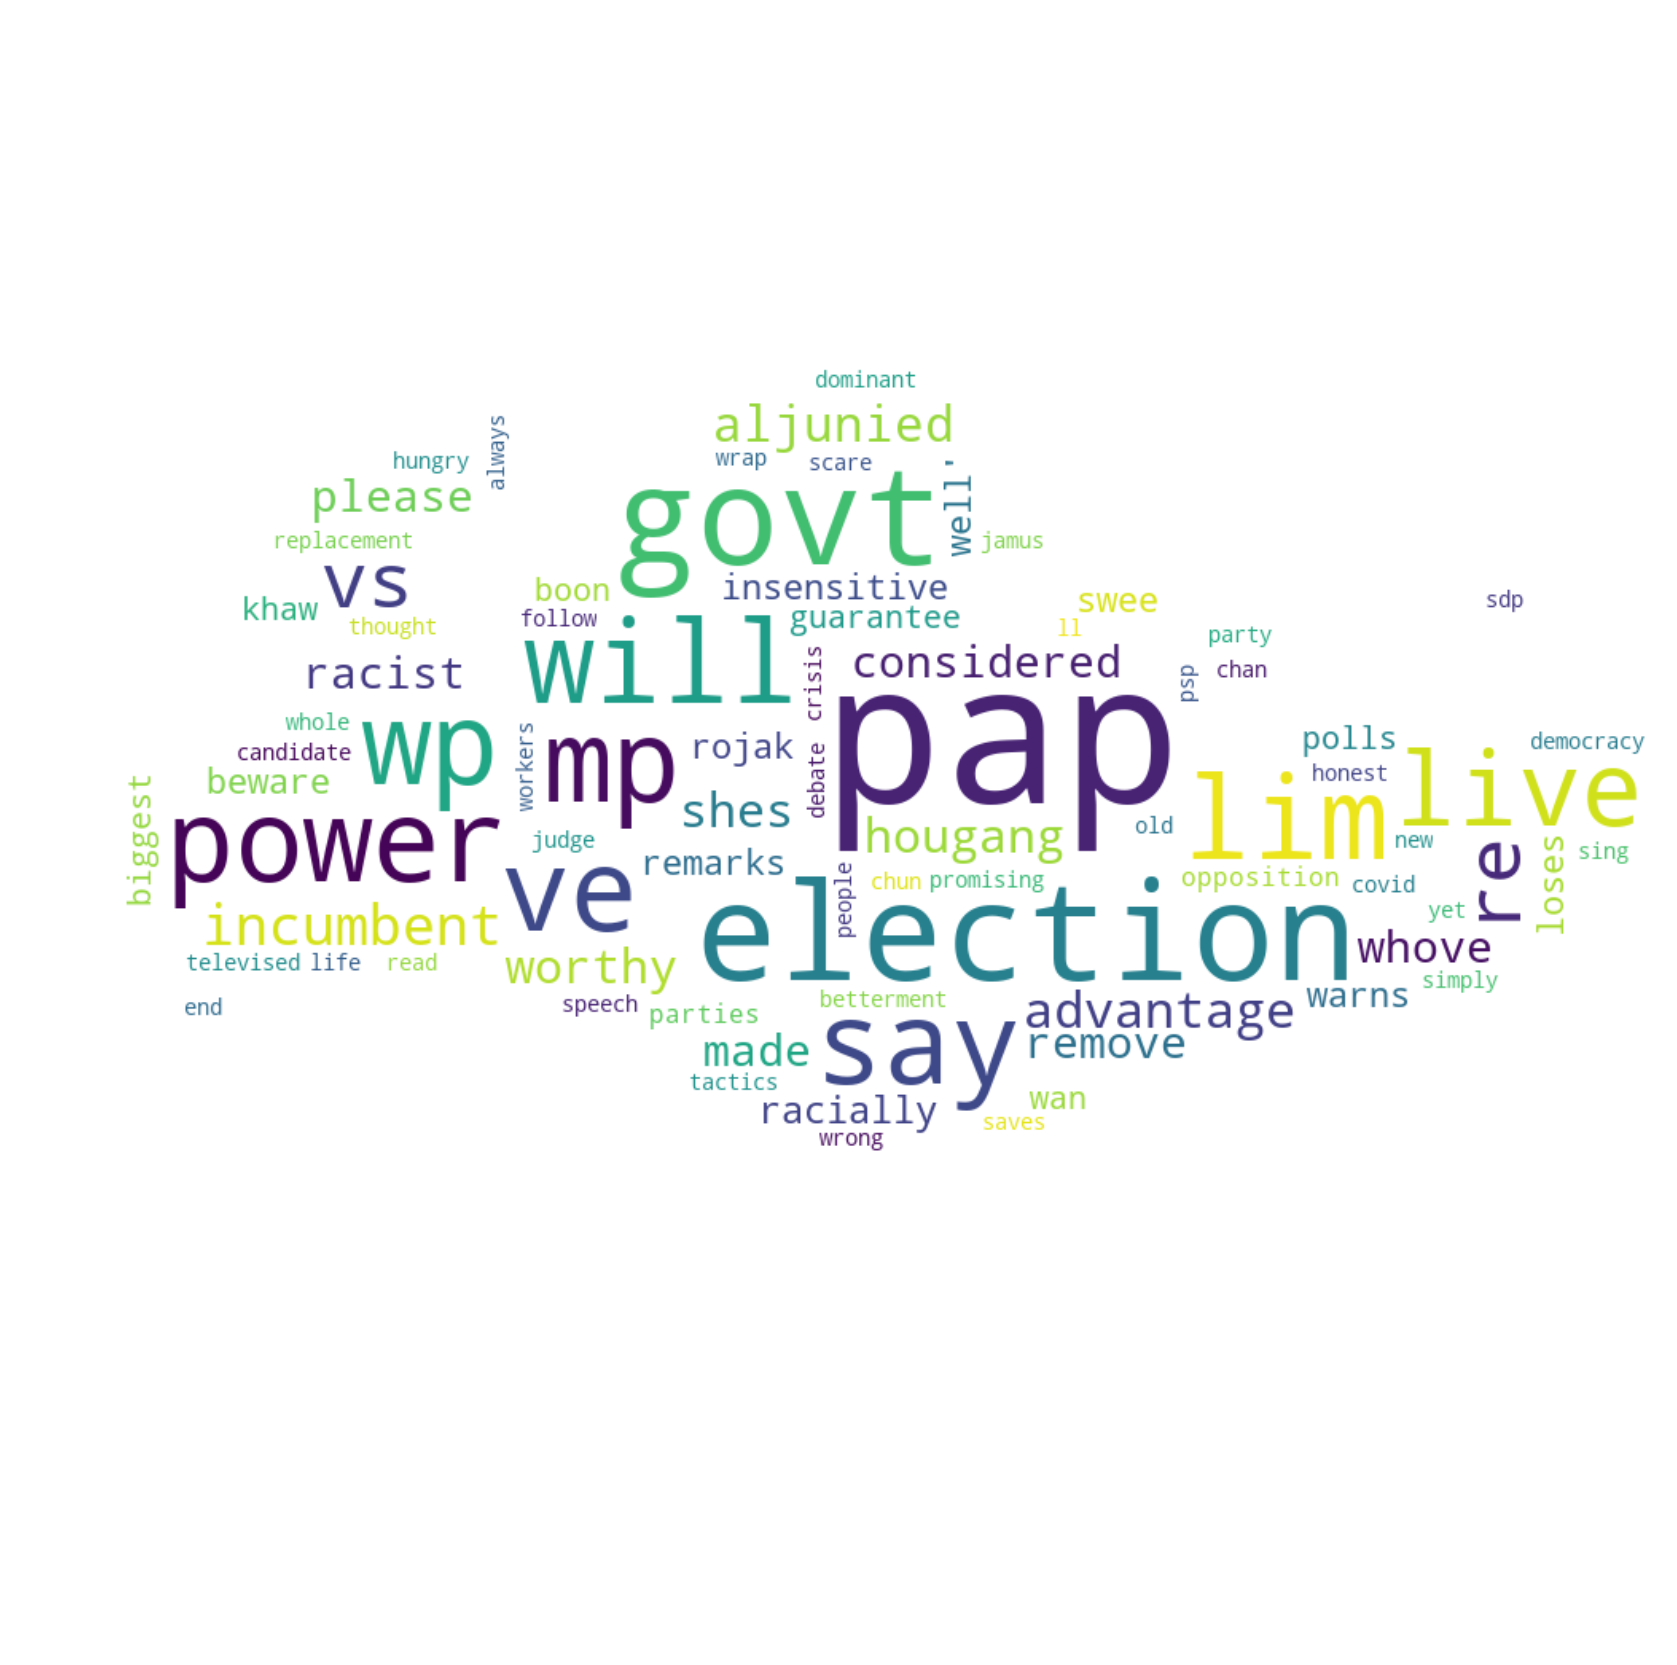

In [90]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from os import path, getcwd

d = getcwd()

text = df2.text.values

# image from https://www.pngwing.com/en/free-png-nyuuj
# default colour of image background is transparent, need to change to white
mask = np.array(Image.open(path.join(d, "singapore_map.png")))
wc = WordCloud(
    background_color = 'white',
    mask=mask,
    stopwords = STOPWORDS,
    max_words=1000,
    margin=10,
    random_state=1).generate(str(text))

fig = plt.figure(figsize = (40, 30))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# save image
# wc.to_file('wc_include_rt.png')

In [6]:
df2.loc[df2['compound'] > 0, 'sentiments'] = "positive"
df2.loc[df2['compound'] < 0, 'sentiments'] = "negative"
df2.loc[df2['compound'] == 0, 'sentiments'] = "neutral"

In [7]:
df2.head()

username                                           acctdesc  \
0        JaneKoe                                 Mum with BIG heart   
1      aligoatie                                                NaN   
2  foolluvmaknae  Diamonds they don’t turn to dust, or fade away...   
3   pauriahcarey  Singapore-born Filipino passionate about liter...   
4     hadasaurus                        the supermarket is my haven   

     location  following  followers  totaltweets        usercreatedts  \
0         NaN        121         62        18127  2010-07-09 05:44:38   
1         NaN        137        154         8094  2016-06-25 18:06:38   
2  FacadeLand         84        118        18698  2011-02-02 09:43:34   
3   Singapore        408       1641         5530  2016-08-12 03:28:33   
4         NaN        265         66         3493  2016-07-29 02:53:47   

        tweetcreatedts  retweetcount  \
0  2020-07-08 23:58:08             4   
1  2020-07-08 23:58:05           141   
2  2020-07-08 23:38:18            94   
3  2020-07-08 23:37:30            61   
4  2020-07-08 23:32:48           320   

                                                text  \
0  election vs re - election : does wp have incum...   
1  if shes not worthy of being considered as an m...   
2  2011 : " beware of ' rojak govt ' if pap loses...   
3  it cannot be stressed enough how cliched , how...   
4  saw it pointed out on fb that an article prais...   

                                      hashtags  negative  neutral  positive  \
0  [{'text': 'GE2020', 'indices': [114, 121]}]     0.000    0.717     0.283   
1                                           []     0.150    0.697     0.153   
2                                           []     0.169    0.743     0.087   
3    [{'text': 'GE2020', 'indices': [90, 97]}]     0.186    0.763     0.052   
4                                           []     0.036    0.727     0.236   

   compound sentiments  
0    0.5766   positive  
1    0.0243   positive  
2   -0.5267   negative  
3   -0.7402   negative  
4    0.8687   positive

In [8]:
df3 = df2.groupby(['sentiments']).count()
df3 = df3.reset_index()
df3

sentiments  username  acctdesc  location  following  followers  totaltweets  \
0   negative       626       575       429        626        626          626   
1    neutral       245       225       195        245        245          245   
2   positive      1633      1477      1104       1633       1633         1633   

   usercreatedts  tweetcreatedts  retweetcount  text  hashtags  negative  \
0            626             626           626   626       626       626   
1            245             245           245   245       245       245   
2           1633            1633          1633  1633      1633      1633   

   neutral  positive  compound  
0      626       626       626  
1      245       245       245  
2     1633      1633      1633

In [9]:
# double check values and labels
df2.sentiments.value_counts()

positive    1633
negative     626
neutral      245
Name: sentiments, dtype: int64

In [10]:
# color discrete map does not work
fig = px.pie(df3, values=df3['text'], names=df3['sentiments'],
            title='Proportion of tweets with positive, neutral and negative sentiments (includes retweets)')

# corresponds to negative, neutral, positive
fig.data[0].marker.colors = ['rgb(103, 0, 31)', 'rgb(178, 24, 43)', 'rgb(214, 96, 77)']

fig.show()

In [91]:
df4 = df2.drop_duplicates(subset = ["text"])
df4 = df4.reset_index()
df4

index         username  \
0        0          JaneKoe   
1        1        aligoatie   
2        2    foolluvmaknae   
3        3     pauriahcarey   
4        4       hadasaurus   
5        5      _rawnannima   
6        6       konkirayar   
7        8          clemtan   
8       10      bubblylaily   
9       14      aIetheatang   
10      15   JoleneStewart_   
11      16      _TaniaChua_   
12      17      _lilacbutts   
13      18          ujitanx   
14      21       JoshColten   
15      25          _ctmsrh   
16      28         dioryshx   
17      34       rockinruth   
18      36  goldentrack2403   
19      38   alexwang128128   
20      42       TunFucksal   
21      47      fikriboyyXD   
22      50       DoggoMeows   
23      52         stepiong   
24      56   aloysius260500   
25      58    MARVELSTUD10S   
26      59   kevinmcspadden   
27      62  _sincerelyshine   
28      64         jpg_mode   
29      68       sgelection   
..     ...              ...   
376   2112    Lallanagraphy   
377   2142    PAPlostitsway   
378   2146      BenChiaCars   
379   2155    aloysiuslow92   
380   2158       cloudywind   
381   2178      BenChiaCars   
382   2192        kaixax555   
383   2194      taeddaenggg   
384   2196     harishpillay   
385   2198      scenerytaez   
386   2200      CarrieLiauw   
387   2204        mdzulkar9   
388   2221   sgpoliticswoke   
389   2233    andrewhahalee   
390   2234    andrewhahalee   
391   2235    andrewhahalee   
392   2247       itskiatzai   
393   2304          FSteven   
394   2308       claytapult   
395   2313      BenChiaCars   
396   2326      BenChiaCars   
397   2342   Meowlikecat963   
398   2350    FeliciaChong2   
399   2360    PAPlostitsway   
400   2370      BenChiaCars   
401   2380      BenChiaCars   
402   2395        captsingh   
403   2420      greeningtea   
404   2422    PAPlostitsway   
405   2441    FeliciaChong2   

                                              acctdesc  \
0                                   Mum with BIG heart   
1                                                  NaN   
2    Diamonds they don’t turn to dust, or fade away...   
3    Singapore-born Filipino passionate about liter...   
4                          the supermarket is my haven   
5    Until you have the courage to lose sight of th...   
6    ஜியோடெக்னிக் மற்றும் போர் பைல் ஸ்பெசலிஸ்ட் ந...   
7    ex-journalist • sg returnee • @reuters, @busin...   
8    Who says a dream must be something grand? Just...   
9                    Twice as much ain't twice as good   
10                                                duck   
11                                                 NaN   
12                     as long as the stars are above.   
13   #FELIXSUNSHINE : pay ATTENTION to the minoriti...   
14                                               Elly👽   
15   i hope you’ll find a reason to be happy today-...   
16                                       im mini ADULT   
17   miracle animal ➖ header from @SWatercolour, ic...   
18                     Marriage is not my goal my life   
19                                                 NaN   
20   Travel, Food, Geopolitics, Politics.\nPenyokon...   
21                      Socially Awkward | Clean Freak   
22                                              Meowww   
23   东南亚·亚细安研究/ลูกครึ่งไทย-ญี่ปุ่น/Pekerja di Singa...   
24                                                 NaN   
25                                                 NaN   
26   Production Editor @InkstoneNews ~ Formerly @e2...   
27   23 • i have loved the moon too fondly to be fe...   
28                                     𝒐𝒑𝒆𝒏 𝒚𝒐𝒖𝒓 𝒑𝒖𝒓𝒔𝒆   
29   Sharing news of the democratic elections in Si...   
..                                                 ...   
376  Had a bio but Lallana cryuff turned it and sho...   
377                              PAP have lost its way   
378                                         Car person   
379  Stay Home Stay Safe folks as we are all battli...

In [93]:
df4.shape

(406, 17)

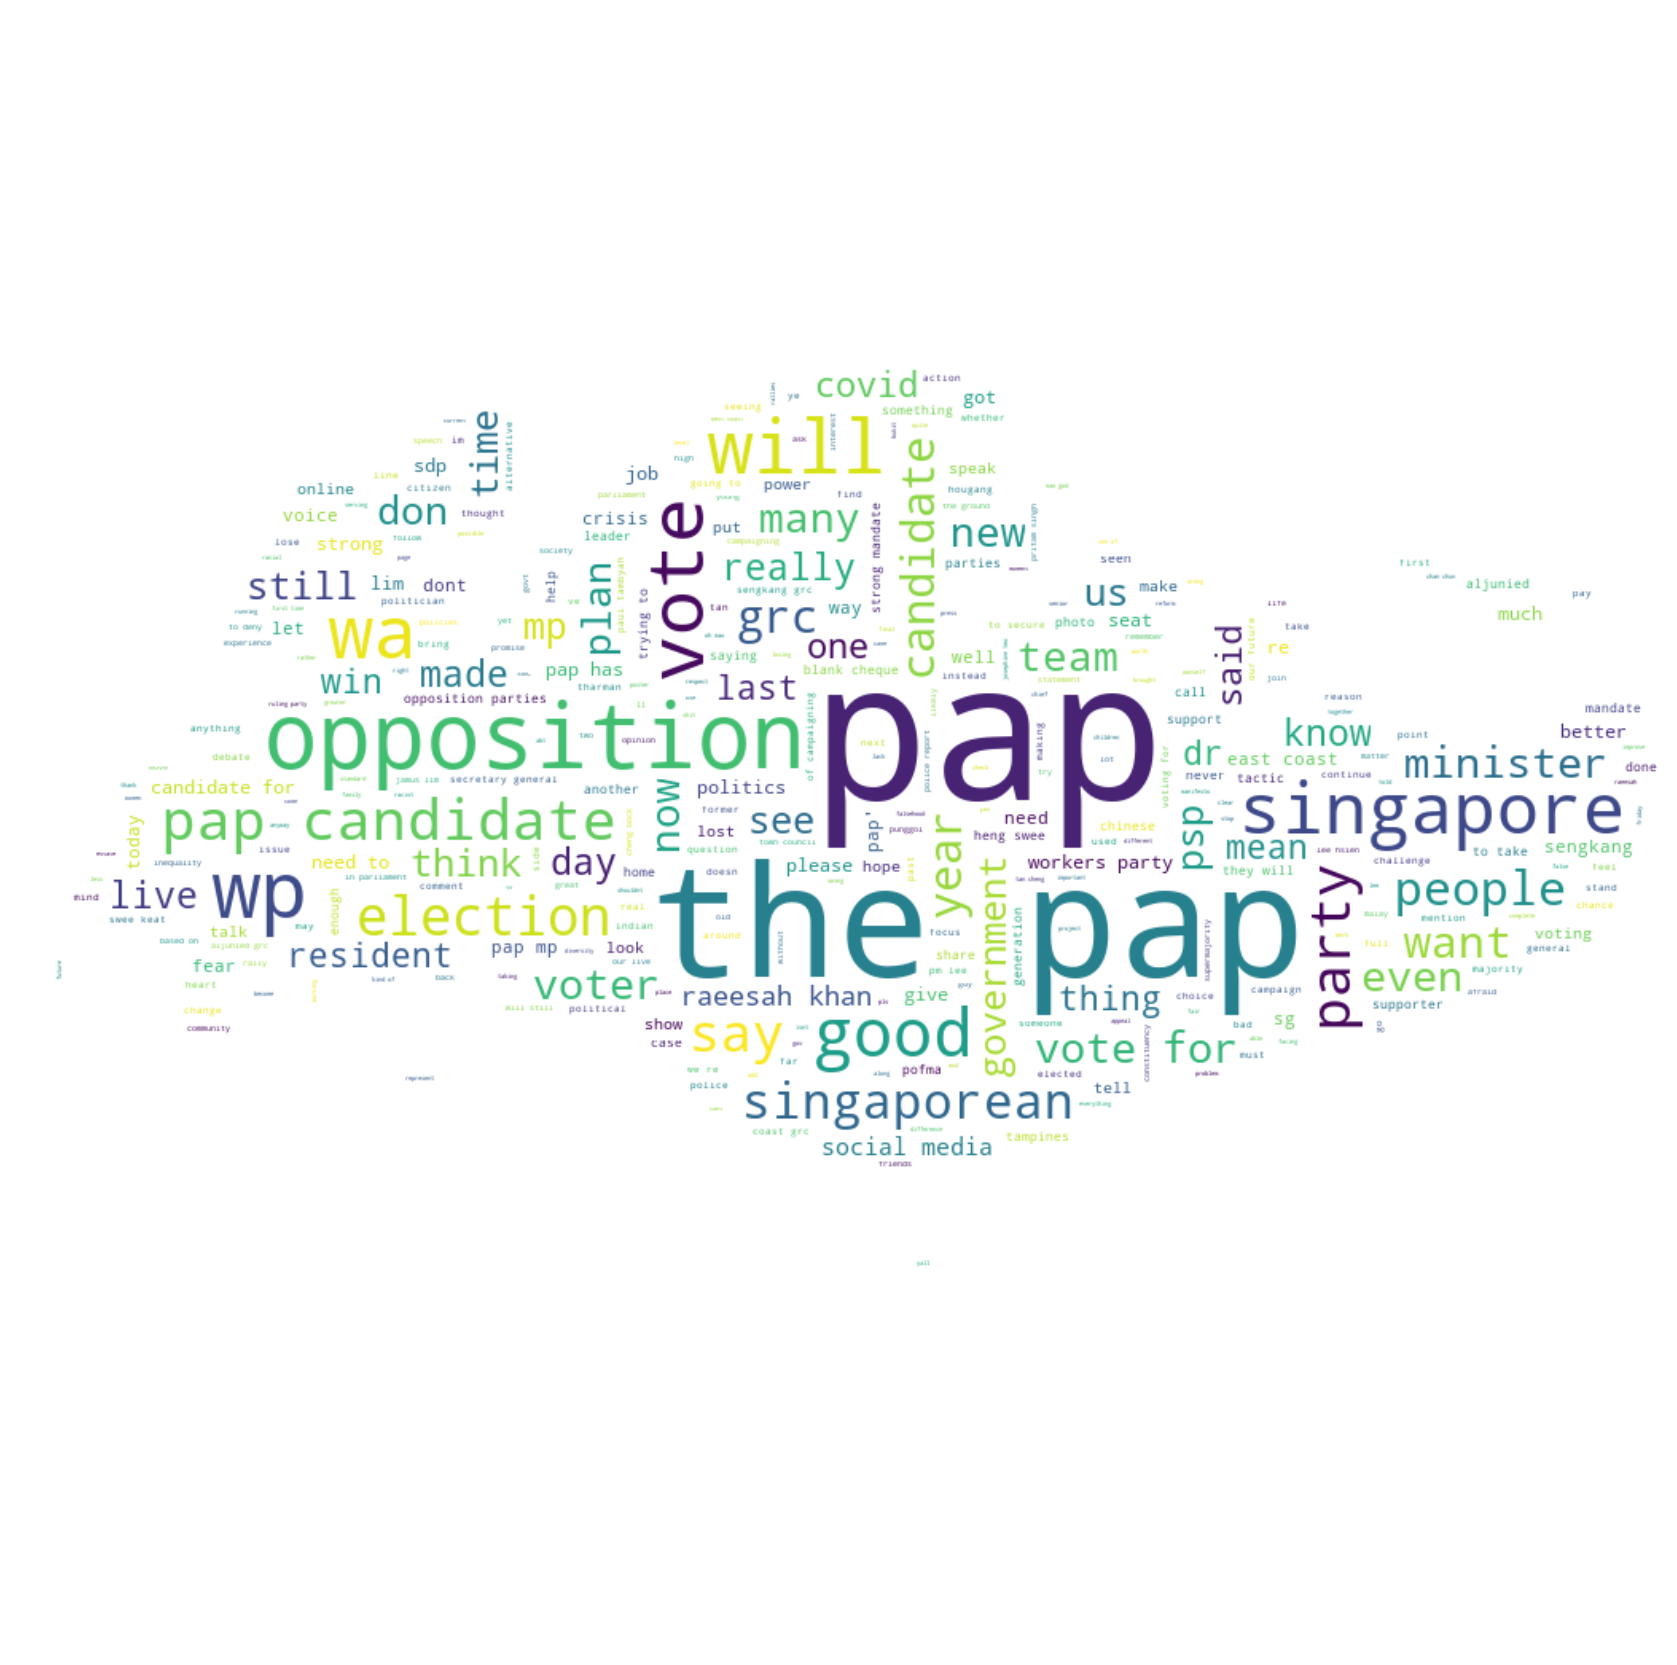

In [94]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from os import path, getcwd

d = getcwd()

text = df4.text.values

# image from https://www.pngwing.com/en/free-png-nyuuj
# default colour of image background is transparent, need to change to white
mask = np.array(Image.open(path.join(d, "singapore_map.png")))
wc = WordCloud(
    background_color = 'white',
    mask=mask,
    stopwords = STOPWORDS,
    max_words=1000,
    margin=10,
    random_state=1).generate(str(text))

fig = plt.figure(figsize = (40, 30))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# save image
# wc.to_file('wc_exclude_rt.png')

In [95]:
df5 = df4.groupby(['sentiments']).count()
df5 = df5.reset_index()
df5

sentiments  index  username  acctdesc  location  following  followers  \
0   negative     98        98        89        80         98         98   
1    neutral     83        83        77        72         83         83   
2   positive    225       225       200       162        225        225   

   totaltweets  usercreatedts  tweetcreatedts  retweetcount  text  hashtags  \
0           98             98              98            98    98        98   
1           83             83              83            83    83        83   
2          225            225             225           225   225       225   

   negative  neutral  positive  compound  
0        98       98        98        98  
1        83       83        83        83  
2       225      225       225       225

In [96]:
df4.sentiments.value_counts()

positive    225
negative     98
neutral      83
Name: sentiments, dtype: int64

In [104]:
fig = px.pie(df5, values=df5['text'], names=df5['sentiments'],
            title='Proportion of unique tweets with positive, neutral and negative sentiments')
fig.data[0].marker.colors = ['rgb(103, 0, 31)', 'rgb(178, 24, 43)', 'rgb(214, 96, 77)']
fig.show()

## Sentiment analysis with BERT
Thank you to Preston Lim for the BERT model trained using an airline Twitter dataset available on Kaggle.

Article: https://medium.com/@prestonlim/are-singaporeans-negative-nancies-a-sentiment-analysis-of-social-media-comments-using-bert-5a6e51b1c1e2

Kaggle dataset: https://www.kaggle.com/crowdflower/twitter-airline-sentiment

In [99]:
# dataset that includes retweets
df6 = pd.read_csv('bert_predicted_ge_tweets.csv', index_col=0)
df6

index         username       tweetcreatedts  \
0       235         jstinnee  2020-07-08 12:54:41   
1      1373      steelbiimu_  2020-07-07 05:53:31   
2      1392   acertainjolene  2020-07-07 05:24:40   
3      1391          bb1syri  2020-07-07 05:25:30   
4      1384      Sydelenasup  2020-07-07 05:35:20   
5       659            eisen  2020-07-08 02:53:04   
6       491     Oppsupporter  2020-07-08 06:26:22   
7       644       n_raidahmn  2020-07-08 03:11:35   
8       647   syaosakucouple  2020-07-08 03:08:30   
9       470  Distant_Witness  2020-07-08 06:59:43   
10      525           ffawaa  2020-07-08 05:36:01   
11      657           jursit  2020-07-08 02:54:22   
12      631       sgelection  2020-07-08 03:32:00   
13      651   sgpoliticswoke  2020-07-08 03:06:53   
14      501       paskeynade  2020-07-08 06:07:47   
15      388     davidareslaw  2020-07-08 08:54:20   
16      486          Ceeokok  2020-07-08 06:31:52   
17      298        Neoogan94  2020-07-08 11:16:37   
18      563            eisen  2020-07-08 04:45:29   
19       25          _ctmsrh  2020-07-08 17:40:42   
20      558           jursit  2020-07-08 04:47:40   
21      428    ItsHaiqalAfiq  2020-07-08 07:47:03   
22      539   turtleparading  2020-07-08 05:05:38   
23      454     HarryScoffin  2020-07-08 07:15:18   
24      257  youarespeedstar  2020-07-08 12:26:11   
25      543        Speicherx  2020-07-08 04:59:49   
26      417        ziqobikai  2020-07-08 07:57:14   
27      541       AudiKhalid  2020-07-08 05:03:39   
28      533  vijaykumarrrrr_  2020-07-08 05:21:42   
29      527           ffawaa  2020-07-08 05:30:57   
...     ...              ...                  ...   
2474   2142    PAPlostitsway  2020-07-06 13:01:17   
2475    445    p3pp3rmintkid  2020-07-08 07:26:12   
2476   1001        nas_craxz  2020-07-07 13:53:49   
2477   2422    PAPlostitsway  2020-07-06 11:09:44   
2478    860       HIREMAIDEA  2020-07-07 16:23:46   
2479   1974    PAPlostitsway  2020-07-06 14:11:59   
2480   1558    PAPlostitsway  2020-07-07 01:30:22   
2481    352       Blu3Gh0st_  2020-07-08 10:05:22   
2482   2001    PAPlostitsway  2020-07-06 14:00:00   
2483    485       wei_xiangg  2020-07-08 06:35:03   
2484    367    PAPlostitsway  2020-07-08 09:36:11   
2485   1018        nas_craxz  2020-07-07 13:41:28   
2486    163    PAPlostitsway  2020-07-08 14:26:10   
2487   1372    PAPlostitsway  2020-07-07 05:54:06   
2488   1563    PAPlostitsway  2020-07-07 01:16:50   
2489   1569    PAPlostitsway  2020-07-07 01:10:22   
2490    180    PAPlostitsway  2020-07-08 13:55:39   
2491   2049    PAPlostitsway  2020-07-06 13:40:31   
2492    368        rahmanehh  2020-07-08 09:34:08   
2493    351       Blu3Gh0st_  2020-07-08 10:05:32   
2494    282      BenChiaCars  2020-07-08 11:46:34   
2495   1567    PAPlostitsway  2020-07-07 01:11:46   
2496   1457     Douglas_Tham  2020-07-07 03:33:50   
2497    440        LovelyAen  2020-07-08 07:33:14   
2498    473   squishywooseok  2020-07-08 06:56:51   
2499   1555        Hzq_Szmnd  2020-07-07 01:36:19   
2500    865       HIREMAIDEA  2020-07-07 16:23:16   
2501   1762     Pengkritique  2020-07-06 16:09:15   
2502   1429     Pengkritique  2020-07-07 04:19:13   
2503   1016        nas_craxz  2020-07-07 13:43:19   

                                                   text  text_length  \
0     candidate jamus lim asked to deny the pap " a ...           70   
1     pessimist by nature . spouse and i say " reduc...           62   
2     pessimist by nature . spouse and i say " reduc...           62   
3     pessimist by nature . spouse and i say " reduc...           62   
4     pessimist by nature . spouse and i say " reduc...           62   
5     " stakes are high for ( workers ' party )... b...           66   
6     " stakes are high for ( workers ' party )... b...           66   
7     " stakes are high for ( workers ' party )... b...           66   
8     " stakes are high for ( workers ' party )... b...           66   

In [100]:
df6.shape

(2504, 8)

In [105]:
df7 = df6.groupby(['sentiments']).count()
df7 = df7.reset_index()
df7

sentiments  index  username  tweetcreatedts  text  text_length  \
0   negative   1950      1950            1950  1950         1950   
1    neutral    398       398             398   398          398   
2   positive    156       156             156   156          156   

   BERT_processed_text  BERT_processed_text_length  
0                 1950                        1950  
1                  398                         398  
2                  156                         156

In [106]:
# double check values and labels
df6.sentiments.value_counts()

negative    1950
neutral      398
positive     156
Name: sentiments, dtype: int64

In [107]:
fig = px.pie(df7, values=df7['text'], names= df7['sentiments'], 
            title='Proportion of tweets with positive, neutral and negative sentiments (includes retweets)')
fig.data[0].marker.colors = ['rgb(103, 0, 31)', 'rgb(178, 24, 43)', 'rgb(214, 96, 77)']
fig.show()

In [108]:
# dataset that excludes retweets
df8 = df6.drop_duplicates(subset=['text'])
df8

index         username       tweetcreatedts  \
0       235         jstinnee  2020-07-08 12:54:41   
1      1373      steelbiimu_  2020-07-07 05:53:31   
5       659            eisen  2020-07-08 02:53:04   
14      501       paskeynade  2020-07-08 06:07:47   
30      548        lummysean  2020-07-08 04:56:36   
94     1379        kurosbasu  2020-07-07 05:48:05   
95      419  FarezJuraimiCNA  2020-07-08 07:56:37   
97      877       sgelection  2020-07-07 16:16:17   
105     614          chinhon  2020-07-08 04:00:38   
106    2421         itsdaras  2020-07-06 11:09:59   
115     421         bikokueh  2020-07-08 07:55:10   
117     693  FarezJuraimiCNA  2020-07-08 01:43:09   
118    2115         tanhuiyi  2020-07-06 13:12:52   
119    1223         KLsurian  2020-07-07 10:07:27   
128    1953         _calpiss  2020-07-06 14:19:03   
129    2385    liberothunder  2020-07-06 11:33:10   
130    1267       itskiatzai  2020-07-07 08:38:00   
183    1102          JI22GAK  2020-07-07 12:27:17   
190     339      EricssenWen  2020-07-08 10:14:30   
214    2284        thenaoclo  2020-07-06 12:12:43   
215    1081   syaosakucouple  2020-07-07 12:45:56   
217     423      rysherreiss  2020-07-08 07:51:21   
230     589   syaosakucouple  2020-07-08 04:28:51   
335    1303          aw_3264  2020-07-07 07:53:28   
339    2133        kurosbasu  2020-07-06 13:04:24   
340    1463       sunfloffer  2020-07-07 03:27:33   
342    1398       athena2913  2020-07-07 05:16:00   
345    1992        Mason0709  2020-07-06 14:04:56   
346     361           an_ru1  2020-07-08 09:52:59   
347      59   kevinmcspadden  2020-07-08 16:05:21   
...     ...              ...                  ...   
2410    224          Aeden08  2020-07-08 13:08:22   
2411     66           OKOKJN  2020-07-08 15:54:05   
2419    459     Pengkritique  2020-07-08 07:08:32   
2425    848   sgcontractor88  2020-07-07 16:31:16   
2437   2178      BenChiaCars  2020-07-06 12:49:34   
2465    254       sumanpriya  2020-07-08 12:32:41   
2466   1451   sgpoliticswoke  2020-07-07 03:42:11   
2467   1801    PAPlostitsway  2020-07-06 15:40:09   
2469    444    p3pp3rmintkid  2020-07-08 07:26:49   
2470    116    PAPlostitsway  2020-07-08 15:00:56   
2471   1515    PAPlostitsway  2020-07-07 02:30:35   
2474   2142    PAPlostitsway  2020-07-06 13:01:17   
2475    445    p3pp3rmintkid  2020-07-08 07:26:12   
2476   1001        nas_craxz  2020-07-07 13:53:49   
2477   2422    PAPlostitsway  2020-07-06 11:09:44   
2478    860       HIREMAIDEA  2020-07-07 16:23:46   
2479   1974    PAPlostitsway  2020-07-06 14:11:59   
2480   1558    PAPlostitsway  2020-07-07 01:30:22   
2482   2001    PAPlostitsway  2020-07-06 14:00:00   
2486    163    PAPlostitsway  2020-07-08 14:26:10   
2487   1372    PAPlostitsway  2020-07-07 05:54:06   
2488   1563    PAPlostitsway  2020-07-07 01:16:50   
2490    180    PAPlostitsway  2020-07-08 13:55:39   
2491   2049    PAPlostitsway  2020-07-06 13:40:31   
2492    368        rahmanehh  2020-07-08 09:34:08   
2494    282      BenChiaCars  2020-07-08 11:46:34   
2495   1567    PAPlostitsway  2020-07-07 01:11:46   
2496   1457     Douglas_Tham  2020-07-07 03:33:50   
2501   1762     Pengkritique  2020-07-06 16:09:15   
2503   1016        nas_craxz  2020-07-07 13:43:19   

                                                   text  text_length  \
0     candidate jamus lim asked to deny the pap " a ...           70   
1     pessimist by nature . spouse and i say " reduc...           62   
5     " stakes are high for ( workers ' party )... b...           66   
14    in 2011 , then - workers ' party chief low thi...           62   
30    2011 : " beware of ' rojak govt ' if pap loses...           65   
94    if you ' re gonna vote pap because you ' re af...           68   
95    peoples voice founder lim tean told me he was ...           62   
97    inderjit singh ( ex pap mp ) is spot on : " mo...           62   
105   downward trend in social media interest for re...           62   

In [109]:
df8.shape

(406, 8)

In [110]:
df9 = df8.groupby(['sentiments']).count()
df9 = df9.reset_index()
df9

sentiments  index  username  tweetcreatedts  text  text_length  \
0   negative    247       247             247   247          247   
1    neutral    125       125             125   125          125   
2   positive     34        34              34    34           34   

   BERT_processed_text  BERT_processed_text_length  
0                  247                         247  
1                  125                         125  
2                   34                          34

In [111]:
# double check values and labels
df8.sentiments.value_counts()

negative    247
neutral     125
positive     34
Name: sentiments, dtype: int64

In [112]:
fig = px.pie(df9, values=df9['text'], names= df9['sentiments'], 
            title='Proportion of unique tweets with positive, neutral and negative sentiments')
fig.data[0].marker.colors = ['rgb(103, 0, 31)', 'rgb(178, 24, 43)', 'rgb(214, 96, 77)']
fig.show()